In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
def load_dataset(dataset):
    if dataset == 'ixi':
        ixi_train = pd.read_csv('./dataset/ixi_train.csv', index_col = 0)
        ixi_test = pd.read_csv('./dataset/ixi_test.csv', index_col = 0)

        # AGE에서 소수점 아래를 버림 -> for stratified k fold
        ixi_train['age'] = ixi_train['age'].astype('int64')
        ixi_test['age'] = ixi_test['age'].astype('int64')

        # 모든 feature의 dtype : float64
        ixi_train = ixi_train.astype('float64')
        ixi_test = ixi_test.astype('float64')
        return ixi_train, ixi_test
    
    elif dataset == 'hcp':
        hcp_train = pd.read_csv('./dataset/hcp_train.csv', index_col=0)
        hcp_test = pd.read_csv('./dataset/hcp_test.csv', index_col=0)

        hcp_train = hcp_train.astype('float64')
        hcp_test = hcp_test.astype('float64')
        return hcp_train, hcp_test
    
    elif dataset =='cc':
        cc_train = pd.read_csv('./dataset/cc_train.csv', index_col = 0)
        cc_test = pd.read_csv('./dataset/cc_test.csv', index_col = 0)

        cc_train = cc_train.astype('float64')
        cc_test = cc_test.astype('float64')
        return cc_train, cc_test

In [7]:
ixi_train, ixi_test = load_dataset('ixi')
hcp_train, hcp_test = load_dataset('hcp')
cc_train, cc_test = load_dataset('cc')

In [8]:
ixi_test = ixi_test.reset_index(drop=True)
hcp_test = hcp_test.reset_index(drop=True)
cc_test = cc_test.reset_index(drop=True)

## Predicted Age 

**Mind the gap: Performance metric evaluation in brain-age prediction**

In [2]:
ixi_pred_age = pd.read_csv('./dataframe/0804/ixi/ixi_predicted_age.csv', index_col=0)
hcp_pred_age = pd.read_csv('./dataframe/0804/hcp/hcp_predicted_age.csv', index_col=0)
cc_pred_age = pd.read_csv('./dataframe/0804/cc/cc_predicted_age.csv', index_col=0)

In [3]:
ixi_corr_pred_age = pd.read_csv('./dataframe/0804/ixi/ixi_corr_pred_age.csv', index_col=0)
hcp_corr_pred_age = pd.read_csv('./dataframe/0804/hcp/hcp_corr_pred_age.csv', index_col=0)
cc_corr_pred_age = pd.read_csv('./dataframe/0804/cc/cc_corr_pred_age.csv', index_col=0)

In [4]:
ixi_corr_delta = pd.read_csv('./dataframe/0804/ixi/ixi_corr_delta.csv', index_col=0)
hcp_corr_delta = pd.read_csv('./dataframe/0804/hcp/hcp_corr_delta.csv', index_col=0)
cc_corr_delta = pd.read_csv('./dataframe/0804/cc/cc_corr_delta.csv',index_col=0)

In [5]:
ixi_pred_age.head()

LinearRegression      Lasso      Ridge  ElasticNet       Lars  LassoLars  \
0         47.539154  42.244606  42.274920   41.537178  41.207914  42.238777   
1         33.091843  41.389786  40.299503   41.435474  42.224648  41.387822   
2         57.961174  56.121204  53.772460   53.702400  54.784332  56.127259   
3         38.447903  51.203930  48.736164   49.626286  49.246464  51.202122   
4         32.979576  36.376255  39.230960   37.882122  37.357715  36.371789   

   OrthogonalMatchingPursuit  Bayesian Ridge        ARD  \
0                  42.564801       43.083252  43.793240   
1                  40.447992       39.811807  38.578576   
2                  56.791274       54.616261  56.802715   
3                  46.812716       47.401713  47.349757   
4                  34.781082       38.442167  36.428093   

   PassiveAggressiveRegressor  ...  RandomForestRegressor  \
0                   44.895916  ...                  38.39   
1                   39.330629  ...                  48.42   
2                   56.169798  ...                  59.92   
3                   44.328760  ...                  45.43   
4                   36.624235  ...                  40.64   

   ExtraTreesRegressor   Adaboost  GradientBoostingRegressor  XGBRegressor  \
0            40.096411  34.361809                  36.595948     38.117880   
1            47.621005  51.862069                  52.136205     43.500774   
2            58.625064  58.579618                  59.954942     59.400234   
3            48.455711  49.224359                  50.101215     52.547430   
4            42.167328  43.222222                  43.132238     36.430206   

   LGBMRegressor   Catboost  GaussianProcess  KNeighborRegressor  MLPRegressor  
0      38.781915  35.892720        47.163086           34.895956     38.560116  
1      55.729359  51.250888        33.374023           41.851828     39.147723  
2      61.471496  58.641363        57.843628           53.699458     63.731622  
3      49.770561  46.468655        38.876953           43.916504     41.586306  
4      44.950596  45.976162        33.101562           42.258389     45.137840  

[5 rows x 27 columns]

In [9]:
ixi_chro_age = ixi_test['age']
hcp_chro_age = hcp_test['age']
cc_chro_age = cc_test['age']

In [83]:
ixi_chro_age

0      36.0
1      35.0
2      63.0
3      58.0
4      34.0
       ... 
109    63.0
110    33.0
111    33.0
112    64.0
113    53.0
Name: age, Length: 114, dtype: float64

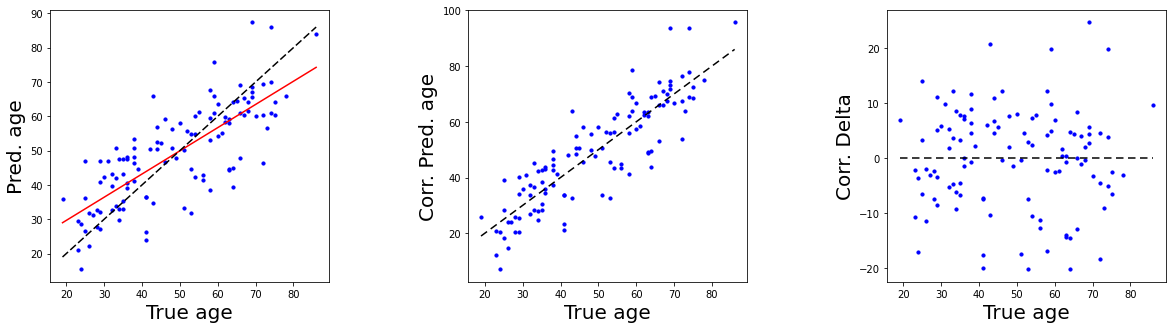

In [90]:
plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.5)


plt.subplot(1, 3, 1)
a, b = np.polyfit(ixi_chro_age, ixi_pred_age.iloc[:, 0], 1)
plt.plot([ixi_chro_age.min(), ixi_chro_age.max()], [a*ixi_chro_age.min() + b, a*ixi_chro_age.max()+b], color='red', )
plt.scatter(ixi_chro_age, ixi_pred_age.iloc[:, 0], c ="blue", s=10)
plt.plot([ixi_chro_age.min(), ixi_chro_age.max()], [ixi_chro_age.min(), ixi_chro_age.max()], color='k', linestyle='--', dashes=(5, 2))
plt.xlabel('True age', fontsize=20)
plt.ylabel('Pred. age', fontsize=20)

plt.subplot(1, 3, 2)
plt.scatter(ixi_chro_age, ixi_corr_pred_age.iloc[:, 0], c ="blue", s=10)
plt.plot([ixi_chro_age.min(), ixi_chro_age.max()], [ixi_chro_age.min(), ixi_chro_age.max()], color = 'k', linestyle='--', dashes=(5, 3))
plt.xlabel('True age', fontsize=20)
plt.ylabel('Corr. Pred. age', fontsize=20)

plt.subplot(1, 3, 3)
plt.scatter(ixi_chro_age, ixi_corr_delta.iloc[:, 0], c ="blue", s=10)
plt.plot([ixi_chro_age.min(), ixi_chro_age.max()], [0,0], color = 'k',  linestyle='--', dashes=(5, 3))
plt.xlabel('True age', fontsize=20)
plt.ylabel('Corr. Delta', fontsize=20)

 
# To show the plot

plt.show()

In [102]:
ixi_delta = ixi_pred_age.copy()
for i in range(ixi_delta.shape[1]):
    ixi_delta.iloc[:, i] = ixi_delta.iloc[:, i] - ixi_chro_age
    
hcp_delta = hcp_pred_age.copy()
for i in range(hcp_delta.shape[1]):
    hcp_delta.iloc[:, i] = hcp_delta.iloc[:, i] - hcp_chro_age
    
cc_delta = cc_pred_age.copy()
for i in range(cc_delta.shape[1]):
    cc_delta.iloc[:, i] = cc_delta.iloc[:,i] - cc_chro_age

In [137]:
def ixi_pred_age_plot(ixi_test, ixi_pred_age, ixi_corr_pred_age, ixi_corr_delta,ixi_delta, model_idx, save=False, file_name=''):
    ixi_test = ixi_test.reset_index(drop=True)
    ixi_chro_age = ixi_test['age']
    
    
    plt.figure(figsize=(20,12))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    
    # True Age / Pred. Age
    plt.subplot(2,3,1)
    a, b = np.polyfit(ixi_chro_age, ixi_pred_age.iloc[:, model_idx], 1)
    plt.plot([ixi_chro_age.min(), ixi_chro_age.max()], [a*ixi_chro_age.min() + b, a*ixi_chro_age.max()+b], color='red')
    plt.scatter(ixi_chro_age, ixi_pred_age.iloc[:, model_idx], c ="blue", s=10)
    plt.plot([ixi_chro_age.min(), ixi_chro_age.max()], [ixi_chro_age.min(), ixi_chro_age.max()], color='k', linestyle='--', dashes=(5, 2))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('True age', fontsize=20)
    plt.ylabel('Pred. age', fontsize=20)
    
    # True Age / Corrected Pred. Age
    plt.subplot(2, 3, 2)
    plt.scatter(ixi_chro_age, ixi_corr_pred_age.iloc[:, model_idx], c ="blue", s=10)
    plt.plot([ixi_chro_age.min(), ixi_chro_age.max()], [ixi_chro_age.min(), ixi_chro_age.max()], color = 'k', linestyle='--', dashes=(5, 3))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('True age', fontsize=20)
    plt.ylabel('Corr. Pred. age', fontsize=20)
    
    # True Age / Corrected Delta
    plt.subplot(2, 3, 3)
    plt.scatter(ixi_chro_age, ixi_corr_delta.iloc[:, model_idx], c ="blue", s=10)
    plt.plot([ixi_chro_age.min(), ixi_chro_age.max()], [0,0], color = 'k',  linestyle='--', dashes=(5, 3))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('True age', fontsize=20)
    plt.ylabel('Corr. Delta', fontsize=20)
    
    
    plt.subplot(2,3,4)
    plt.scatter(ixi_chro_age, ixi_delta.iloc[:, model_idx], c='blue', s=10)
    a, b = np.polyfit(ixi_chro_age, ixi_delta.iloc[:, model_idx], 1)
    plt.plot([ixi_chro_age.min(), ixi_chro_age.max()], [a*ixi_chro_age.min() + b, a*ixi_chro_age.max()+b], color='red')
    plt.plot([ixi_chro_age.min(), ixi_chro_age.max()], [0,0], color = 'k',  linestyle='--', dashes=(5, 3))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('True age', fontsize=20)
    plt.ylabel('Delta', fontsize=20)
    
    
    corr_delta = ixi_delta.iloc[:, model_idx] - (a*ixi_chro_age + b)
    plt.subplot(2,3,5)
    plt.scatter(ixi_chro_age, corr_delta, c = 'blue', s=10)
    plt.plot([ixi_chro_age.min(), ixi_chro_age.max()], [0,0], color='k', linestyle='--', dashes=(5,3))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('True age', fontsize=20)
    plt.ylabel('Corr. Delta', fontsize=20)
    
    
    plt.subplot(2,3,6)
    plt.scatter(ixi_chro_age, corr_delta + ixi_chro_age, c = 'blue', s=10)
    plt.plot([ixi_chro_age.min(), ixi_chro_age.max()],[ixi_chro_age.min(), ixi_chro_age.max()],color='k', linestyle='--', dashes=(5,3))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('True age', fontsize=20)
    plt.ylabel('Corr. Delta', fontsize=20)

    # Save file 
    if save :
        plt.savefig(f'./visualization/{file_name}.png', dpi=500)
    # To show the plot

    plt.show()

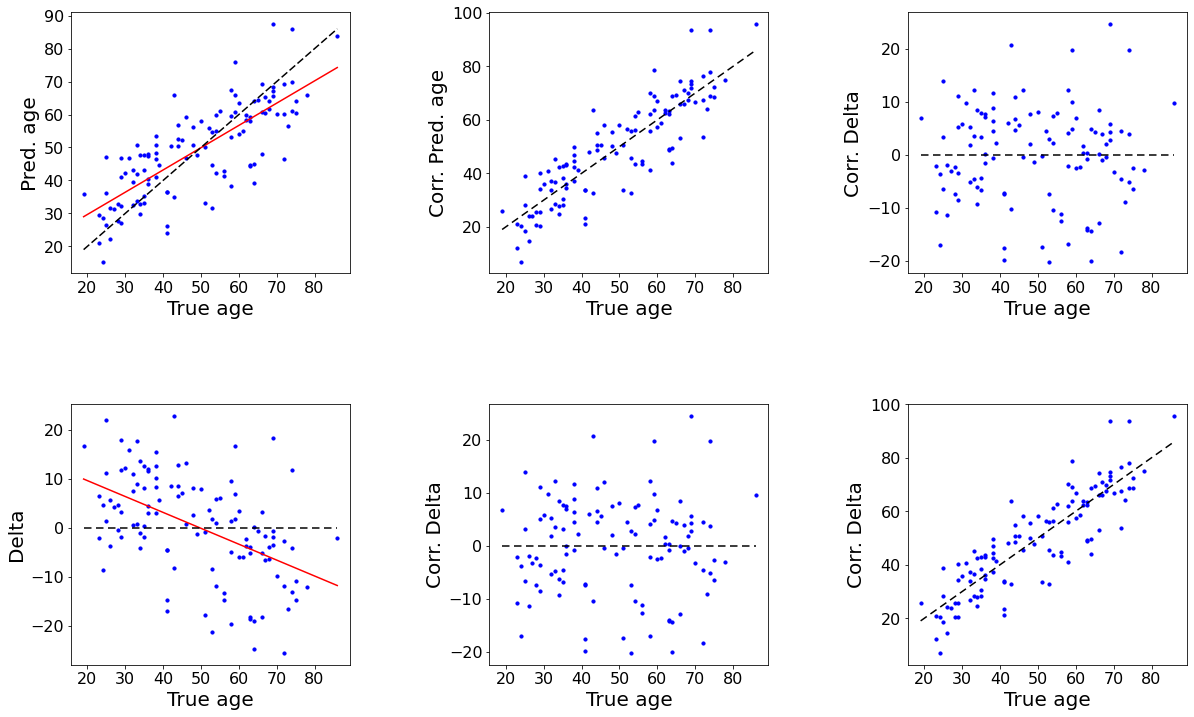

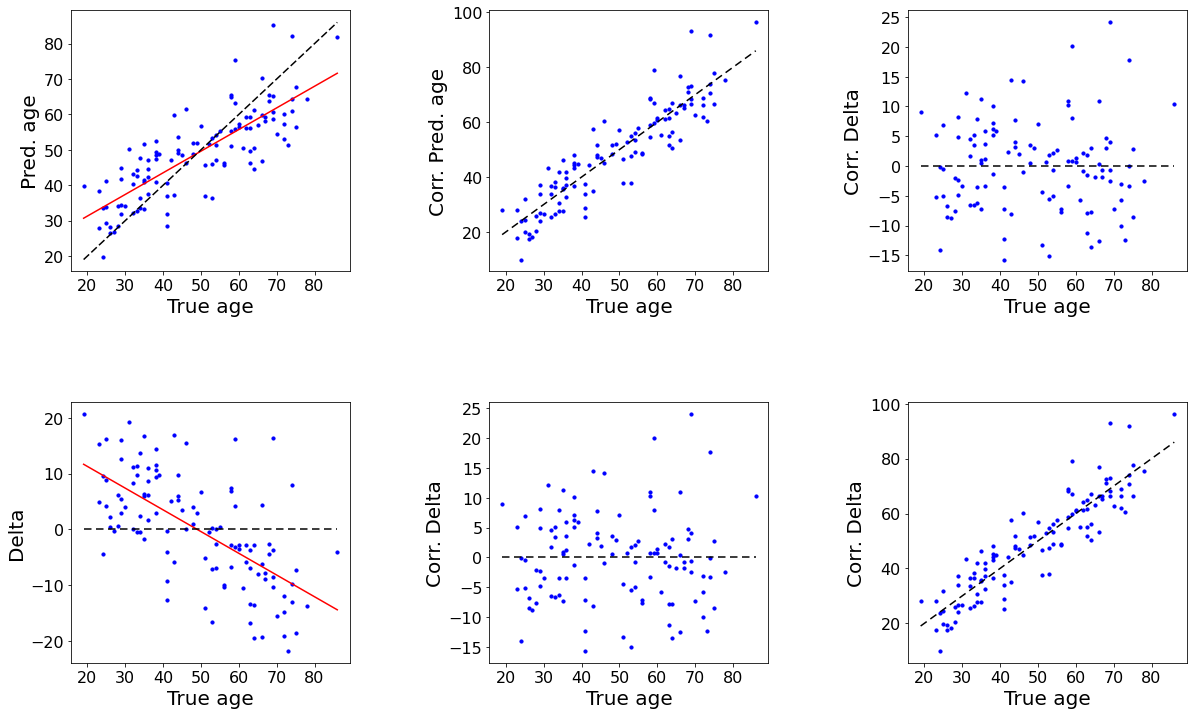

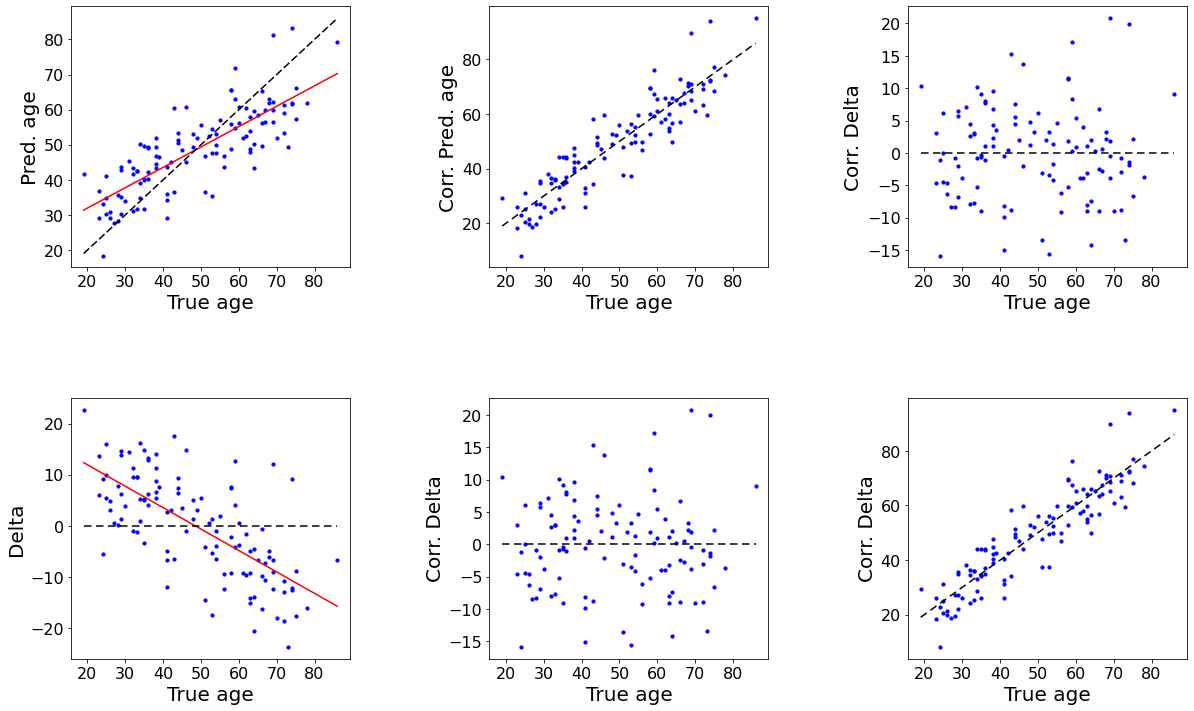

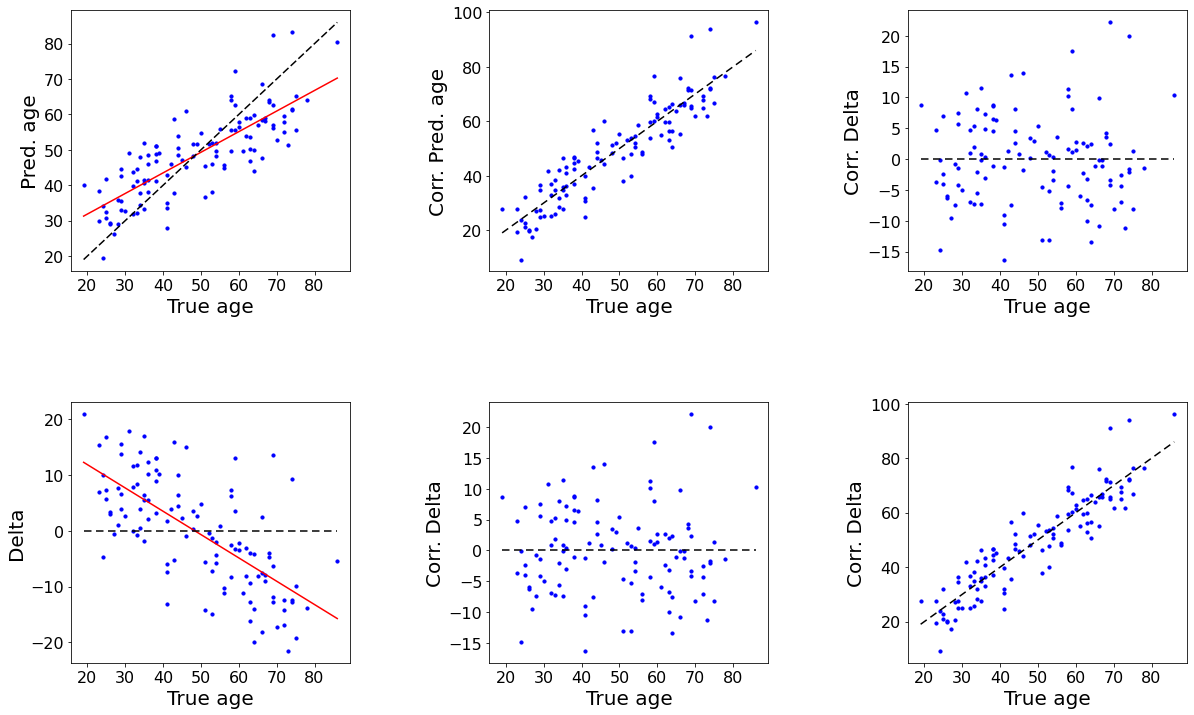

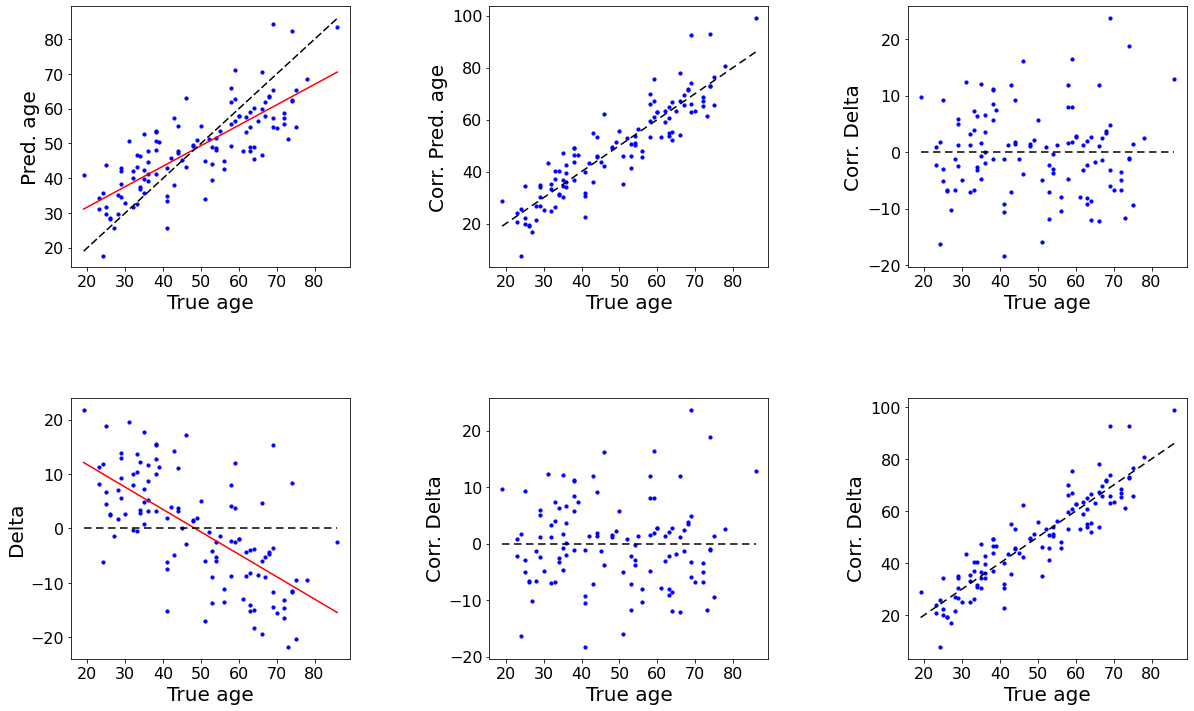

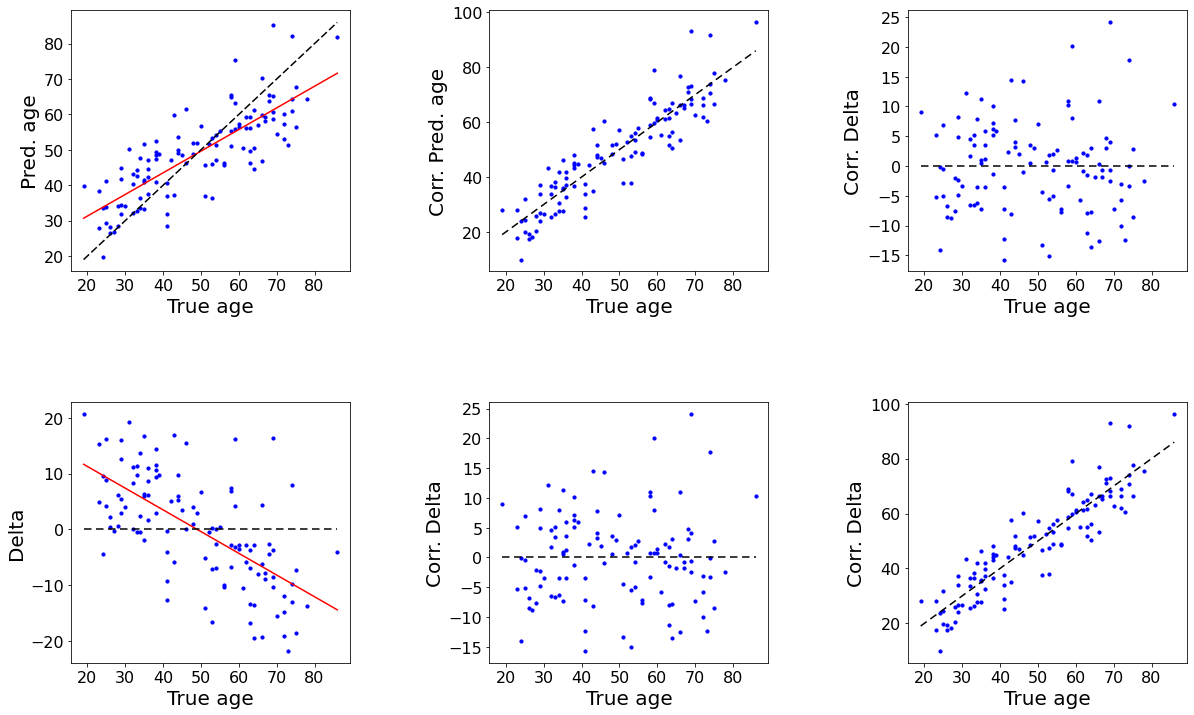

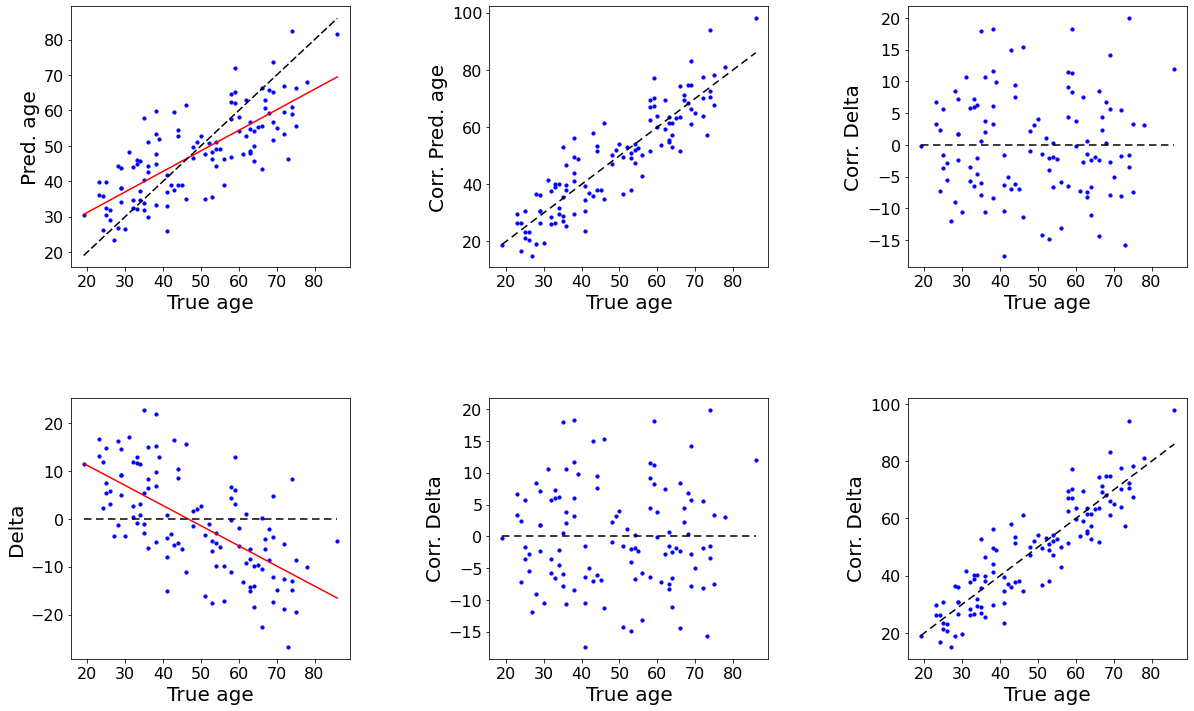

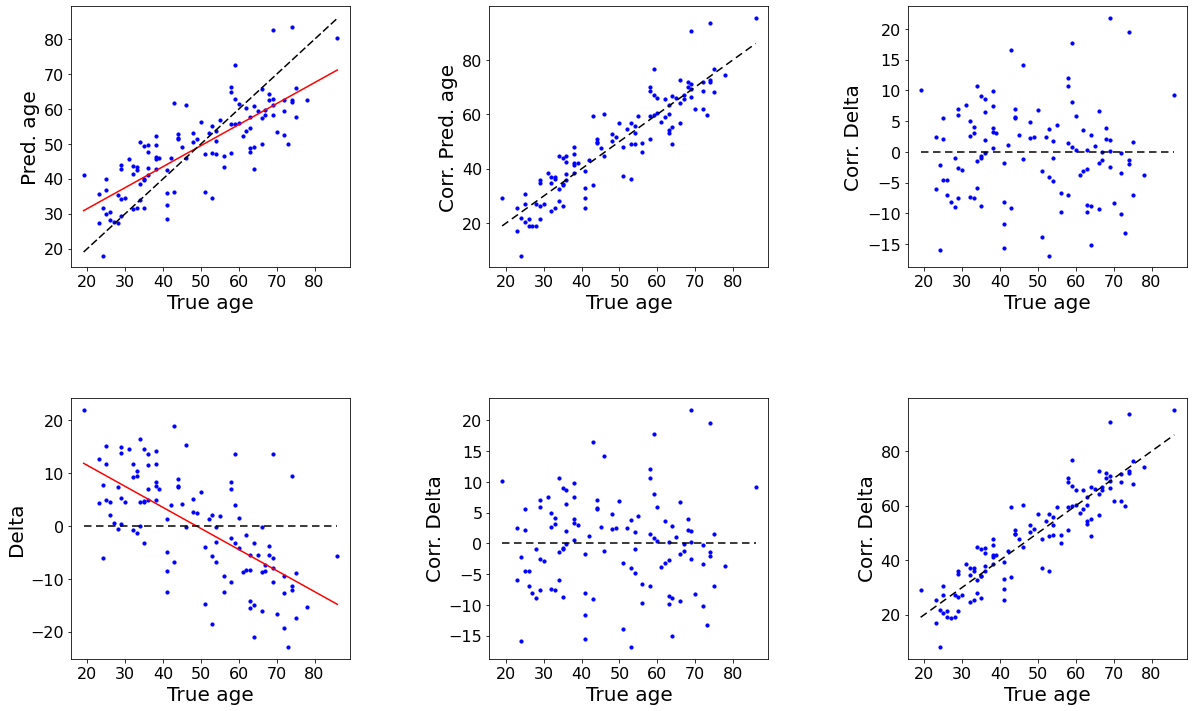

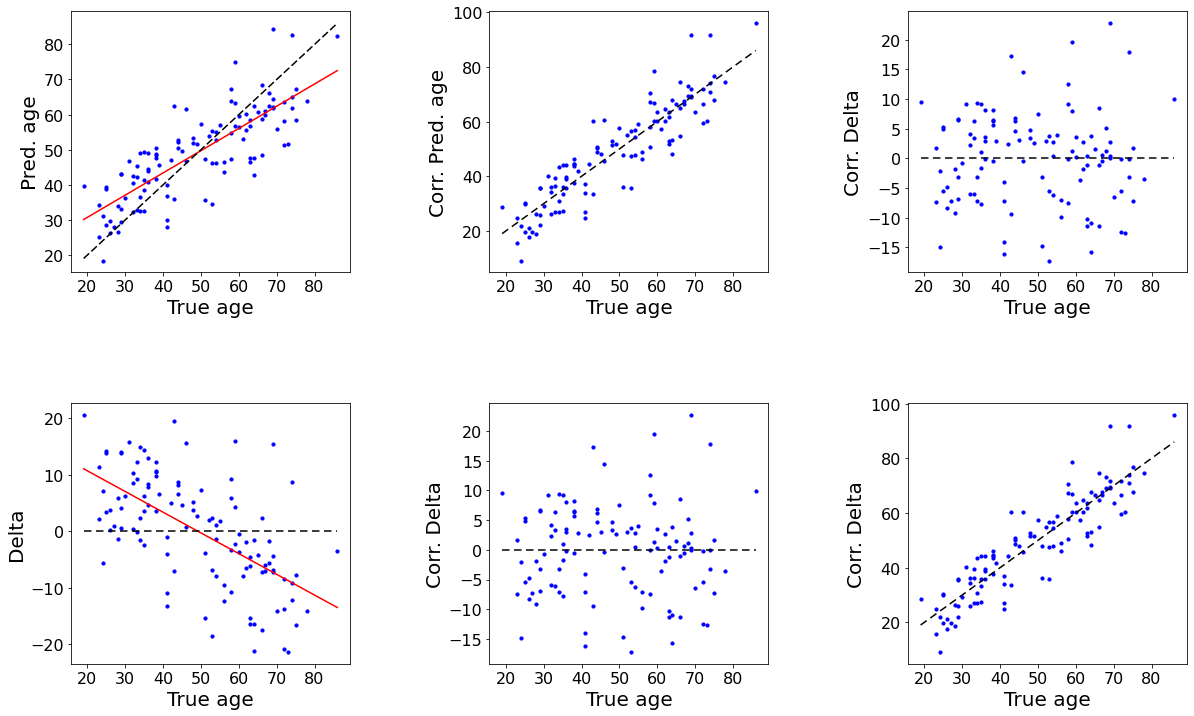

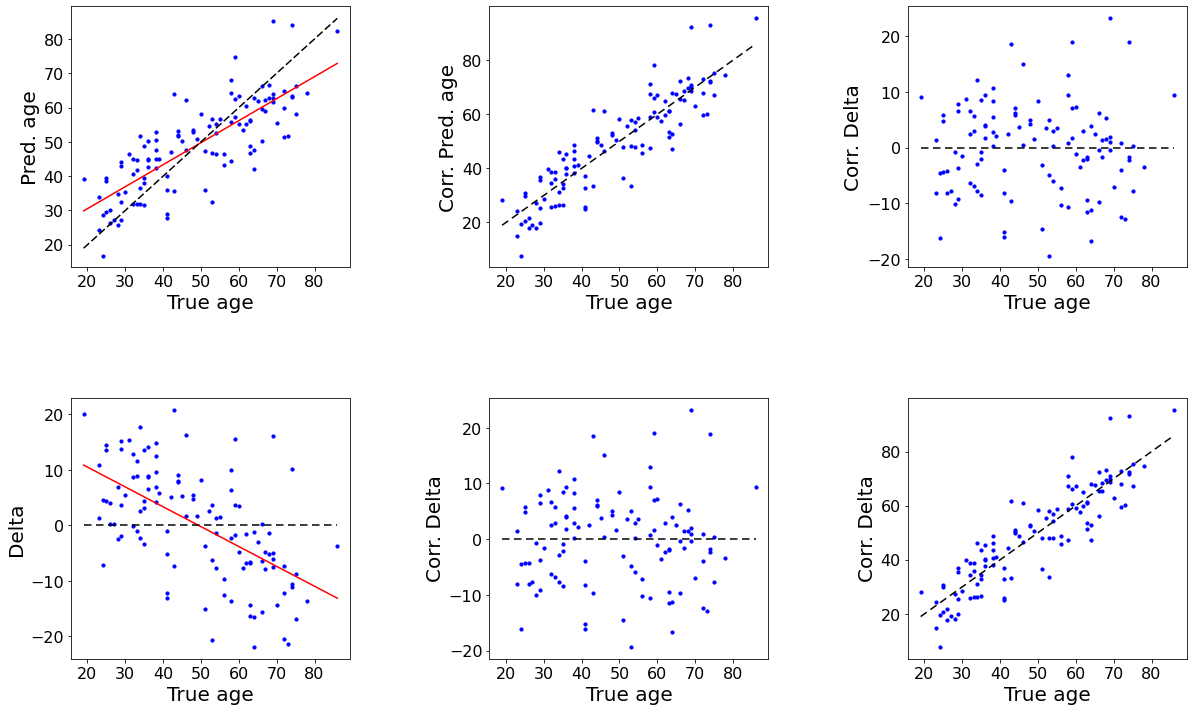

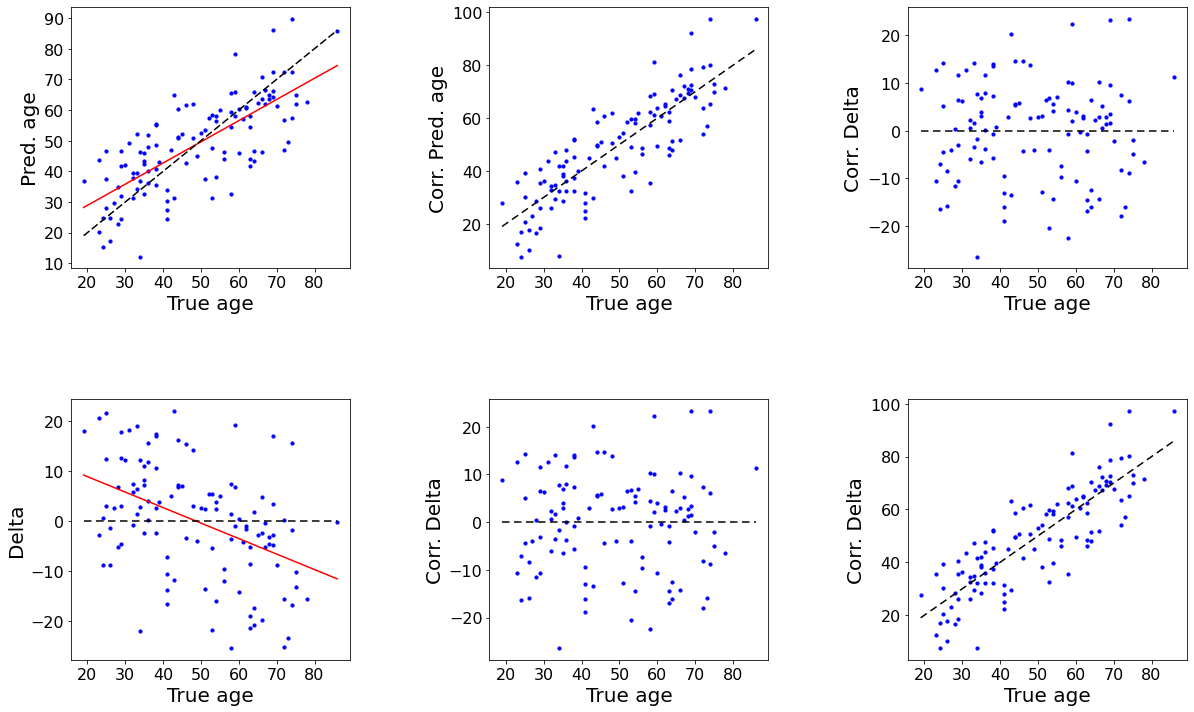

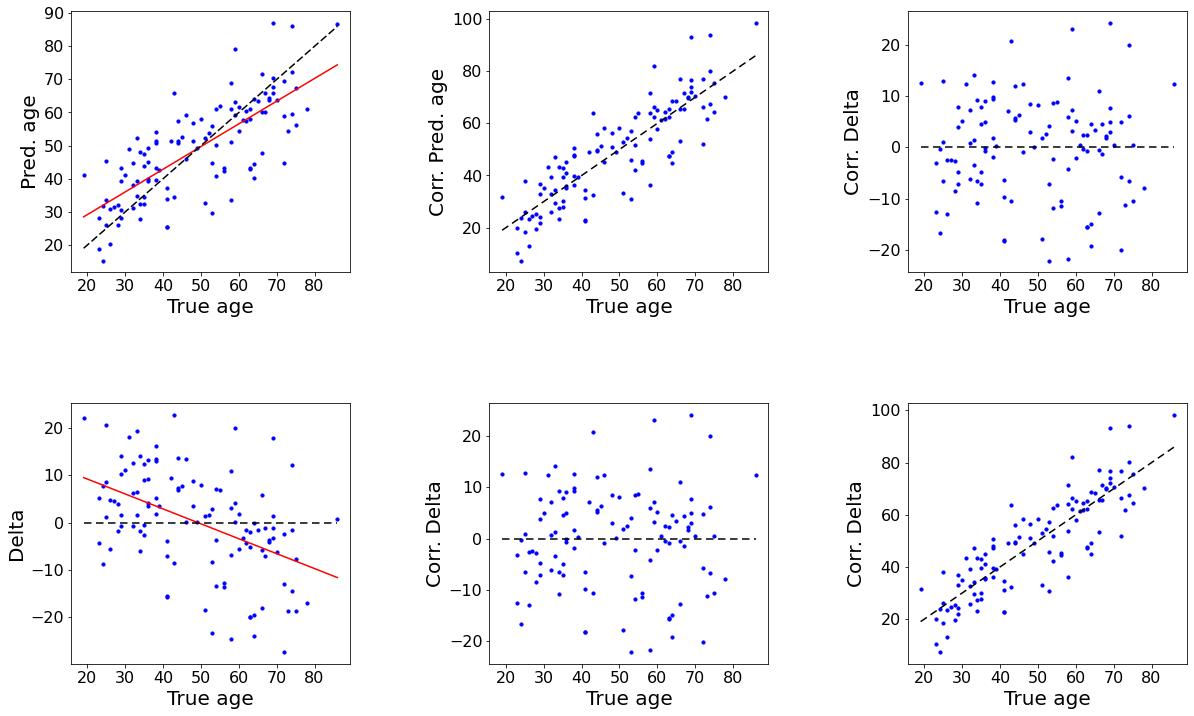

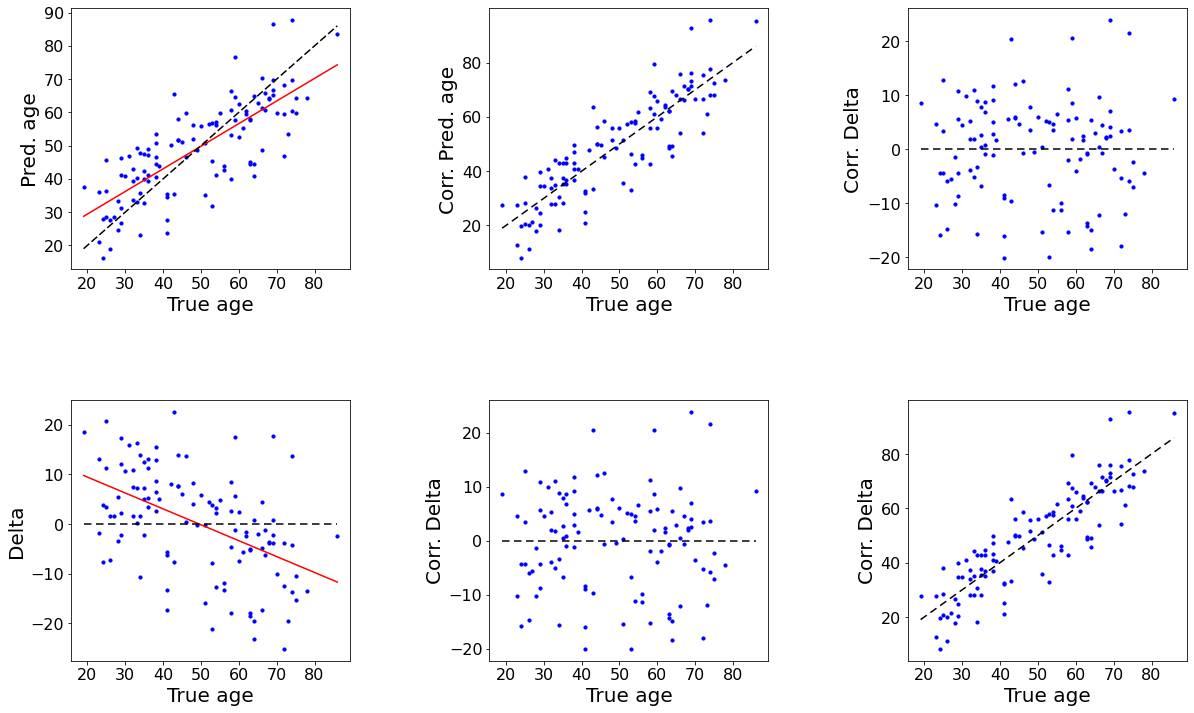

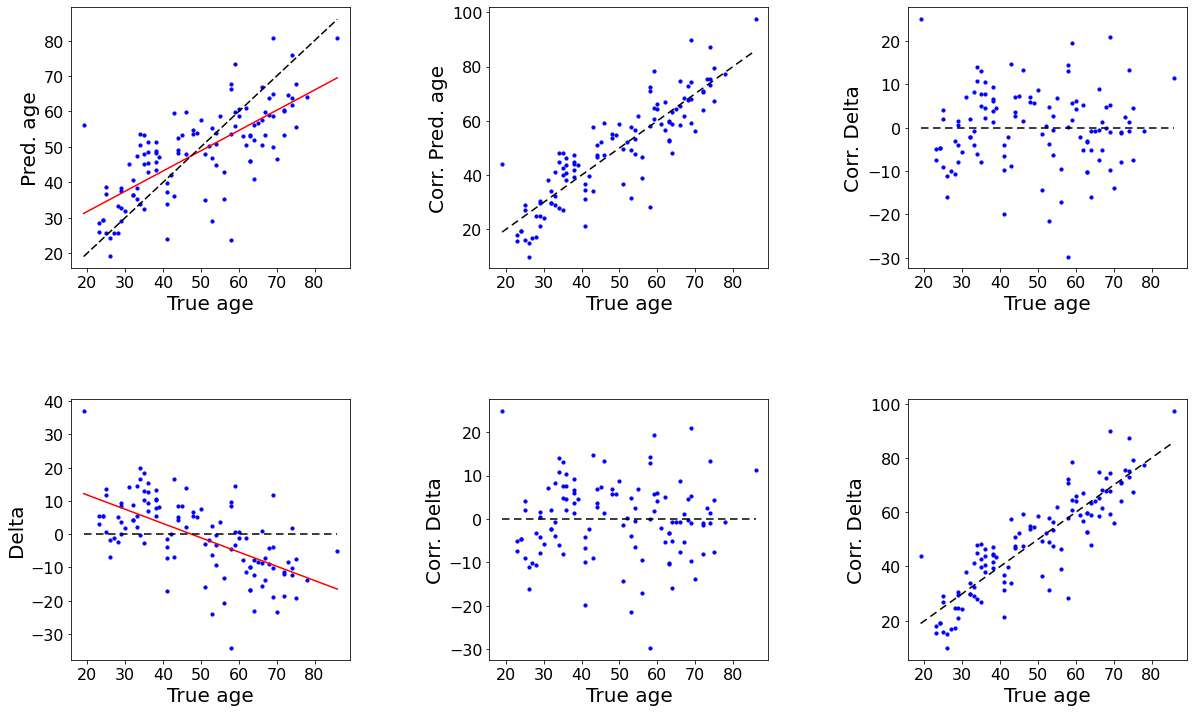

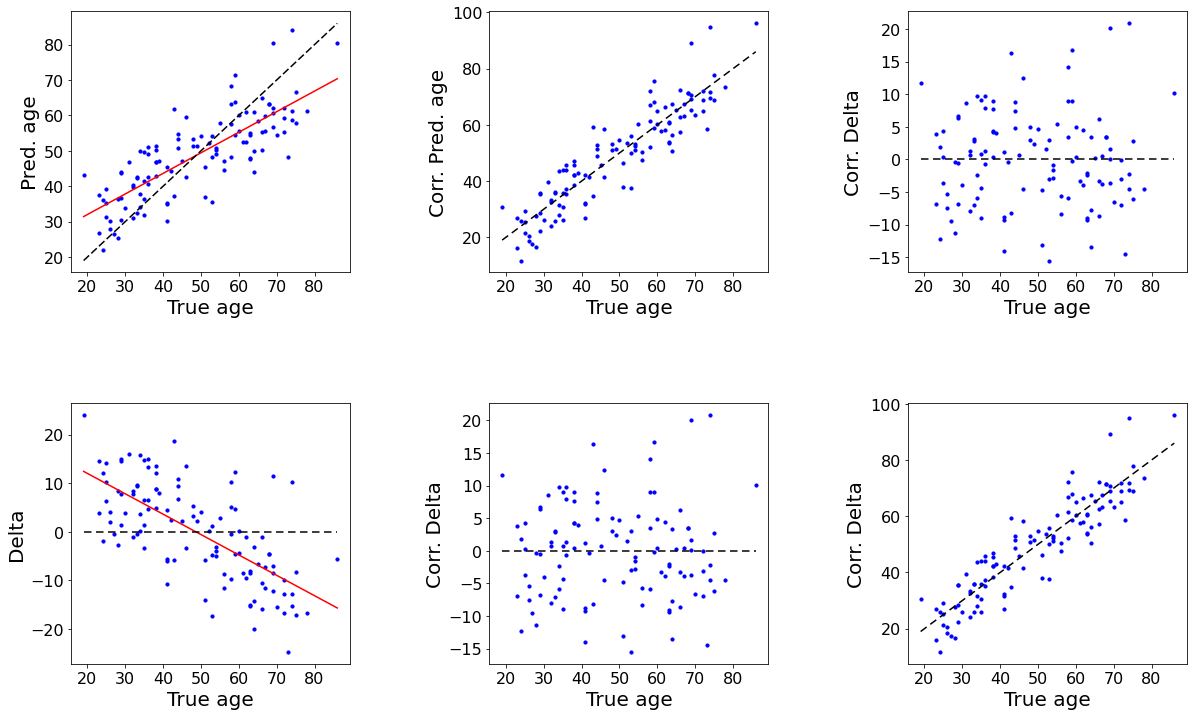

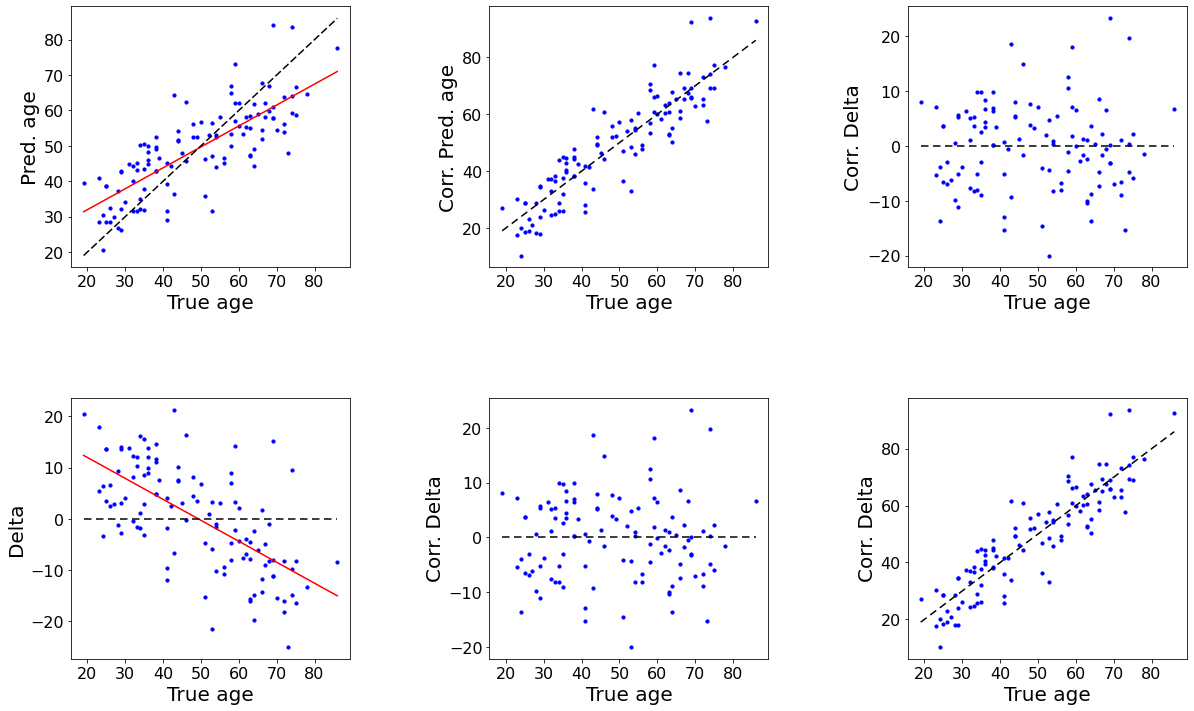

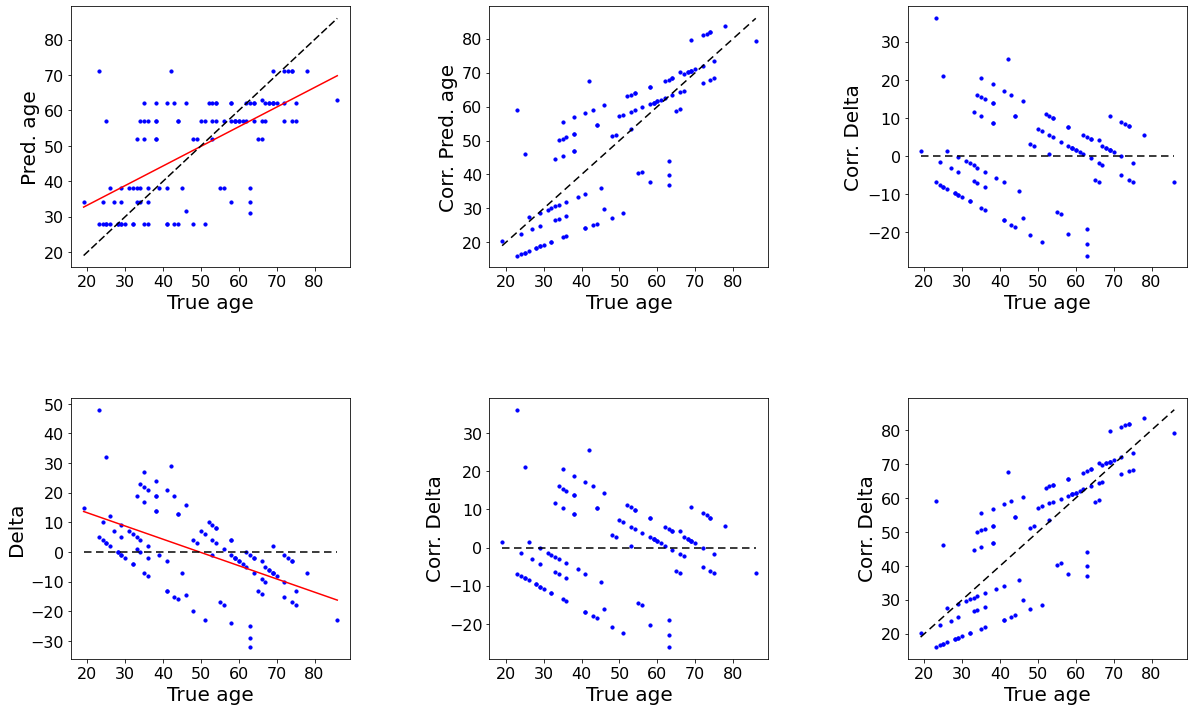

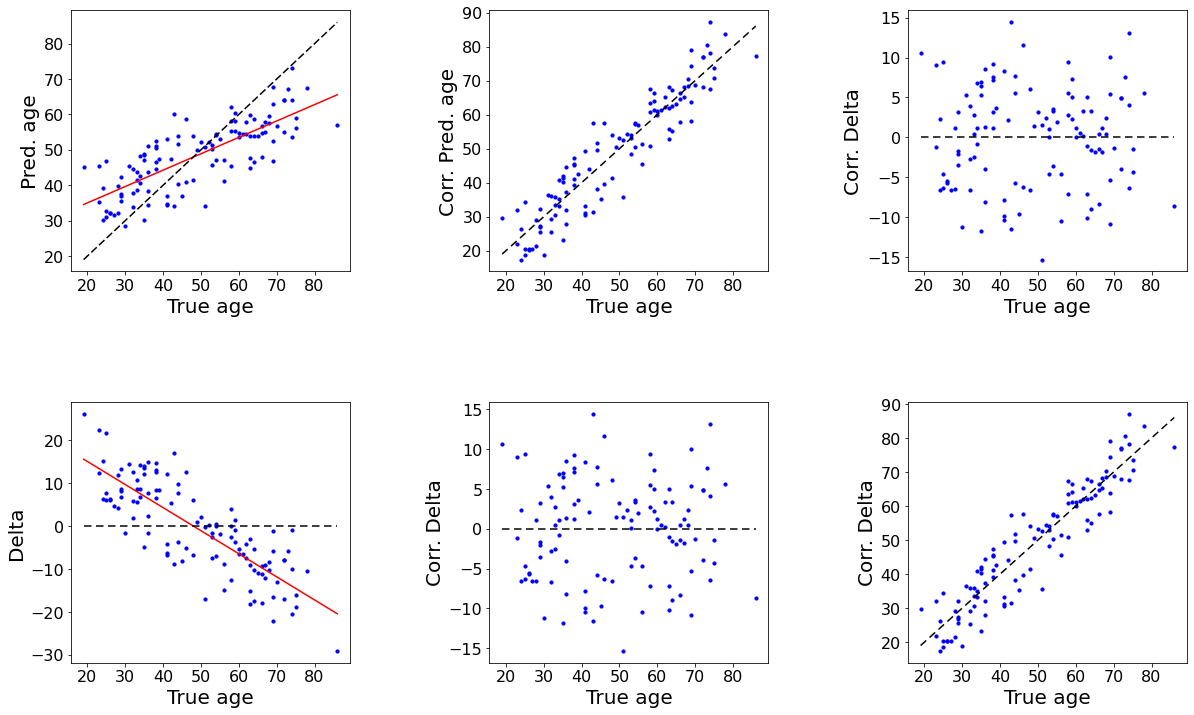

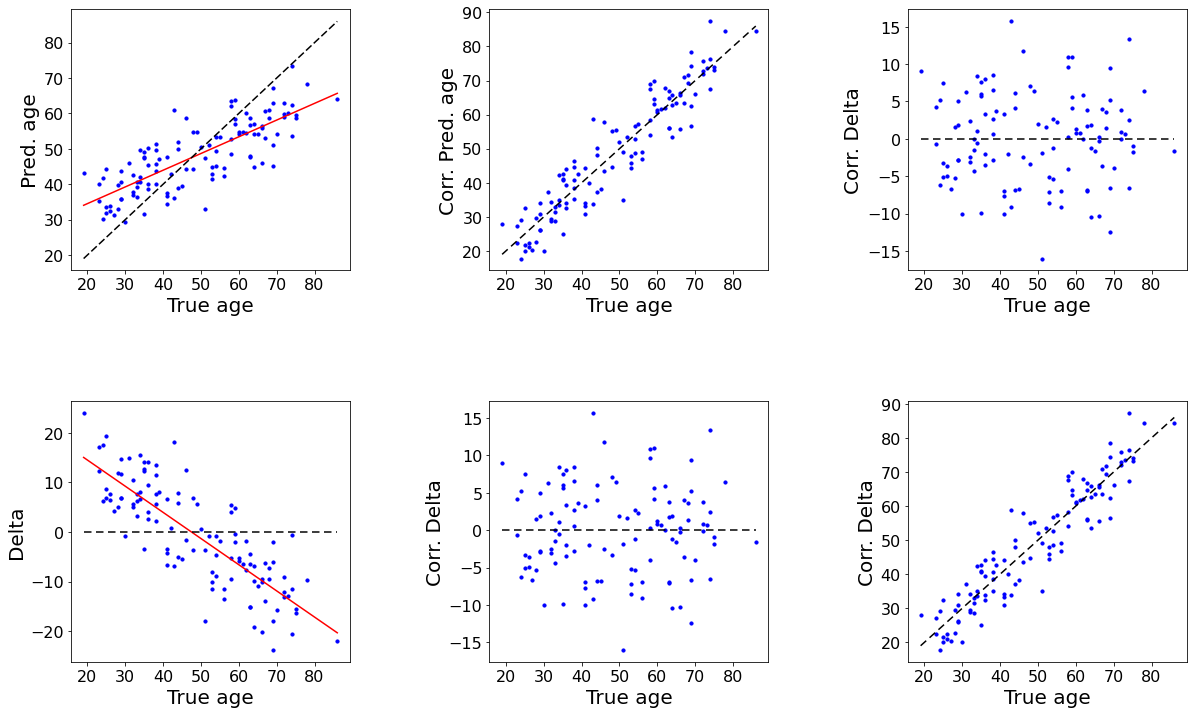

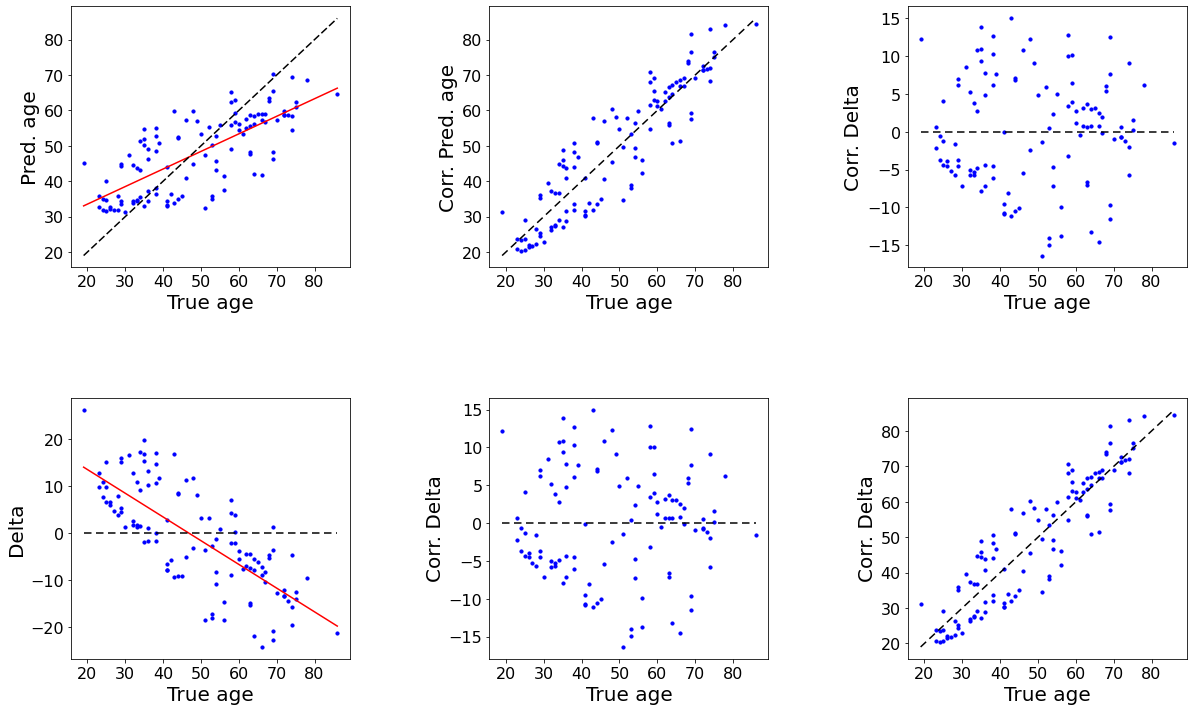

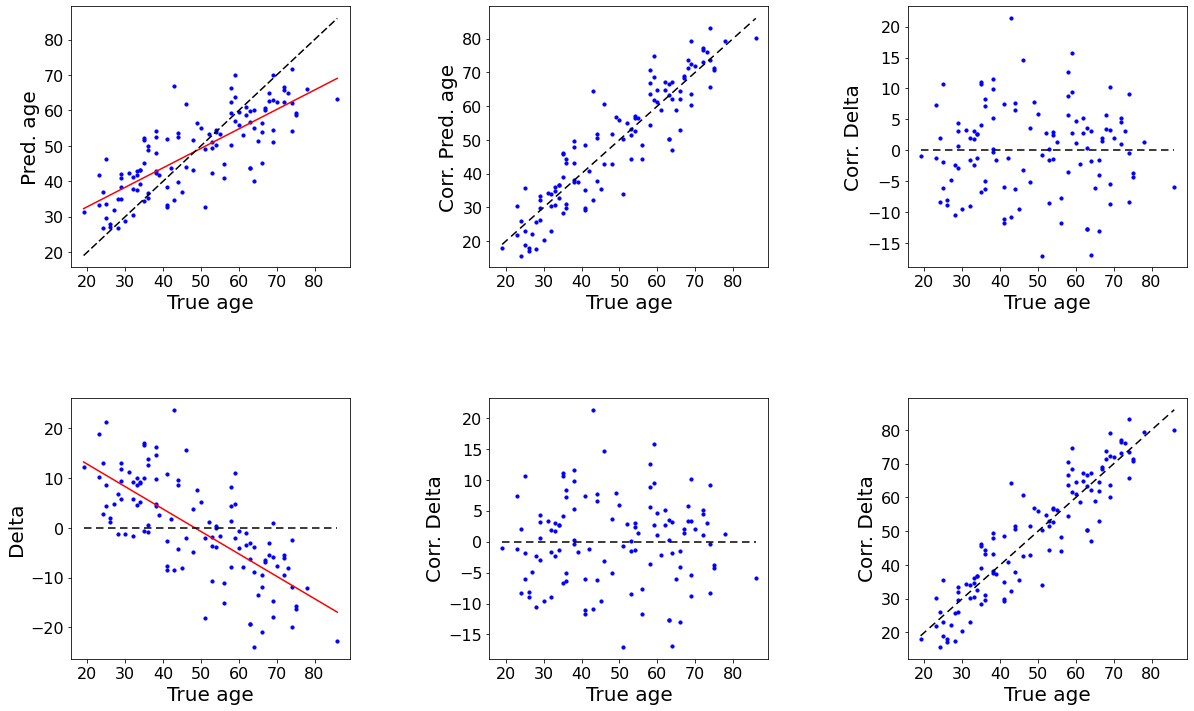

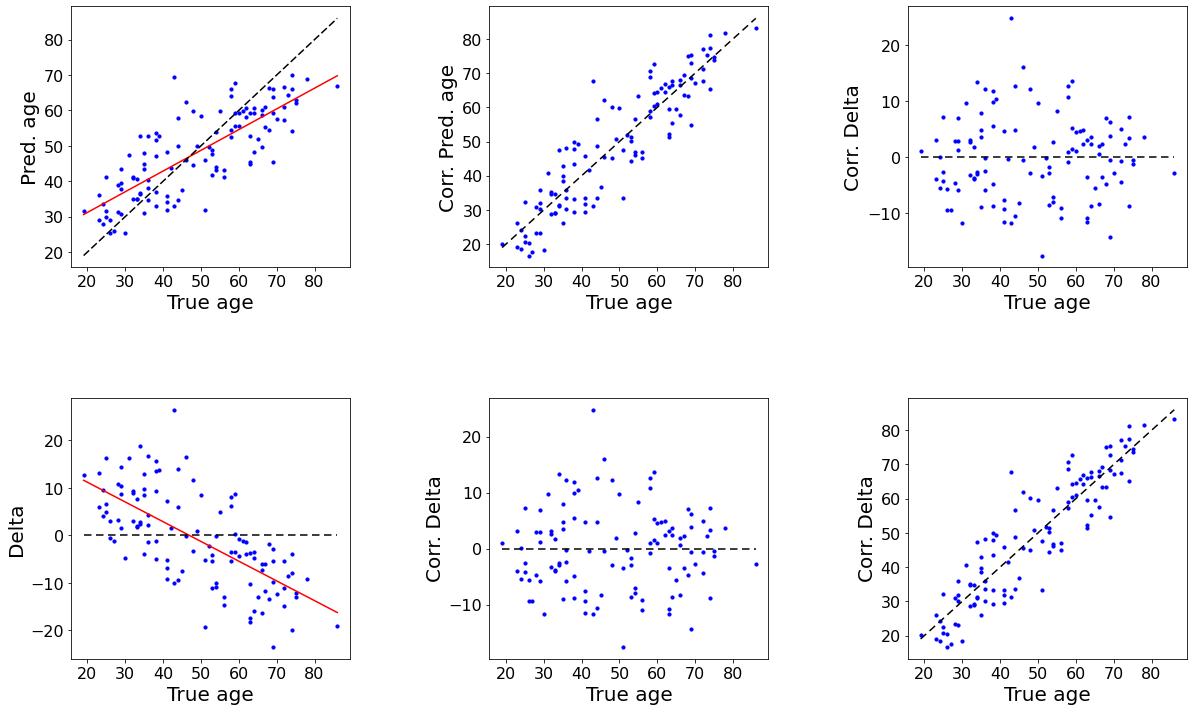

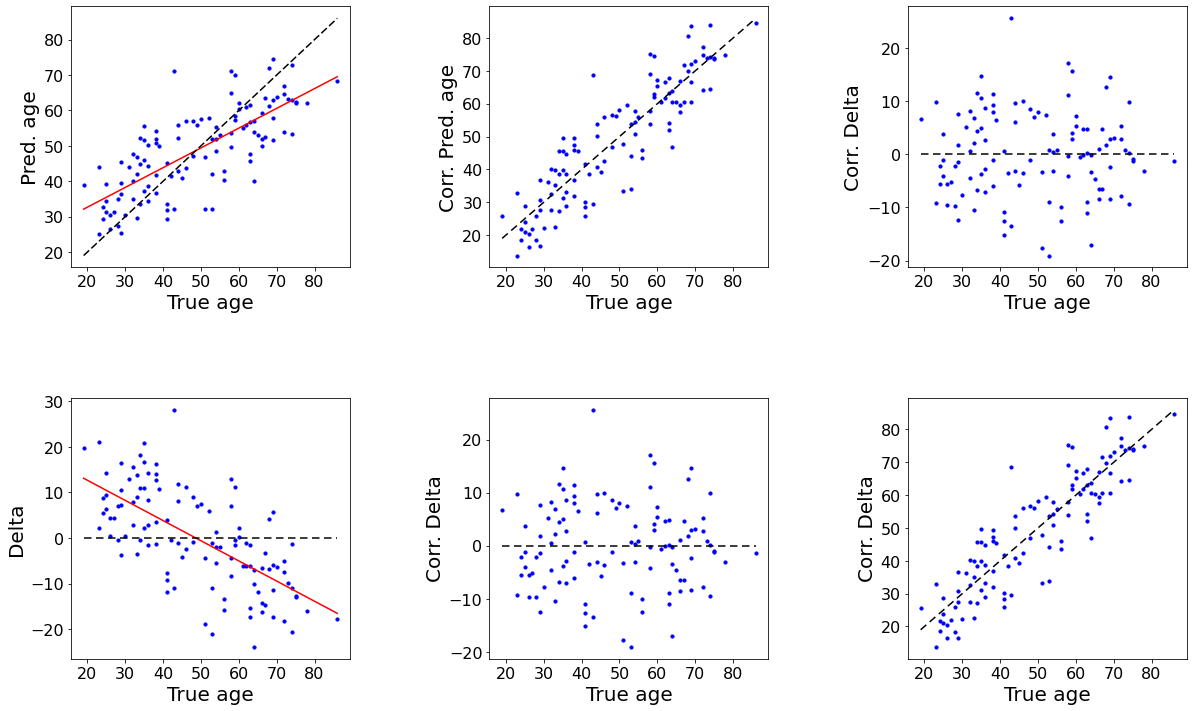

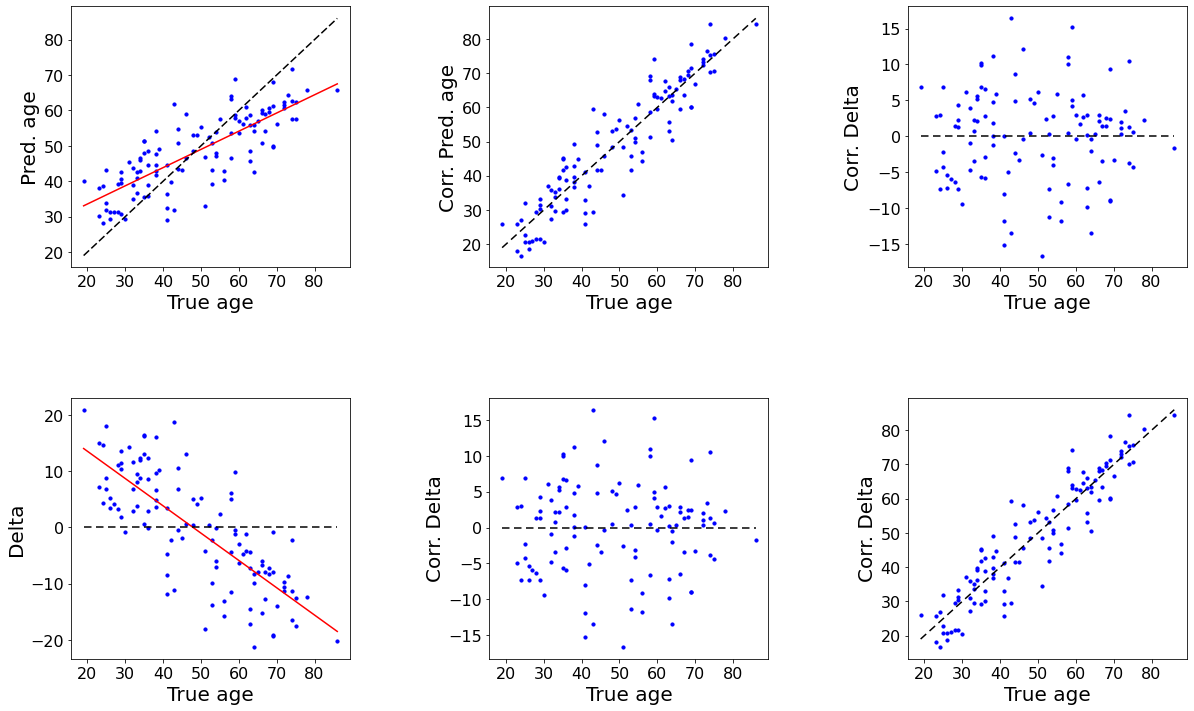

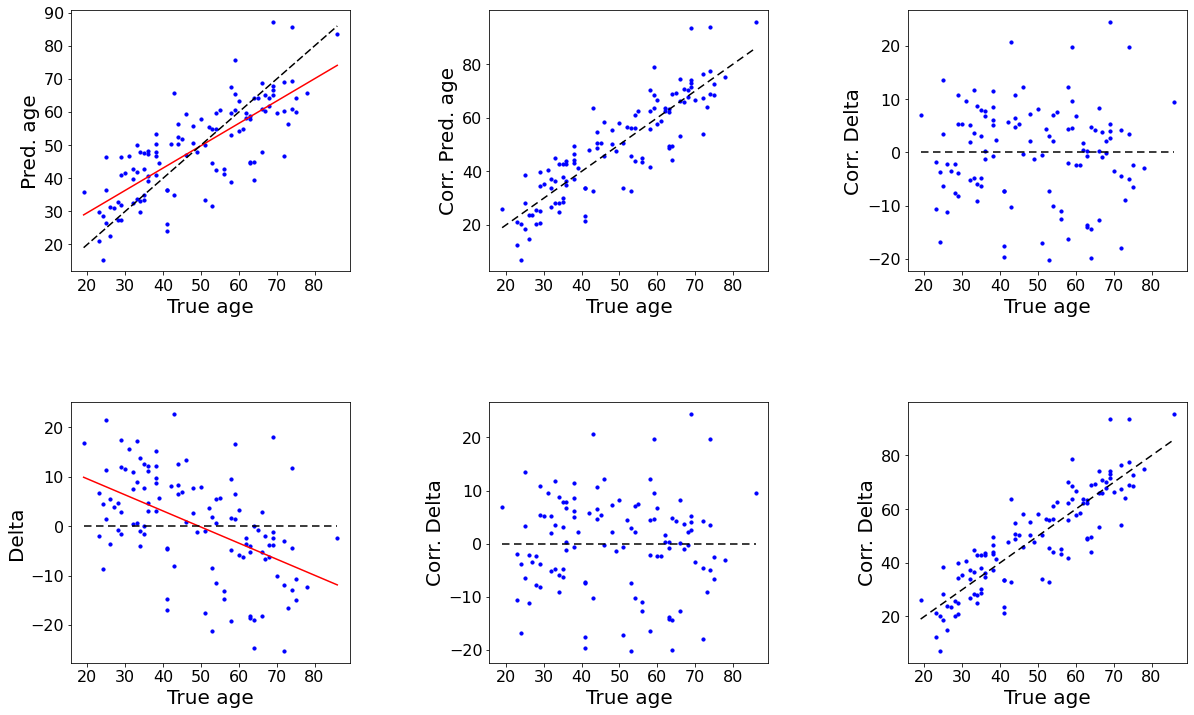

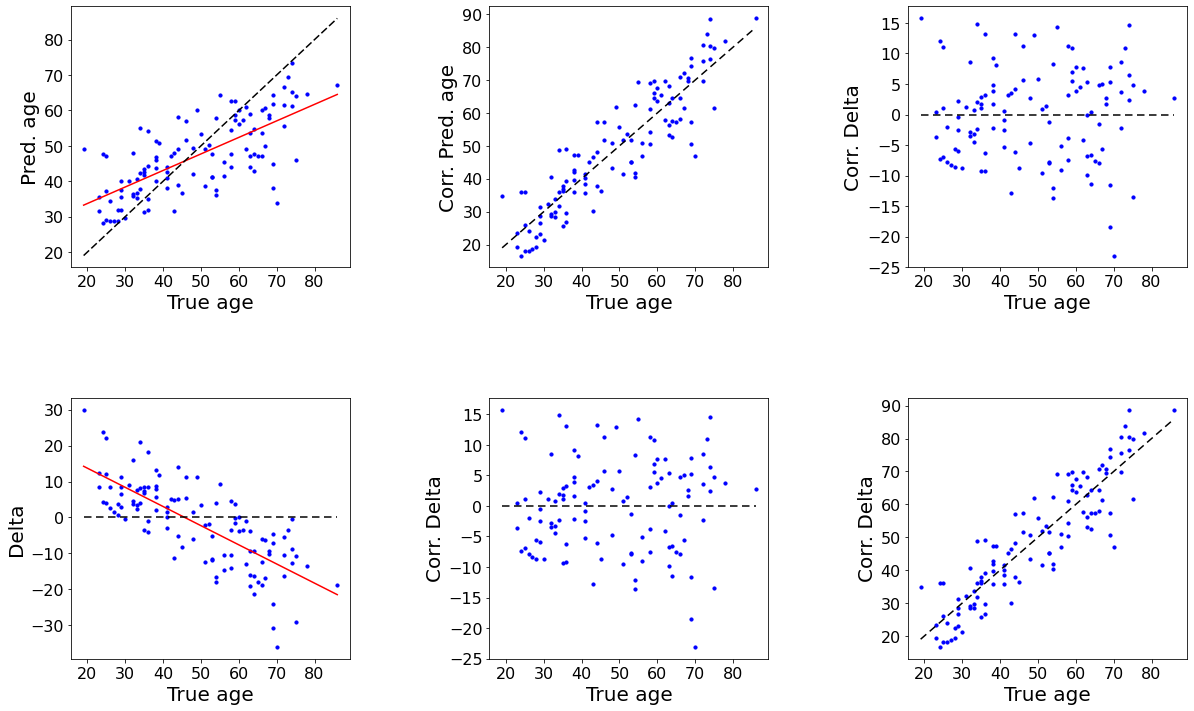

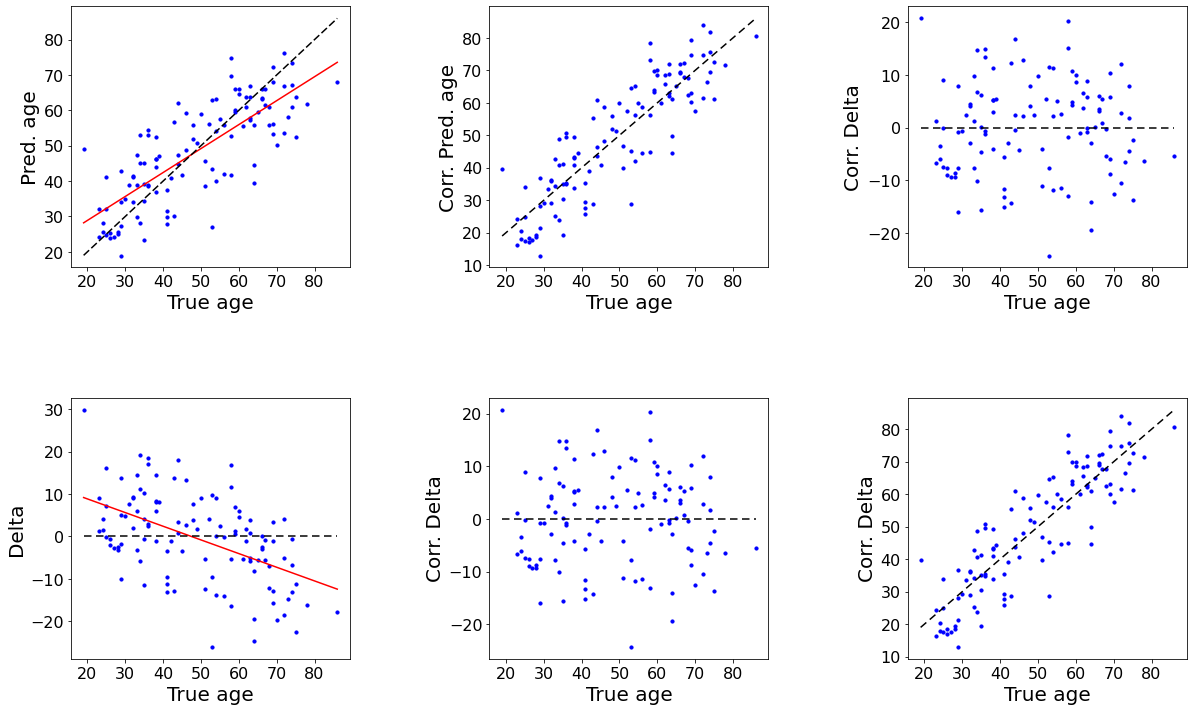

In [140]:
for i in range(ixi_pred_age.shape[1]):
    ixi_pred_age_plot(ixi_test, ixi_pred_age, ixi_corr_pred_age, ixi_corr_delta, ixi_delta, i, save=True, file_name=f'{ixi_pred_age.columns[i]}')

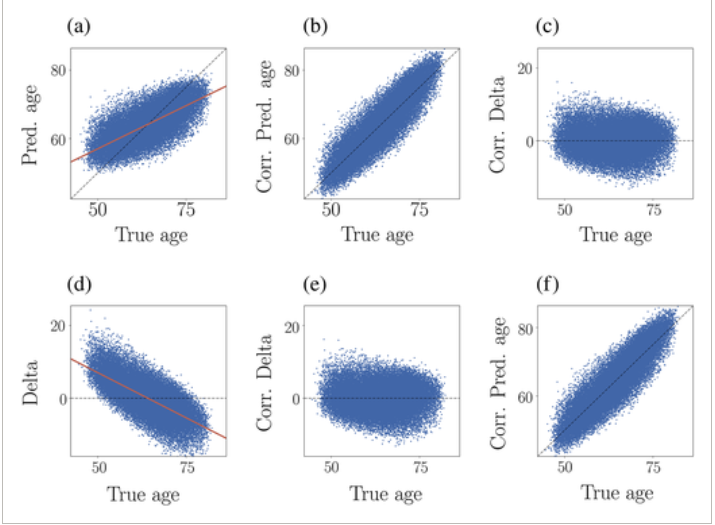

- (a) : The uncorrected association between preeicted and true age. Orange Line shows the linear fit applied to model the age bias.
- (b) : The relationship between predicted and ture age after the bias correction
- (c) : Corrected Delta calculated as (corrected predicted age) - (true age)
- (d) : The uncorrected relationship between brain age delta and true age. with the orange line showing the linear fit applied to model the age bias 
- (e) : corrected delta calculated based on the correction in plot d, shich shows no age dependence 
- (f) : Corrected predicted age calculated using corrected delta + true age

In [144]:
def hcp_pred_age_plot(hcp_test, hcp_pred_age, hcp_corr_pred_age, hcp_corr_delta,hcp_delta, model_idx, save=False, file_name=''): 
    hcp_test = hcp_test.reset_index(drop=True) 
    hcp_chro_age = hcp_test['age'] 
    plt.figure(figsize=(20,12)) 
    plt.subplots_adjust(hspace=0.5, wspace=0.5) 
    
    # True Age / Pred. Age 
    plt.subplot(2,3,1) 
    a, b = np.polyfit(hcp_chro_age, hcp_pred_age.iloc[:, model_idx], 1) 
    plt.plot([hcp_chro_age.min(), hcp_chro_age.max()], [a*hcp_chro_age.min() + b, a*hcp_chro_age.max()+b], color='red') 
    plt.scatter(hcp_chro_age, hcp_pred_age.iloc[:, model_idx], c ="blue", s=10) 
    plt.plot([hcp_chro_age.min(), hcp_chro_age.max()], [hcp_chro_age.min(), hcp_chro_age.max()], color='k', linestyle='--', dashes=(5, 2)) 
    plt.xticks(fontsize=16) 
    plt.yticks(fontsize=16) 
    plt.xlabel('True age', fontsize=20) 
    plt.ylabel('Pred. age', fontsize=20) 
    
    # True Age / Corrected Pred. Age 
    plt.subplot(2, 3, 2) 
    plt.scatter(hcp_chro_age, hcp_corr_pred_age.iloc[:, model_idx], c ="blue", s=10) 
    plt.plot([hcp_chro_age.min(), hcp_chro_age.max()], [hcp_chro_age.min(), hcp_chro_age.max()], color = 'k', linestyle='--', dashes=(5, 3)) 
    plt.xticks(fontsize=16) 
    plt.yticks(fontsize=16) 
    plt.xlabel('True age', fontsize=20) 
    plt.ylabel('Corr. Pred. age', fontsize=20) 
    
    # True Age / Corrected Delta 
    plt.subplot(2, 3, 3) 
    plt.scatter(hcp_chro_age, hcp_corr_delta.iloc[:, model_idx], c ="blue", s=10) 
    plt.plot([hcp_chro_age.min(), hcp_chro_age.max()], [0,0], color = 'k', linestyle='--', dashes=(5, 3)) 
    plt.xticks(fontsize=16) 
    plt.yticks(fontsize=16) 
    plt.xlabel('True age', fontsize=20) 
    plt.ylabel('Corr. Delta', fontsize=20) 
    
    plt.subplot(2,3,4) 
    plt.scatter(hcp_chro_age, hcp_delta.iloc[:, model_idx], c='blue', s=10) 
    a, b = np.polyfit(hcp_chro_age, hcp_delta.iloc[:, model_idx], 1) 
    plt.plot([hcp_chro_age.min(), hcp_chro_age.max()], [a*hcp_chro_age.min() + b, a*hcp_chro_age.max()+b], color='red') 
    plt.plot([hcp_chro_age.min(), hcp_chro_age.max()], [0,0], color = 'k', linestyle='--', dashes=(5, 3)) 
    plt.xticks(fontsize=16) 
    plt.yticks(fontsize=16) 
    plt.xlabel('True age', fontsize=20) 
    plt.ylabel('Delta', fontsize=20) 
    
    
    corr_delta = hcp_delta.iloc[:, model_idx] - (a*hcp_chro_age + b) 
    plt.subplot(2,3,5) 
    plt.scatter(hcp_chro_age, corr_delta, c = 'blue', s=10) 
    plt.plot([hcp_chro_age.min(), hcp_chro_age.max()], [0,0], color='k', linestyle='--', dashes=(5,3)) 
    plt.xticks(fontsize=16) 
    plt.yticks(fontsize=16) 
    plt.xlabel('True age', fontsize=20) 
    plt.ylabel('Corr. Delta', fontsize=20) 
    
    
    plt.subplot(2,3,6) 
    plt.scatter(hcp_chro_age, corr_delta + hcp_chro_age, c = 'blue', s=10) 
    plt.plot([hcp_chro_age.min(), hcp_chro_age.max()],[hcp_chro_age.min(), hcp_chro_age.max()],color='k', linestyle='--', dashes=(5,3)) 
    plt.xticks(fontsize=16) 
    plt.yticks(fontsize=16) 
    plt.xlabel('True age', fontsize=20) 
    plt.ylabel('Corr. Delta', fontsize=20) 
    
    # Save file 
    if save : plt.savefig(f'./visualization/HCP_bias_corr_delta_plot/{file_name}.png', dpi=500) 
    
    # To show the plot 
    plt.show()

    


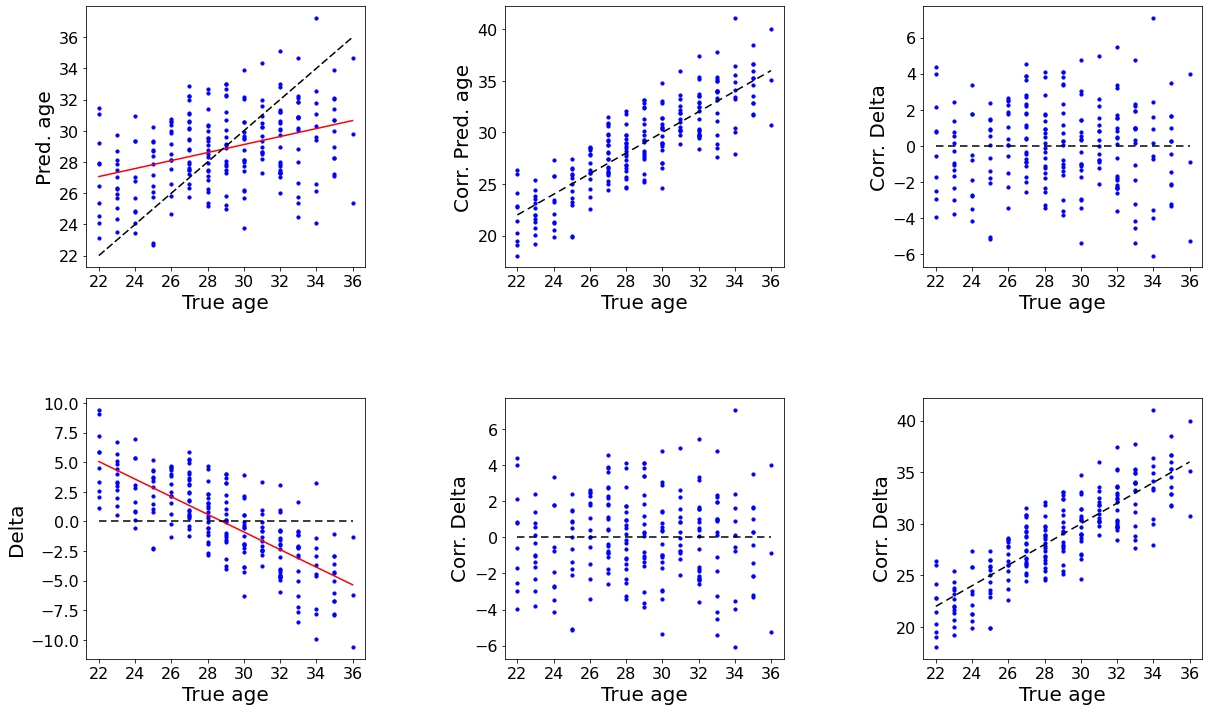

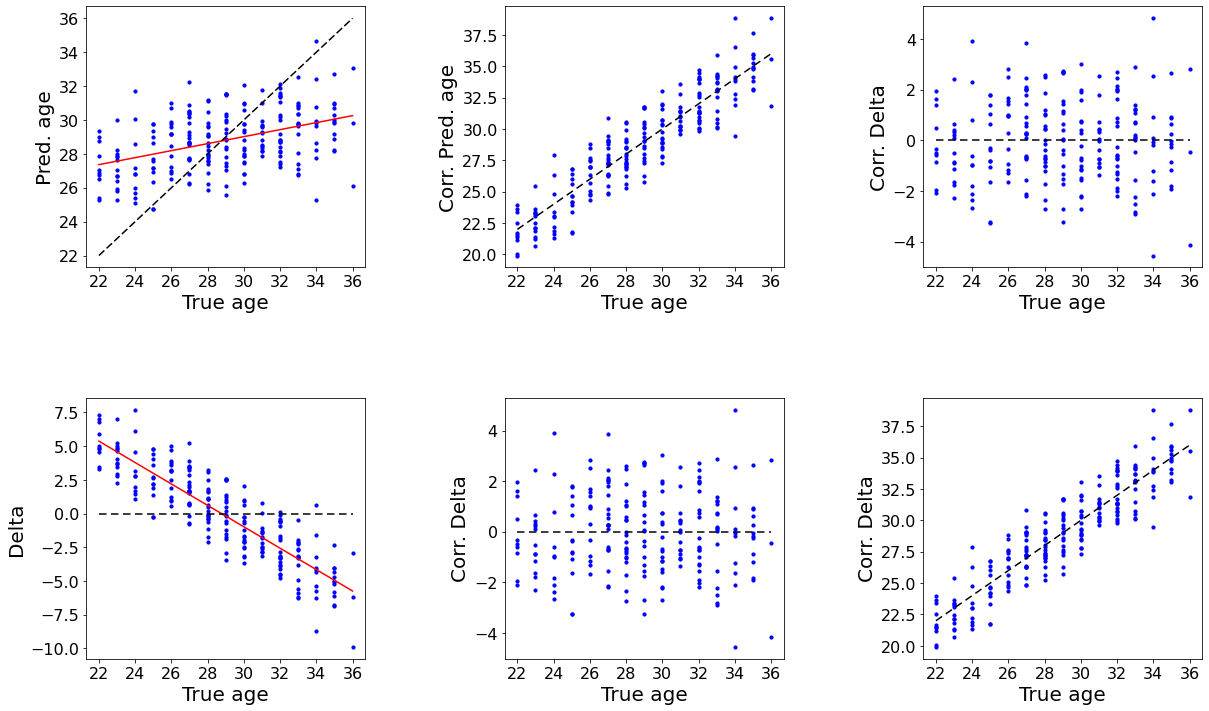

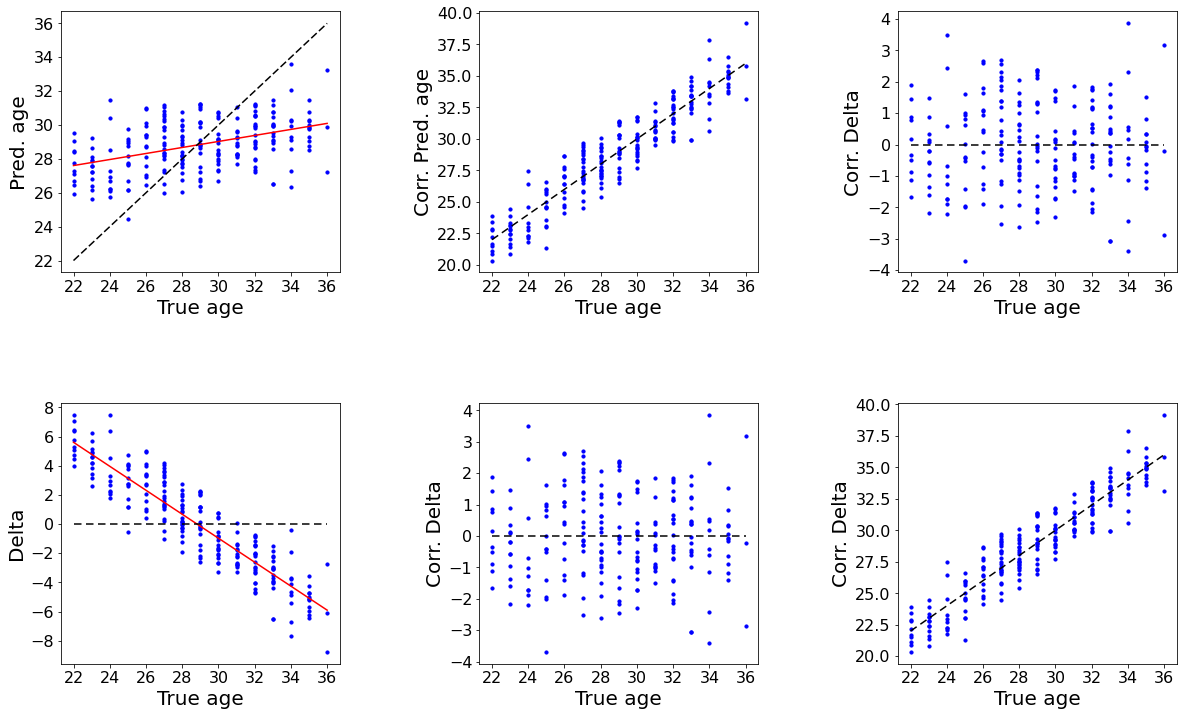

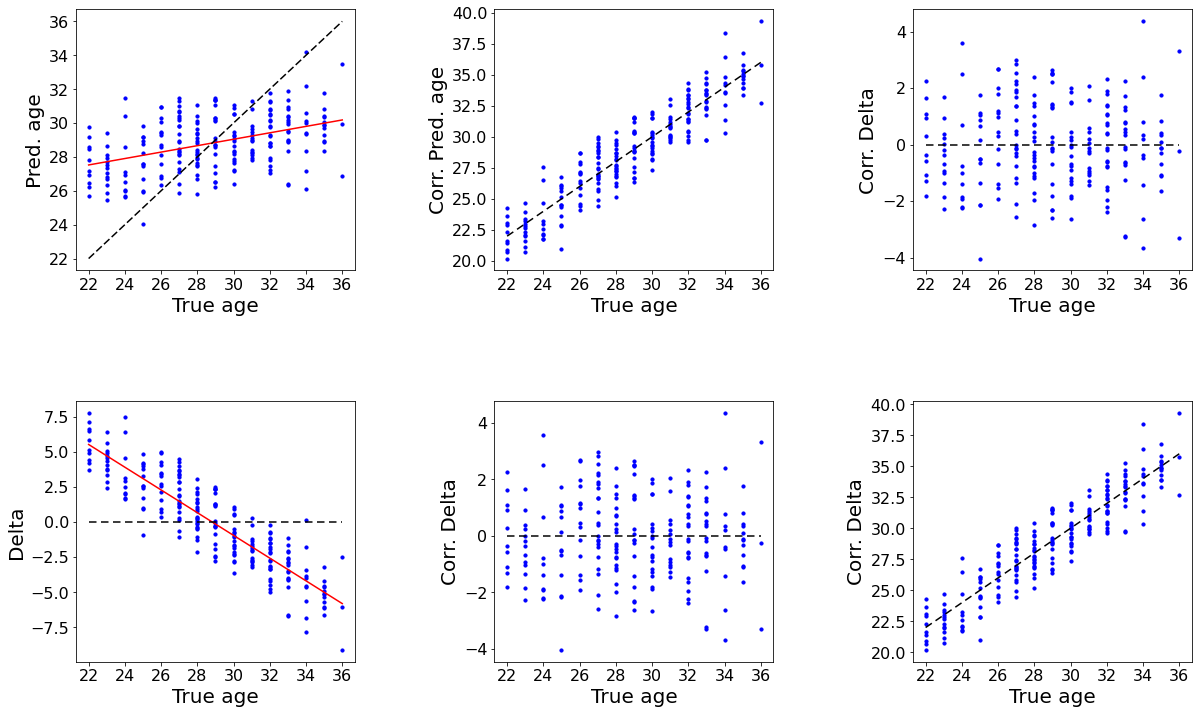

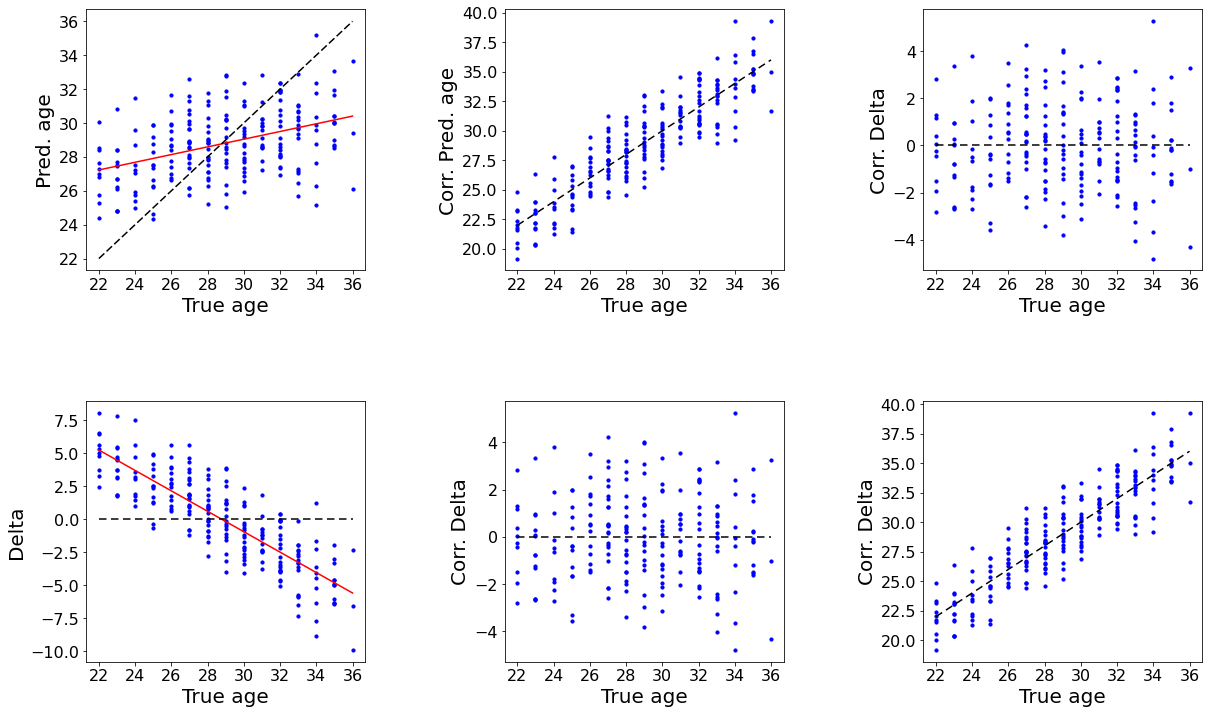

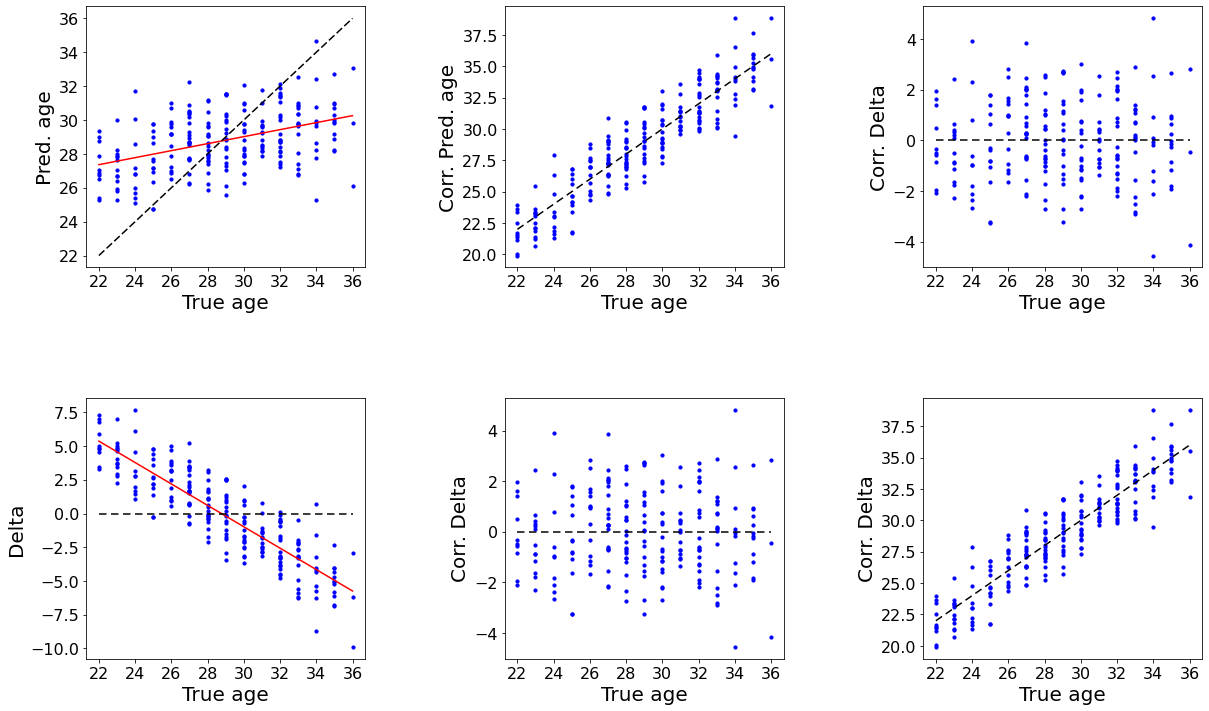

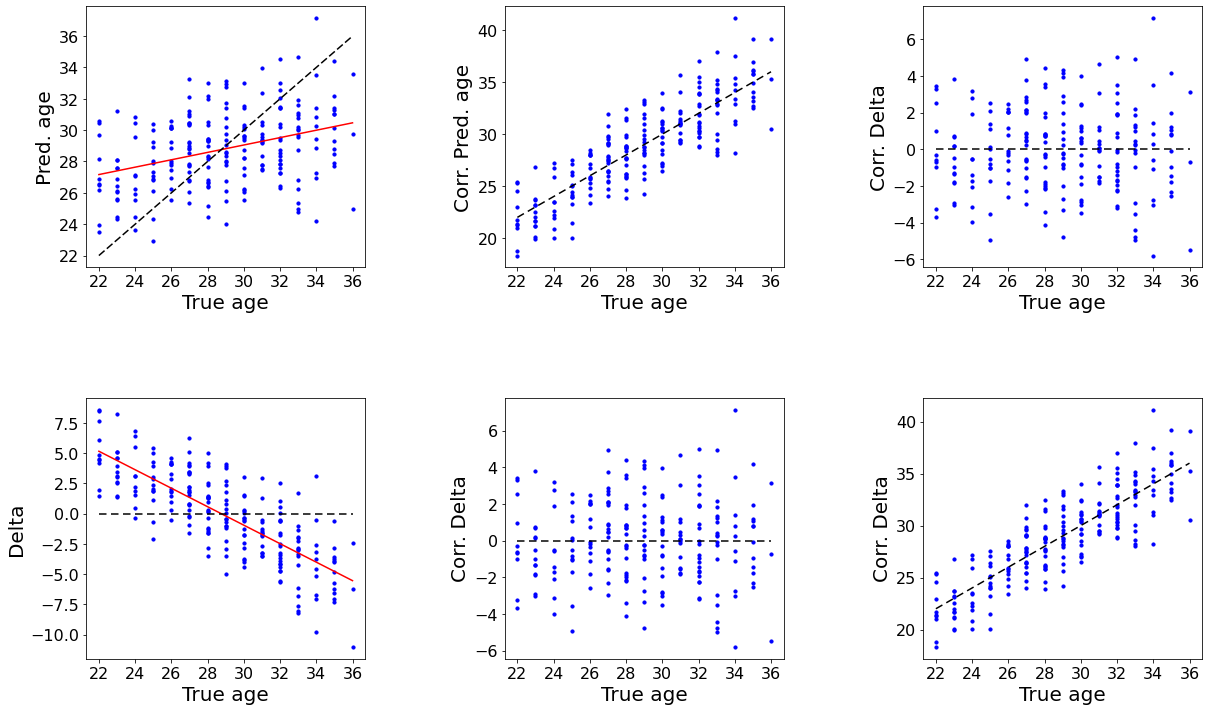

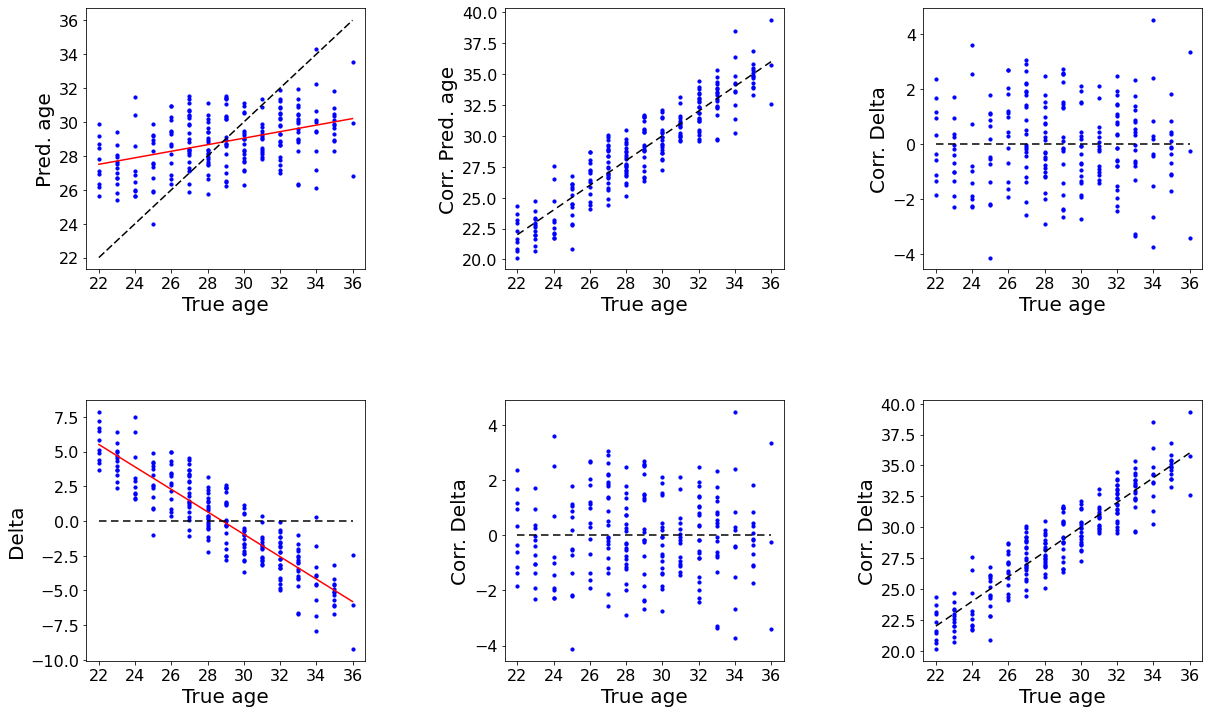

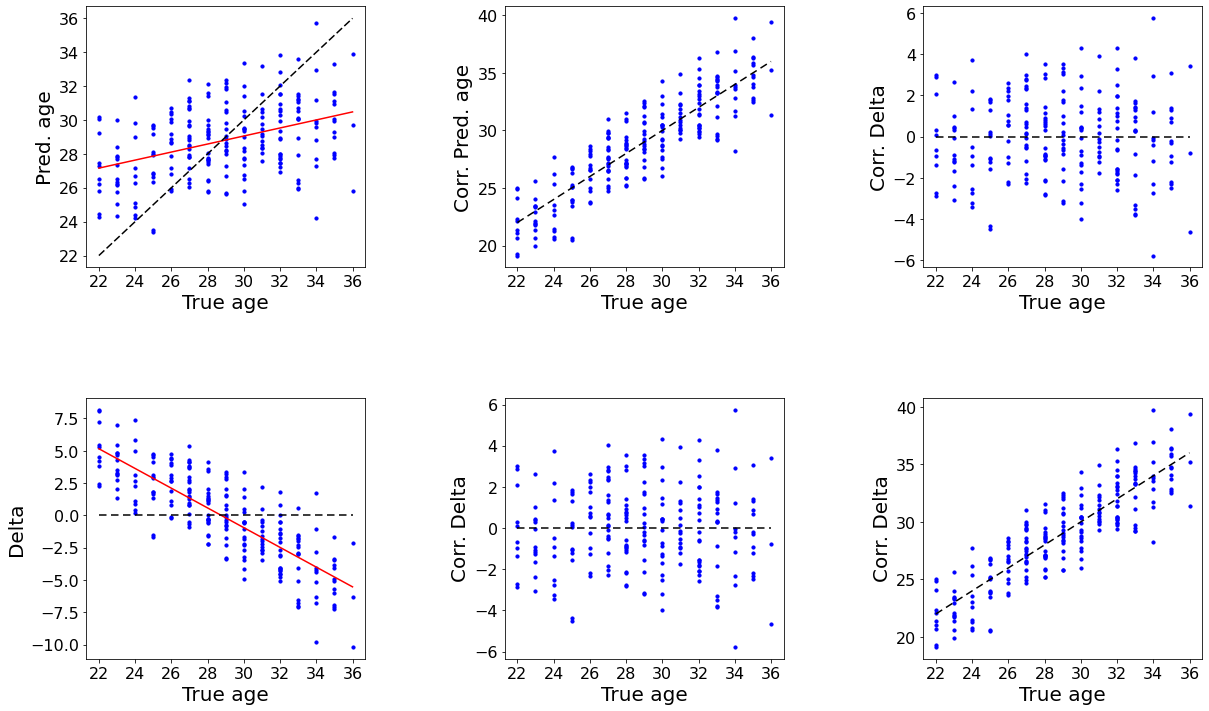

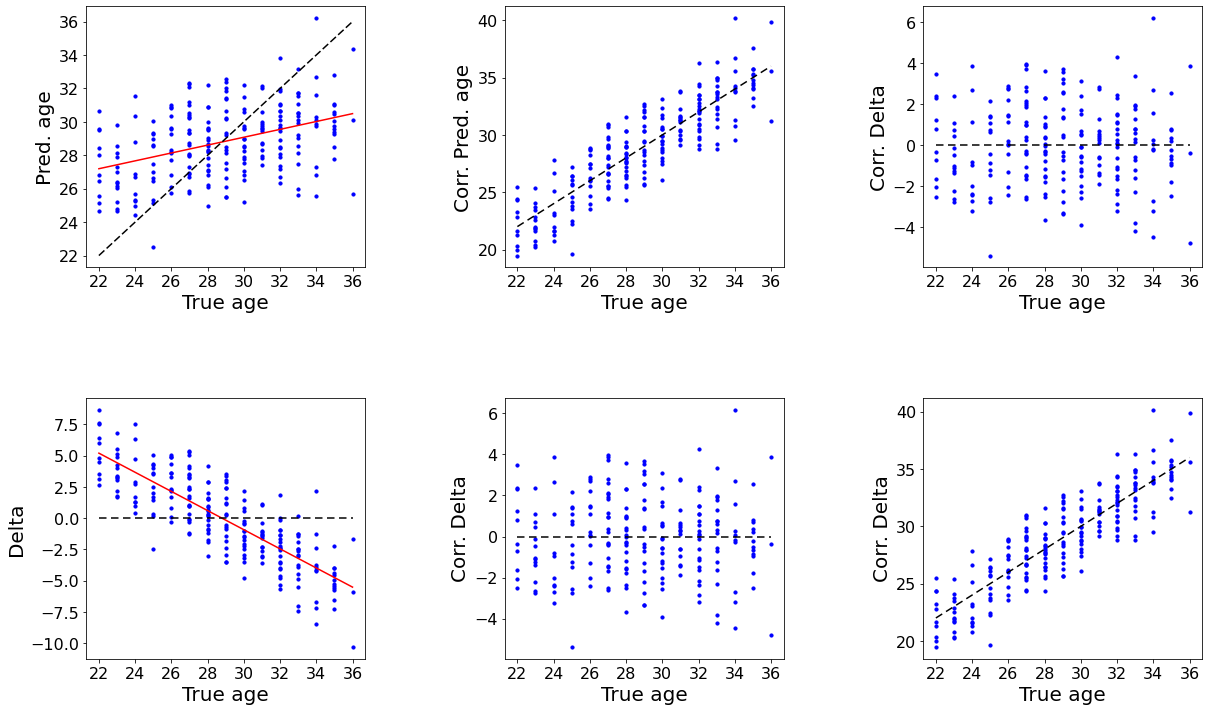

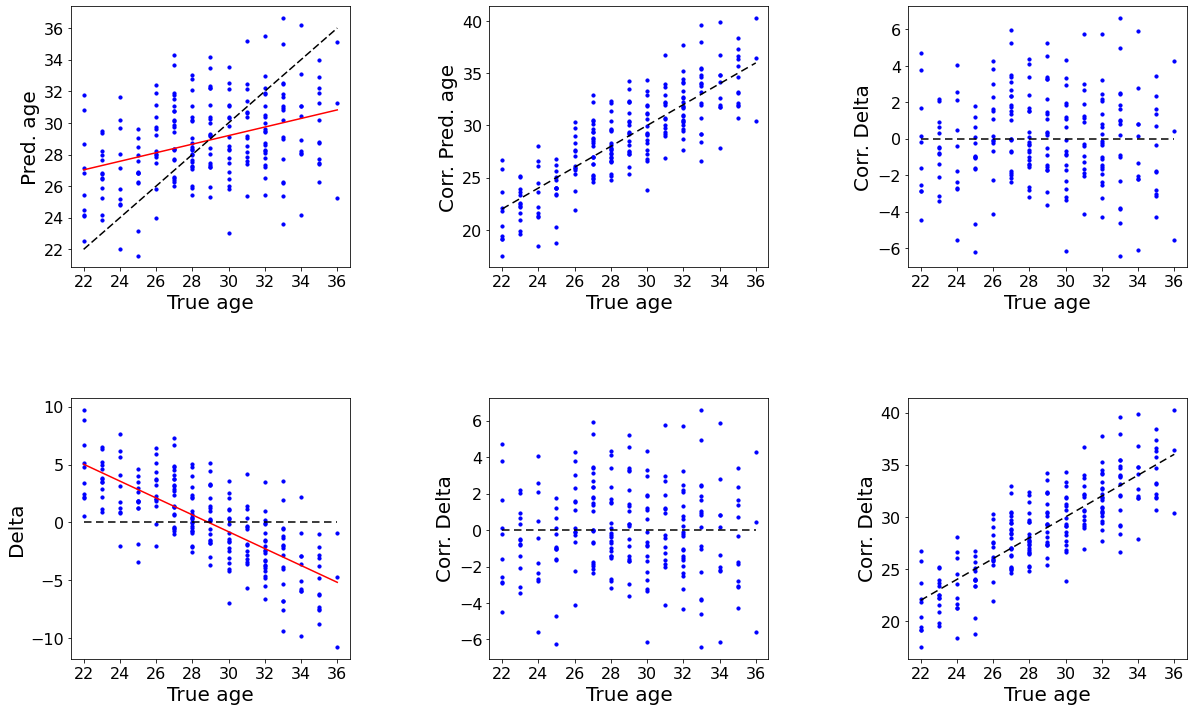

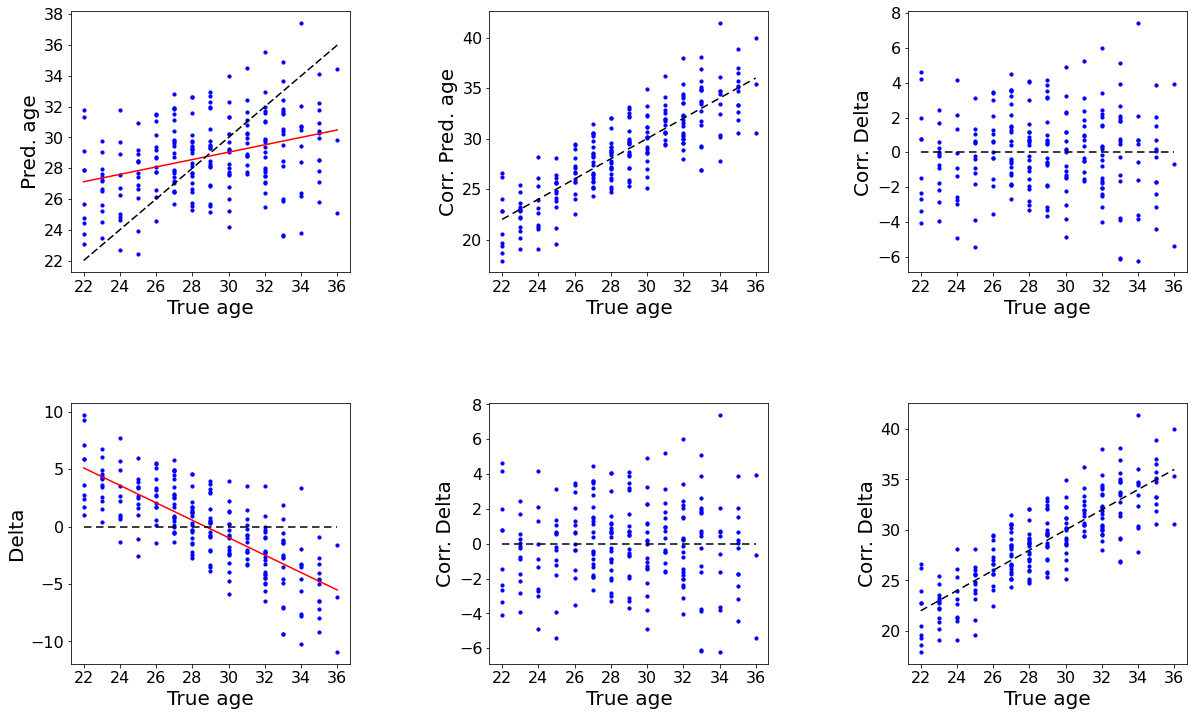

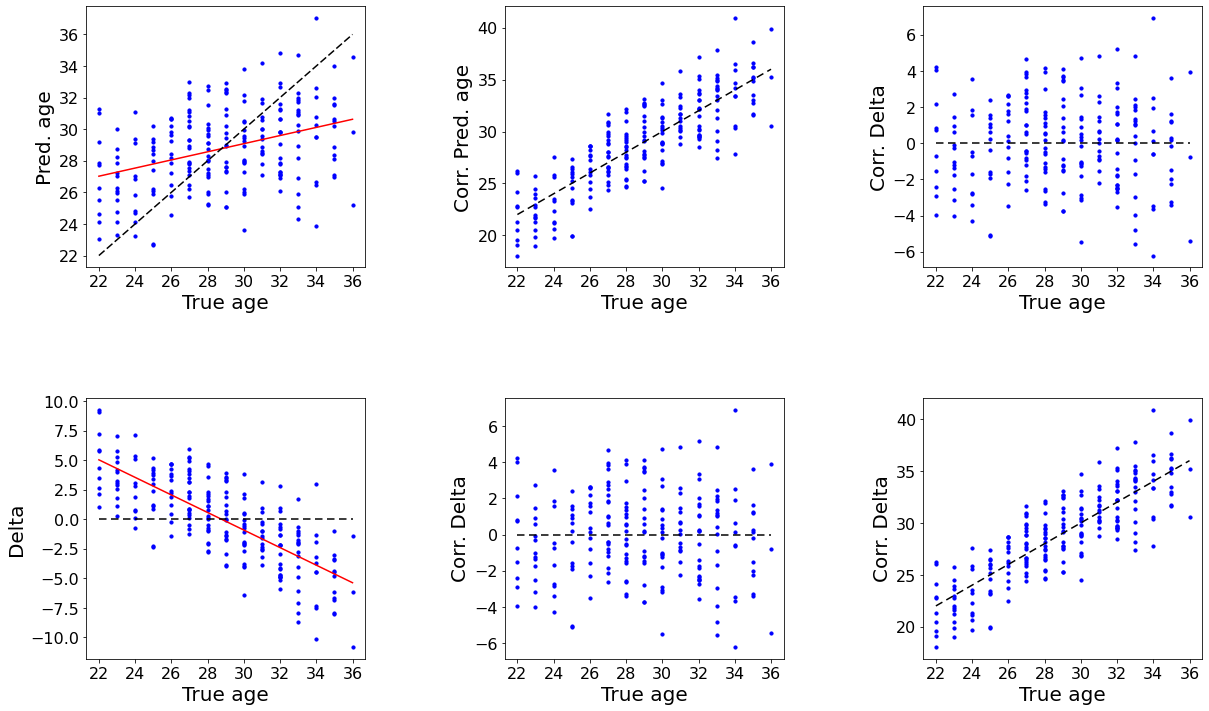

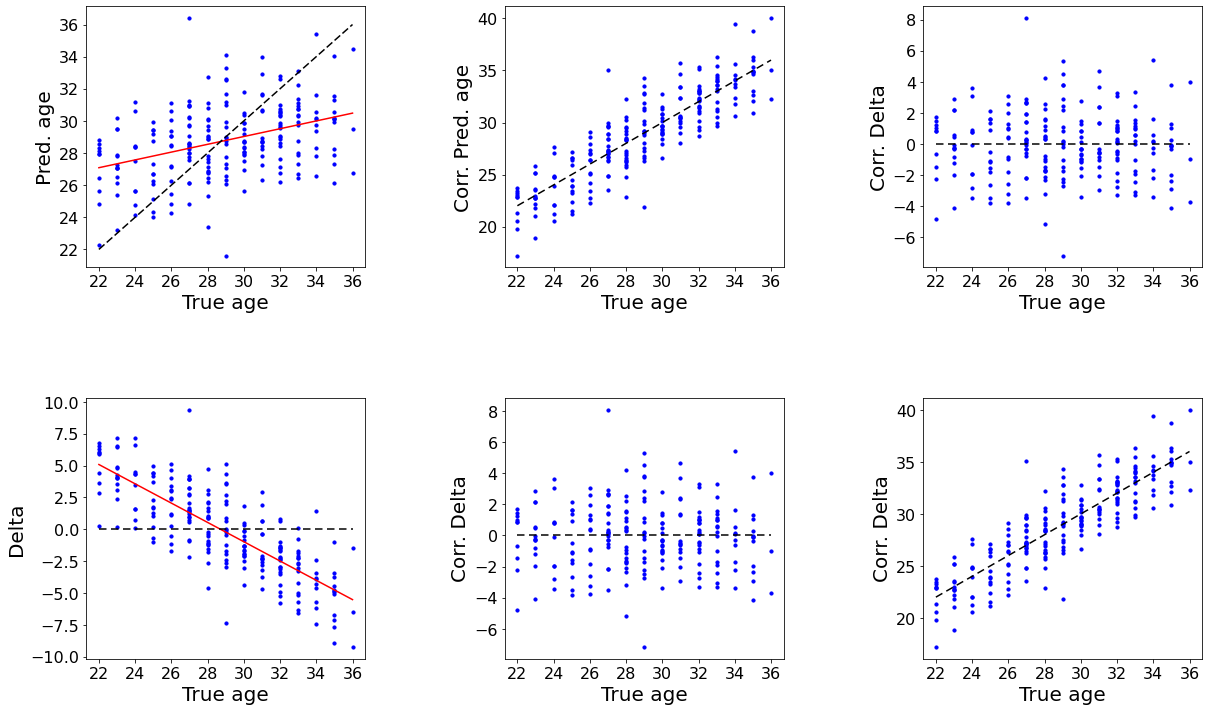

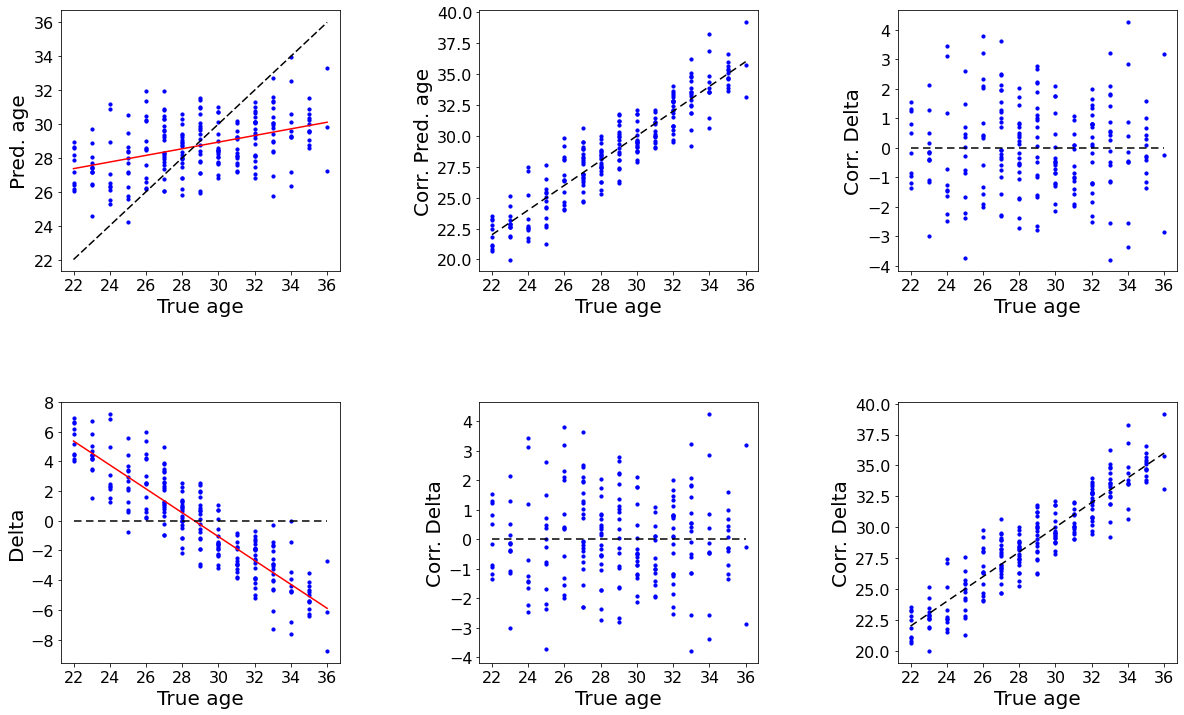

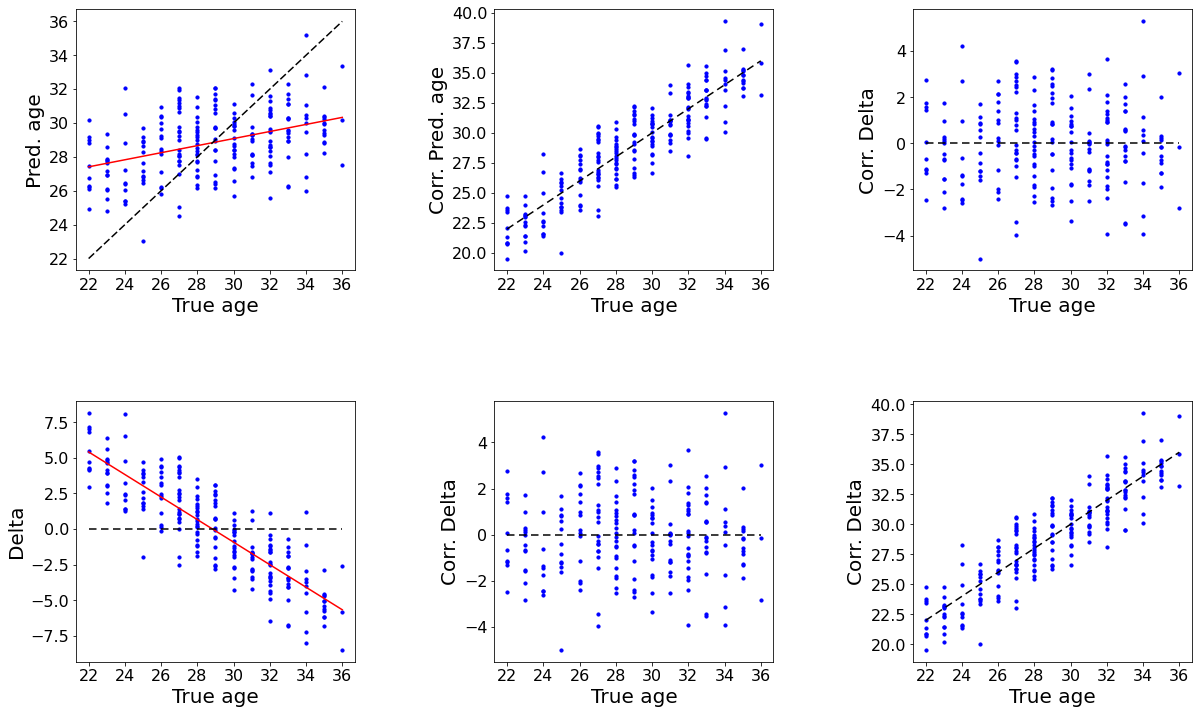

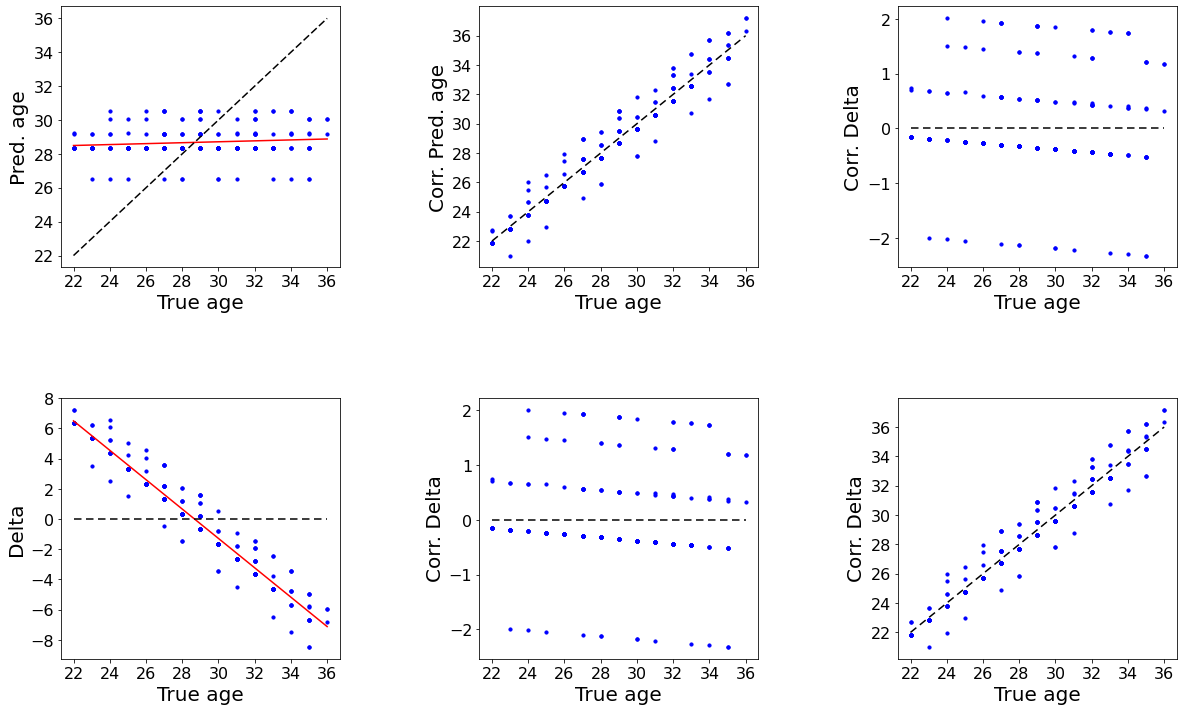

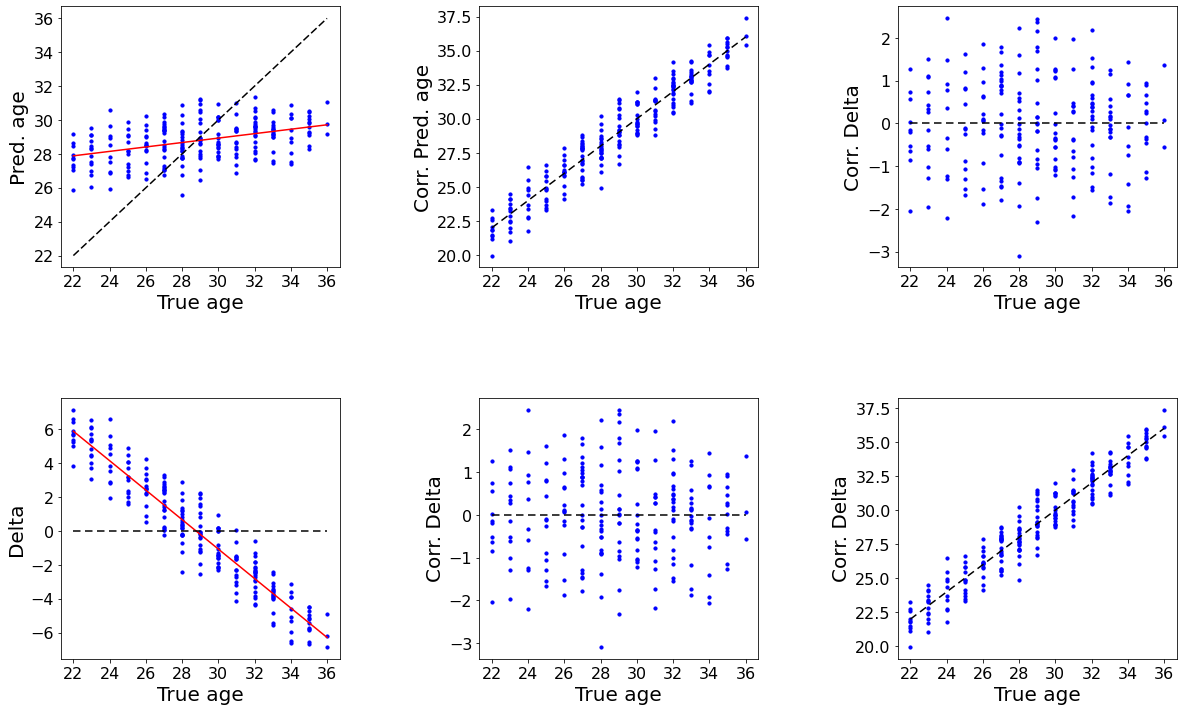

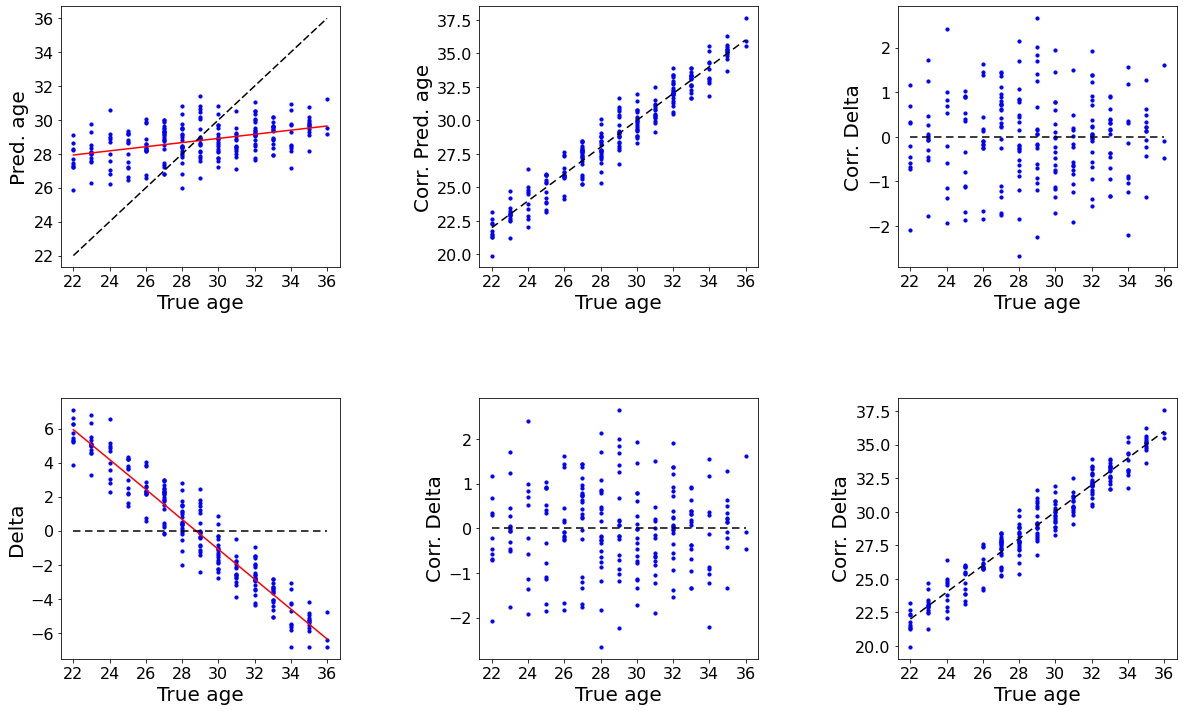

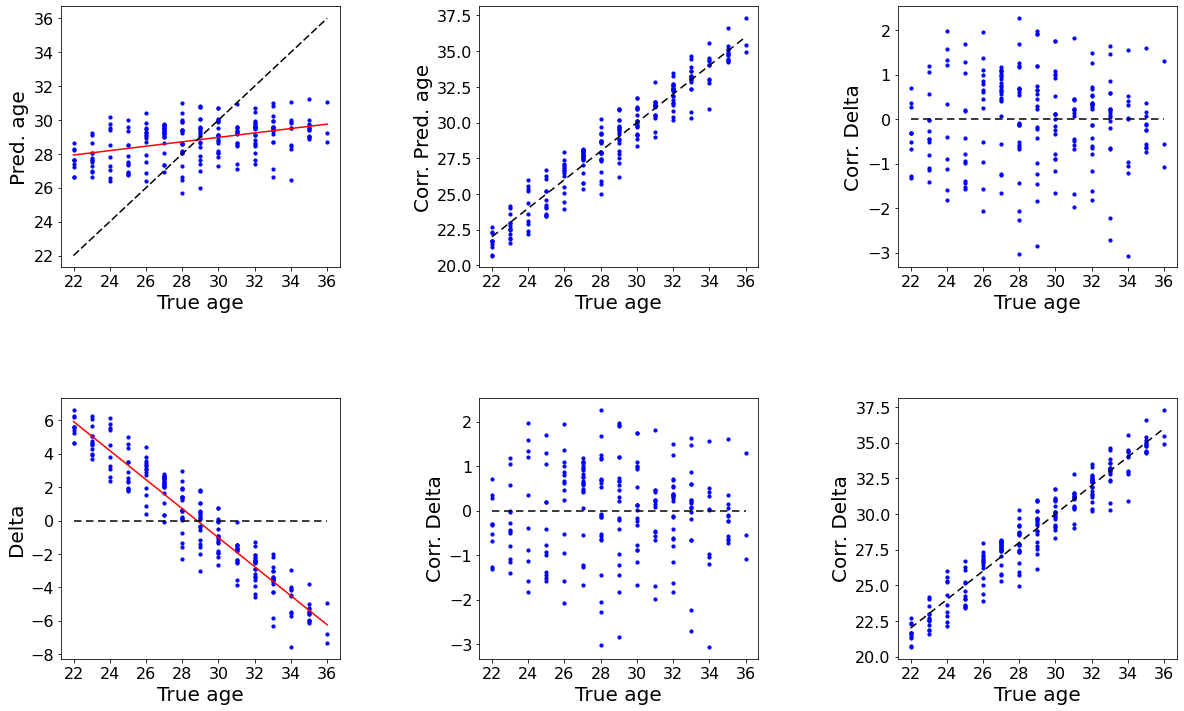

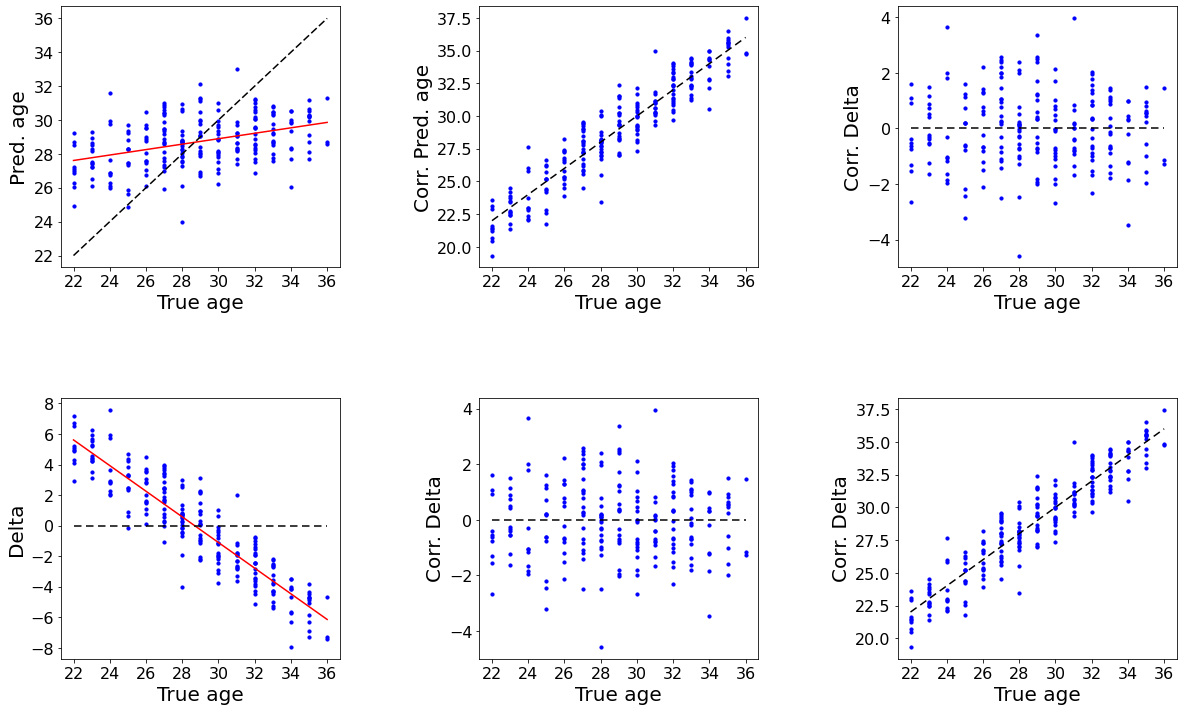

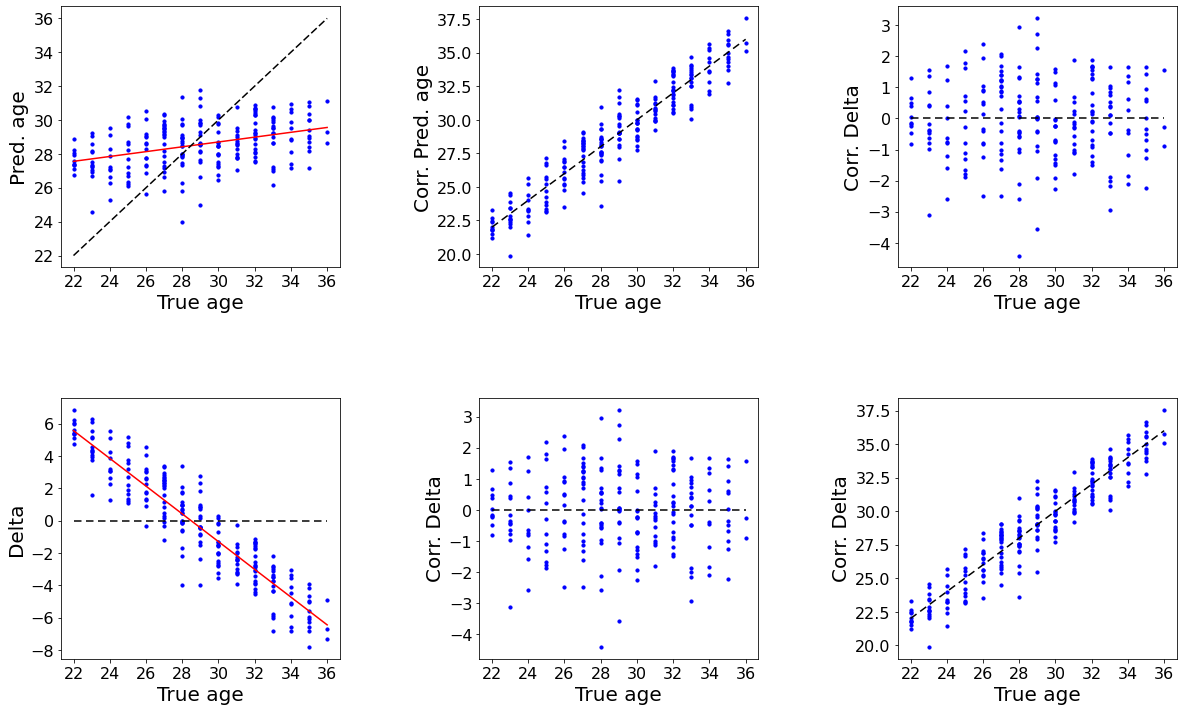

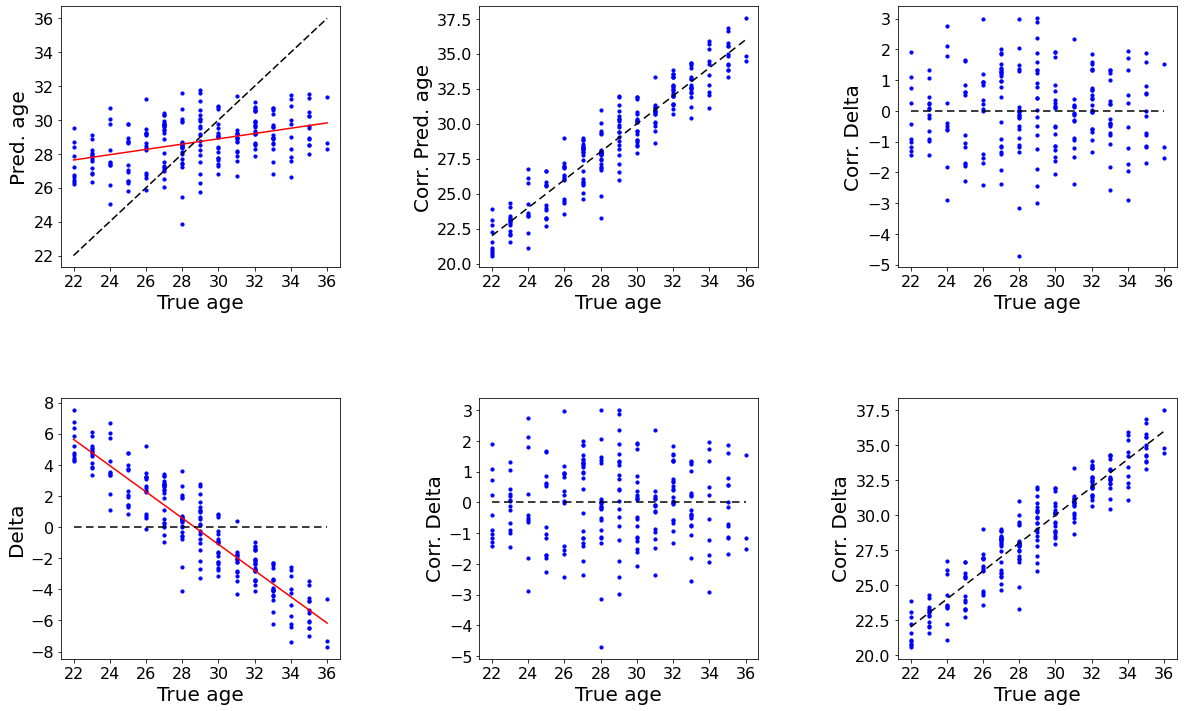

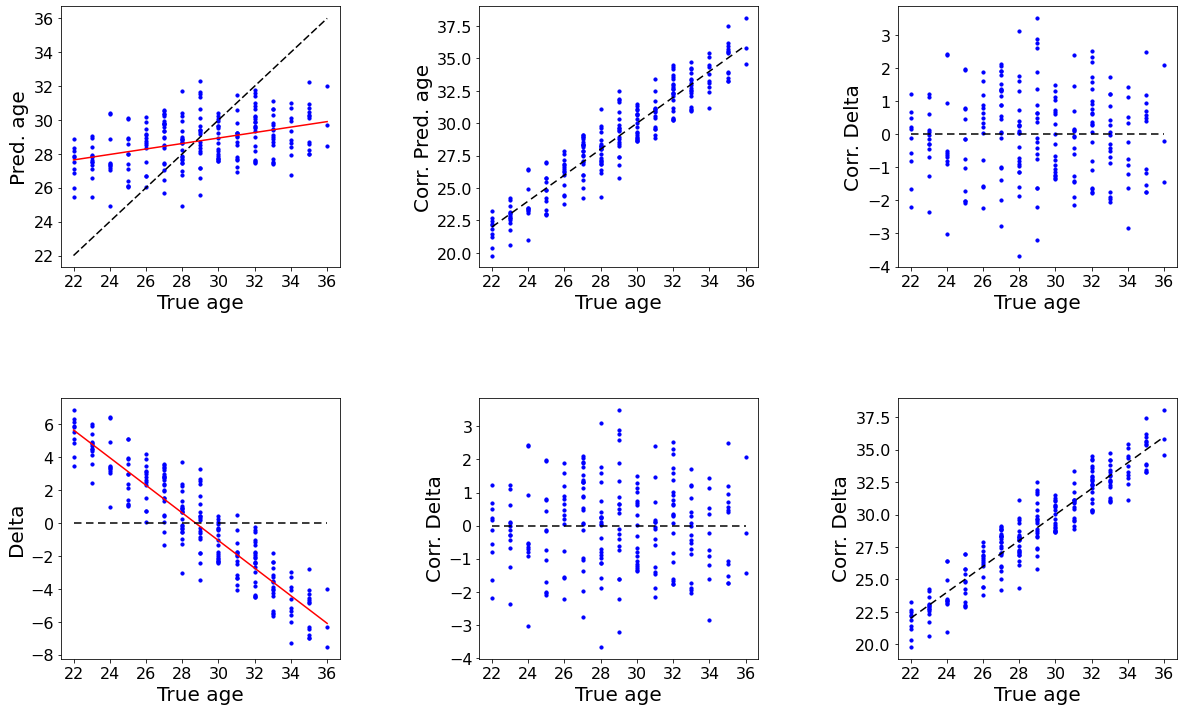

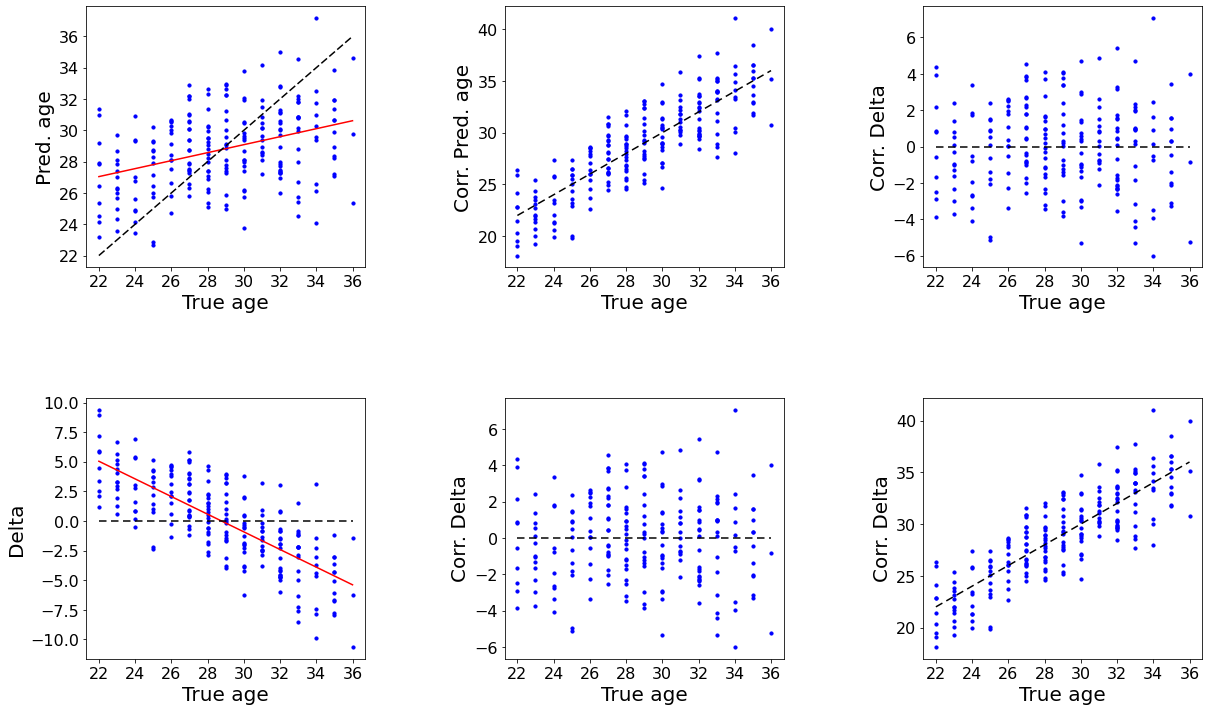

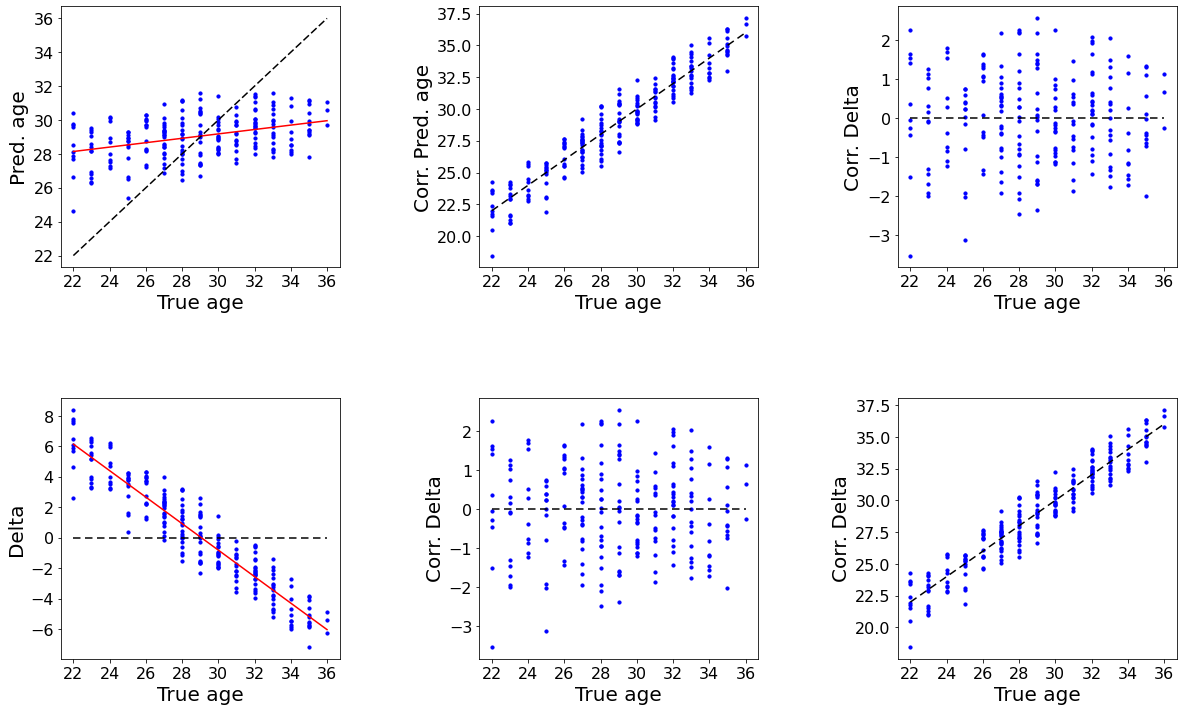

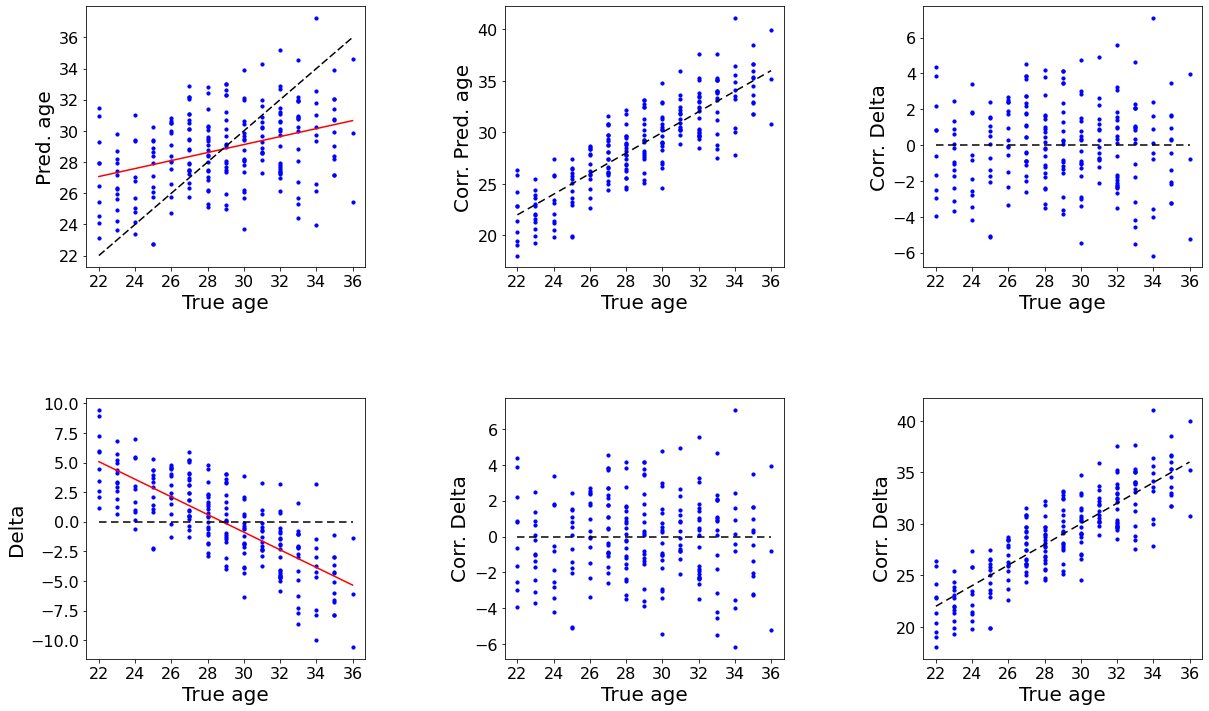

In [146]:
for i in range(hcp_pred_age.shape[1]):
    hcp_pred_age_plot(hcp_test, hcp_pred_age, hcp_corr_pred_age, hcp_corr_delta, hcp_delta, i, save=True, file_name=f'{hcp_pred_age.columns[i]}')

In [147]:
def cc_pred_age_plot(cc_test, cc_pred_age, cc_corr_pred_age, cc_corr_delta,cc_delta, model_idx, save=False, file_name=''): 
    cc_test = cc_test.reset_index(drop=True) 
    cc_chro_age = cc_test['age'] 
    plt.figure(figsize=(20,12)) 
    plt.subplots_adjust(hspace=0.5, wspace=0.5) 
    
    # True Age / Pred. Age 
    plt.subplot(2,3,1) 
    a, b = np.polyfit(cc_chro_age, cc_pred_age.iloc[:, model_idx], 1) 
    plt.plot([cc_chro_age.min(), cc_chro_age.max()], [a*cc_chro_age.min() + b, a*cc_chro_age.max()+b], color='red') 
    plt.scatter(cc_chro_age, cc_pred_age.iloc[:, model_idx], c ="blue", s=10) 
    plt.plot([cc_chro_age.min(), cc_chro_age.max()], [cc_chro_age.min(), cc_chro_age.max()], color='k', linestyle='--', dashes=(5, 2)) 
    plt.xticks(fontsize=16) 
    plt.yticks(fontsize=16) 
    plt.xlabel('True age', fontsize=20) 
    plt.ylabel('Pred. age', fontsize=20) 
    
    # True Age / Corrected Pred. Age 
    plt.subplot(2, 3, 2) 
    plt.scatter(cc_chro_age, cc_corr_pred_age.iloc[:, model_idx], c ="blue", s=10) 
    plt.plot([cc_chro_age.min(), cc_chro_age.max()], [cc_chro_age.min(), cc_chro_age.max()], color = 'k', linestyle='--', dashes=(5, 3)) 
    plt.xticks(fontsize=16) 
    plt.yticks(fontsize=16) 
    plt.xlabel('True age', fontsize=20) 
    plt.ylabel('Corr. Pred. age', fontsize=20) 
    
    # True Age / Corrected Delta 
    plt.subplot(2, 3, 3) 
    plt.scatter(cc_chro_age, cc_corr_delta.iloc[:, model_idx], c ="blue", s=10) 
    plt.plot([cc_chro_age.min(), cc_chro_age.max()], [0,0], color = 'k', linestyle='--', dashes=(5, 3)) 
    plt.xticks(fontsize=16) 
    plt.yticks(fontsize=16) 
    plt.xlabel('True age', fontsize=20) 
    plt.ylabel('Corr. Delta', fontsize=20) 
    
    plt.subplot(2,3,4) 
    plt.scatter(cc_chro_age, cc_delta.iloc[:, model_idx], c='blue', s=10) 
    a, b = np.polyfit(cc_chro_age, cc_delta.iloc[:, model_idx], 1) 
    plt.plot([cc_chro_age.min(), cc_chro_age.max()], [a*cc_chro_age.min() + b, a*cc_chro_age.max()+b], color='red') 
    plt.plot([cc_chro_age.min(), cc_chro_age.max()], [0,0], color = 'k', linestyle='--', dashes=(5, 3)) 
    plt.xticks(fontsize=16) 
    plt.yticks(fontsize=16) 
    plt.xlabel('True age', fontsize=20) 
    plt.ylabel('Delta', fontsize=20) 
    
    
    corr_delta = cc_delta.iloc[:, model_idx] - (a*cc_chro_age + b) 
    plt.subplot(2,3,5) 
    plt.scatter(cc_chro_age, corr_delta, c = 'blue', s=10) 
    plt.plot([cc_chro_age.min(), cc_chro_age.max()], [0,0], color='k', linestyle='--', dashes=(5,3)) 
    plt.xticks(fontsize=16) 
    plt.yticks(fontsize=16) 
    plt.xlabel('True age', fontsize=20) 
    plt.ylabel('Corr. Delta', fontsize=20) 
    
    
    plt.subplot(2,3,6) 
    plt.scatter(cc_chro_age, corr_delta + cc_chro_age, c = 'blue', s=10) 
    plt.plot([cc_chro_age.min(), cc_chro_age.max()],[cc_chro_age.min(), cc_chro_age.max()],color='k', linestyle='--', dashes=(5,3)) 
    plt.xticks(fontsize=16) 
    plt.yticks(fontsize=16) 
    plt.xlabel('True age', fontsize=20) 
    plt.ylabel('Corr. Delta', fontsize=20) 
    
    # Save file 
    if save : plt.savefig(f'./visualization/CAMCAN_bias_corr_delta_plot/{file_name}.png', dpi=500) 
    
    # To show the plot 
    plt.show()

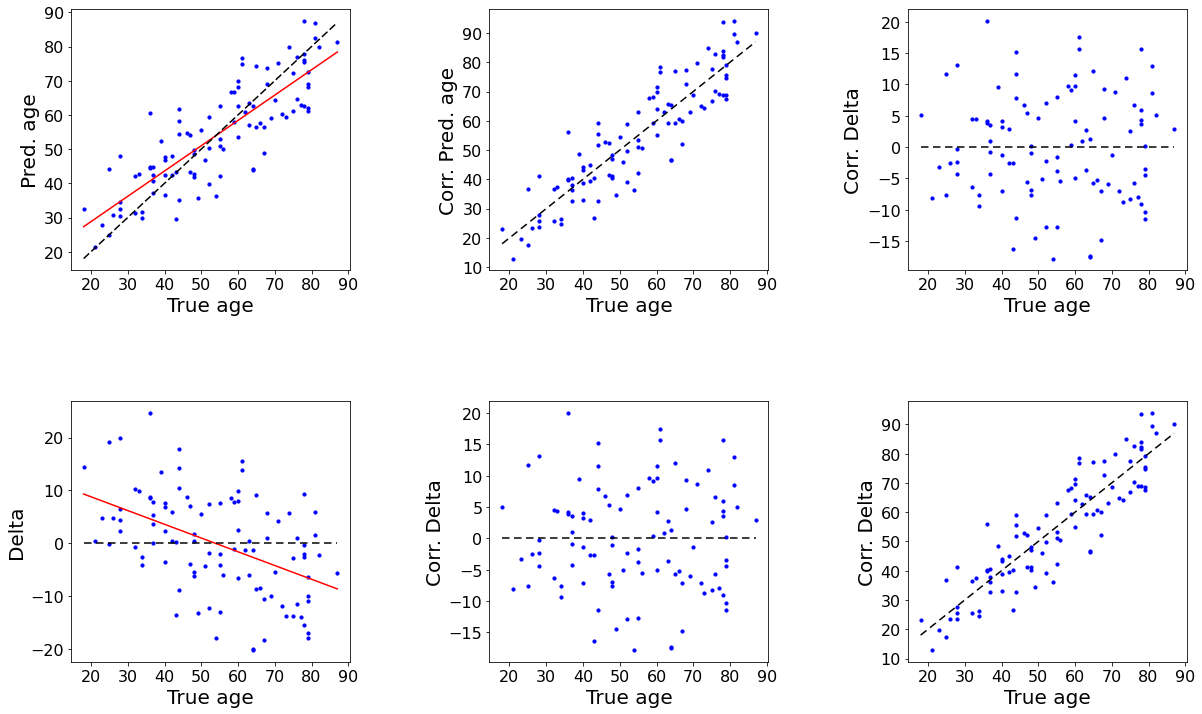

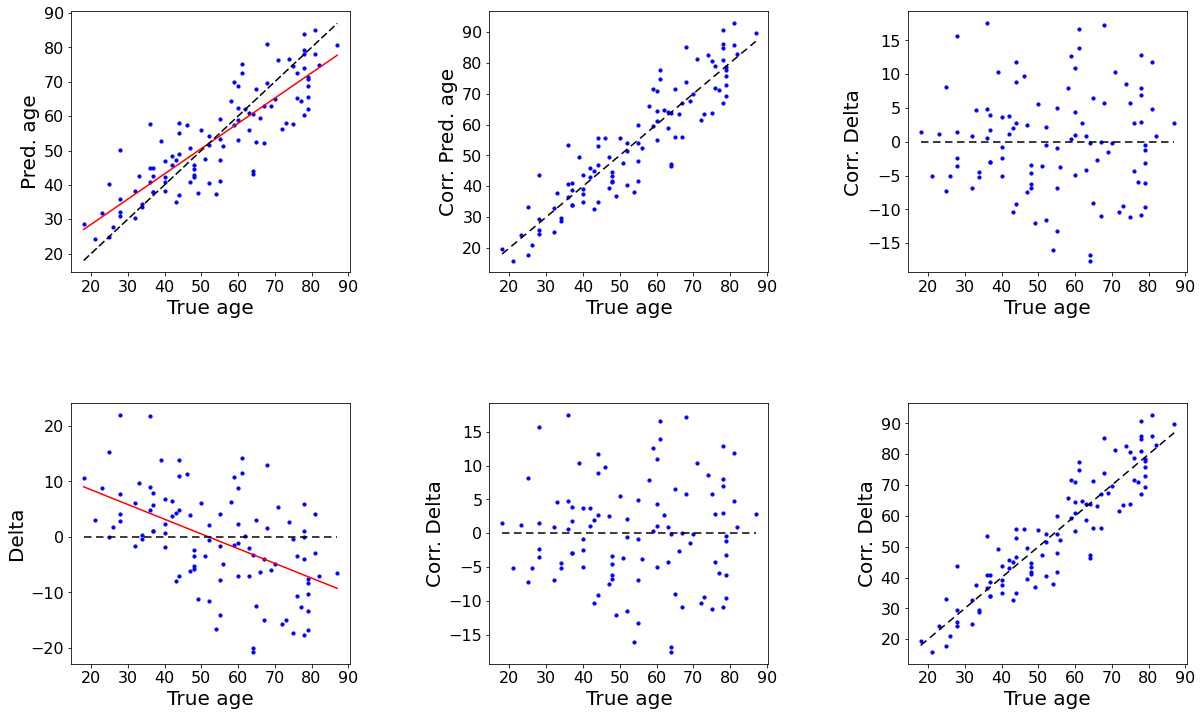

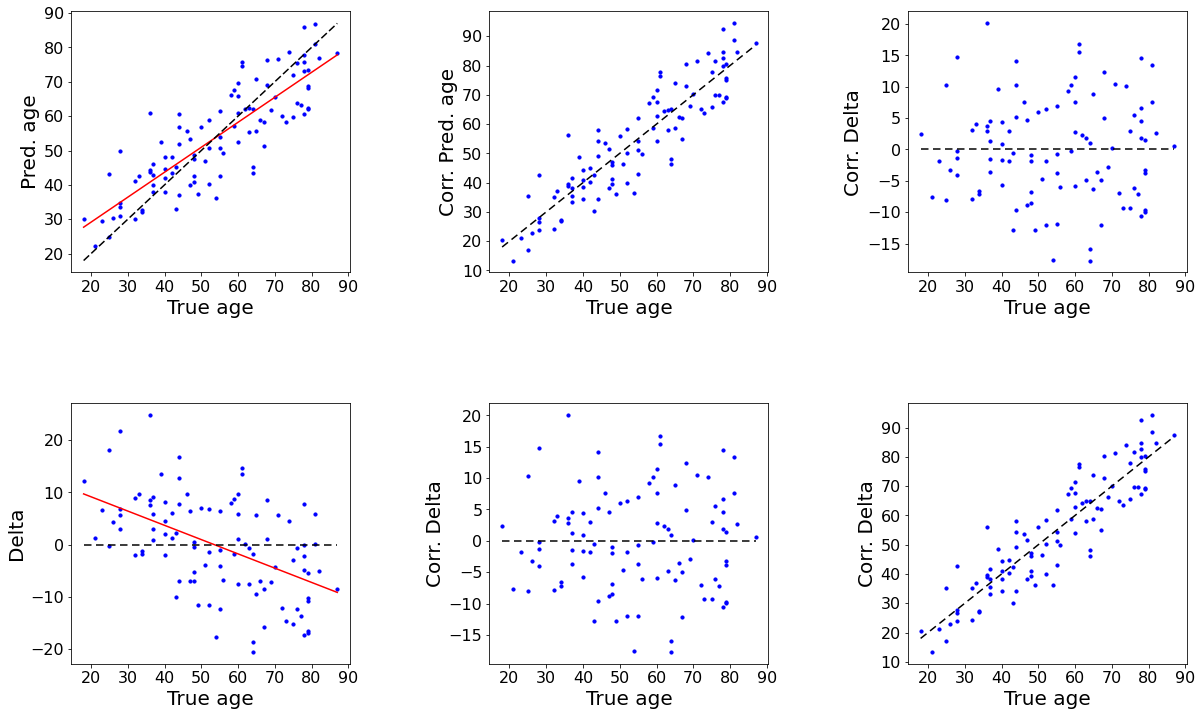

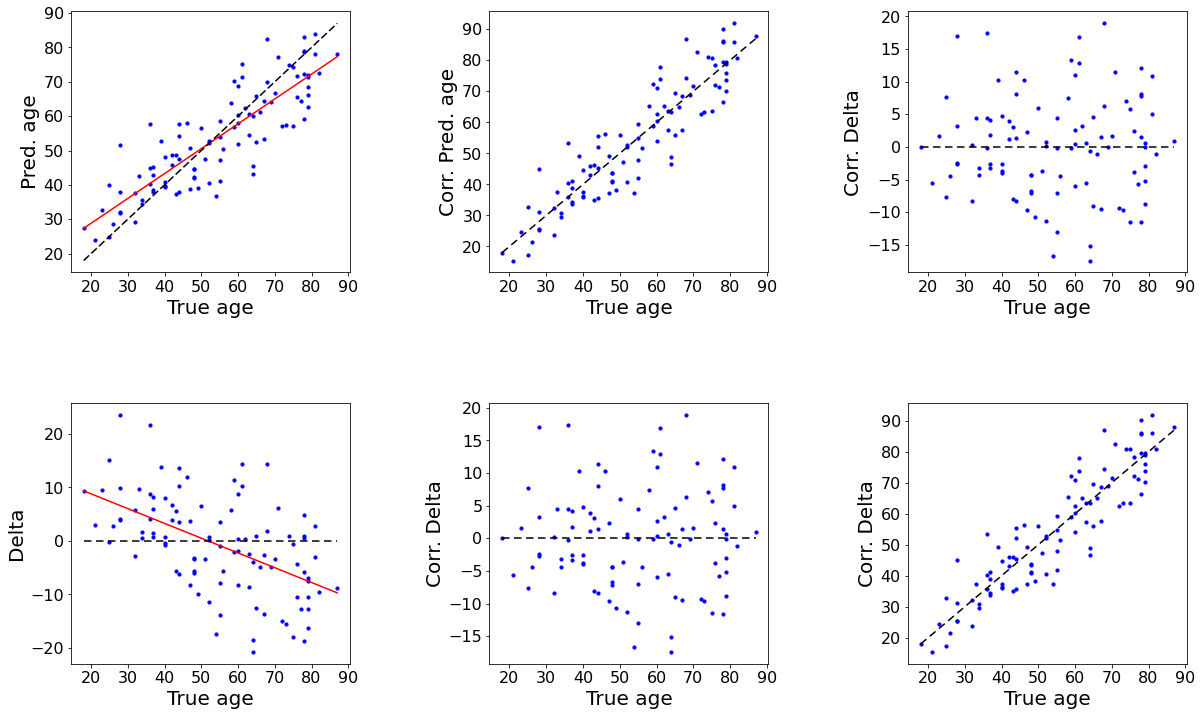

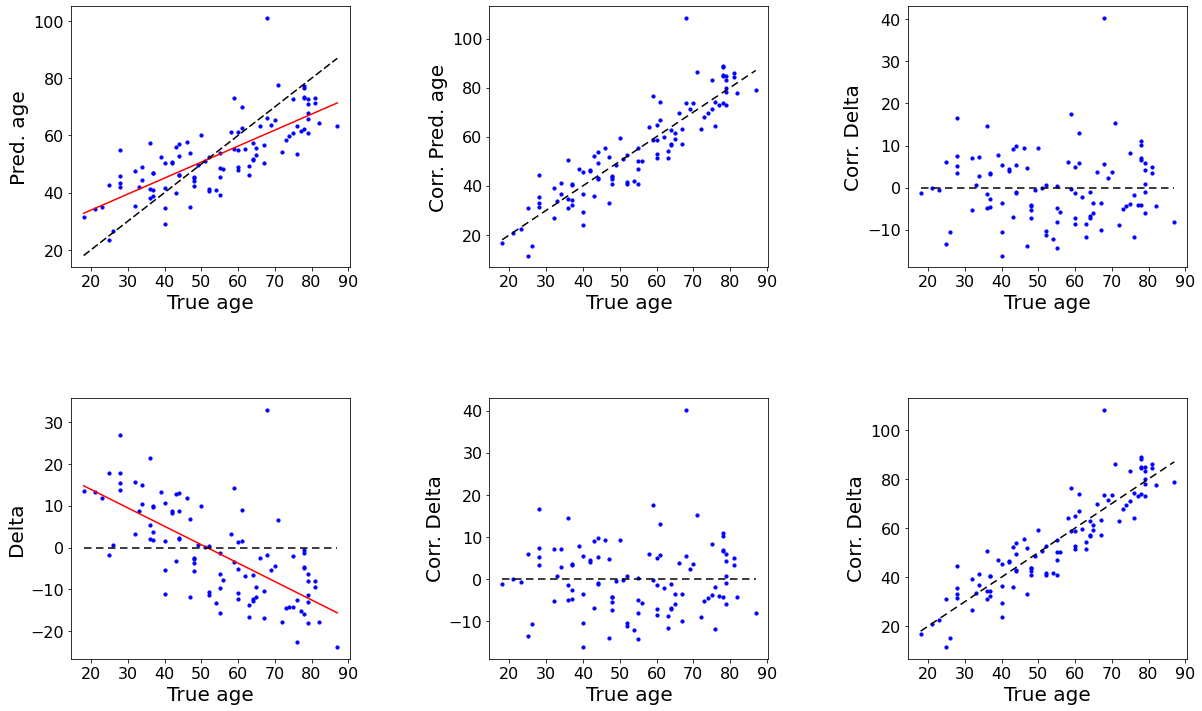

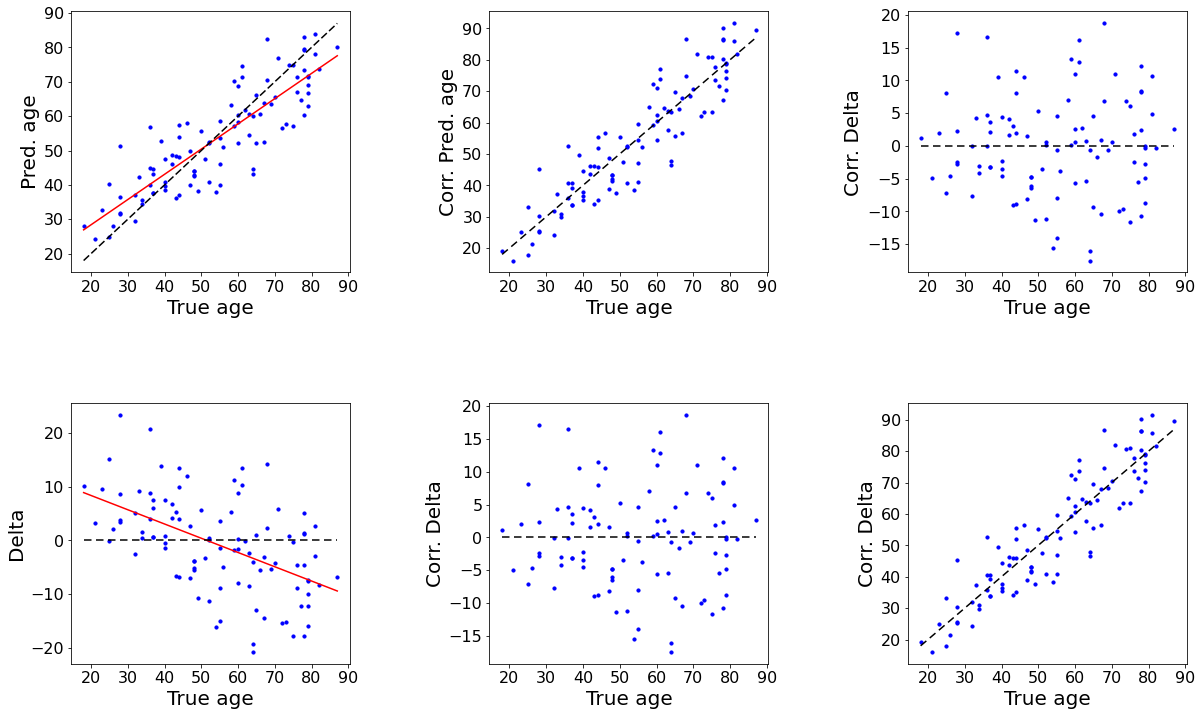

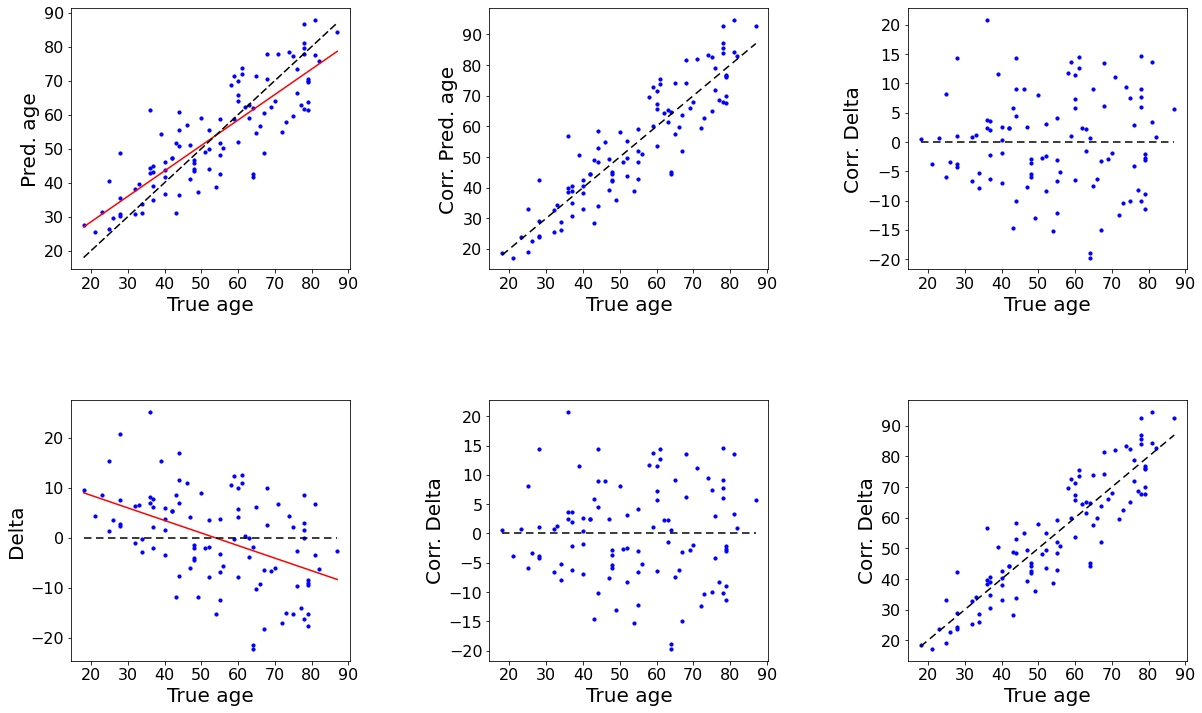

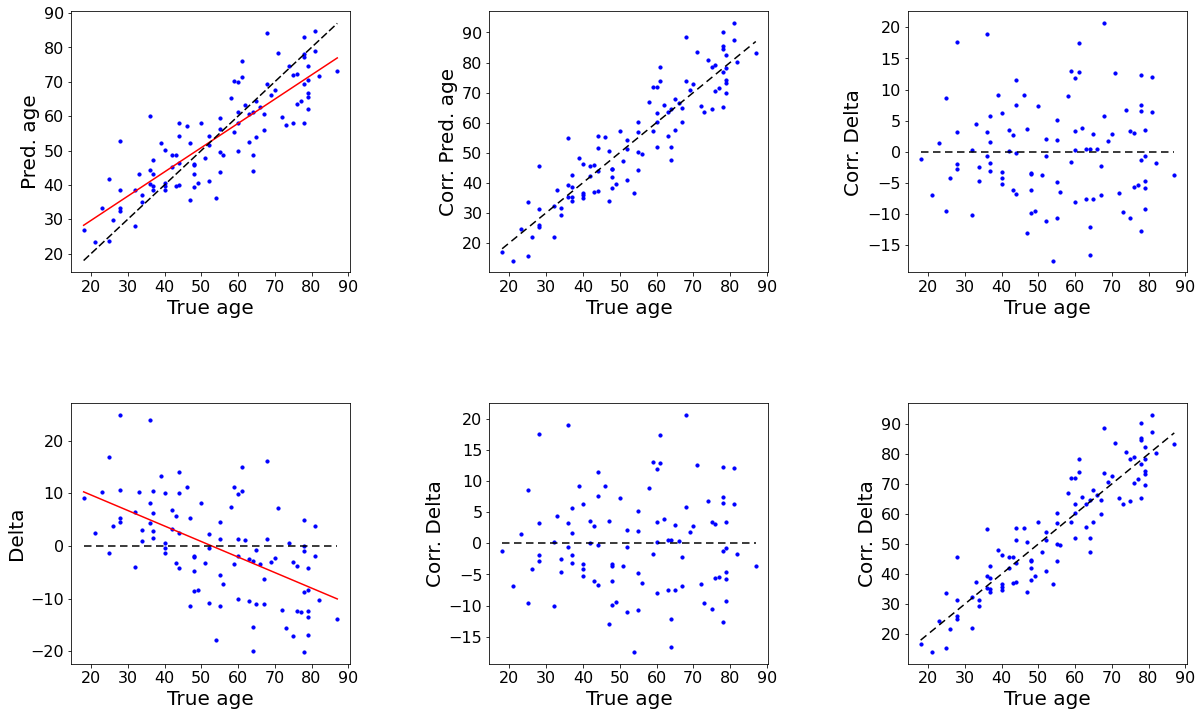

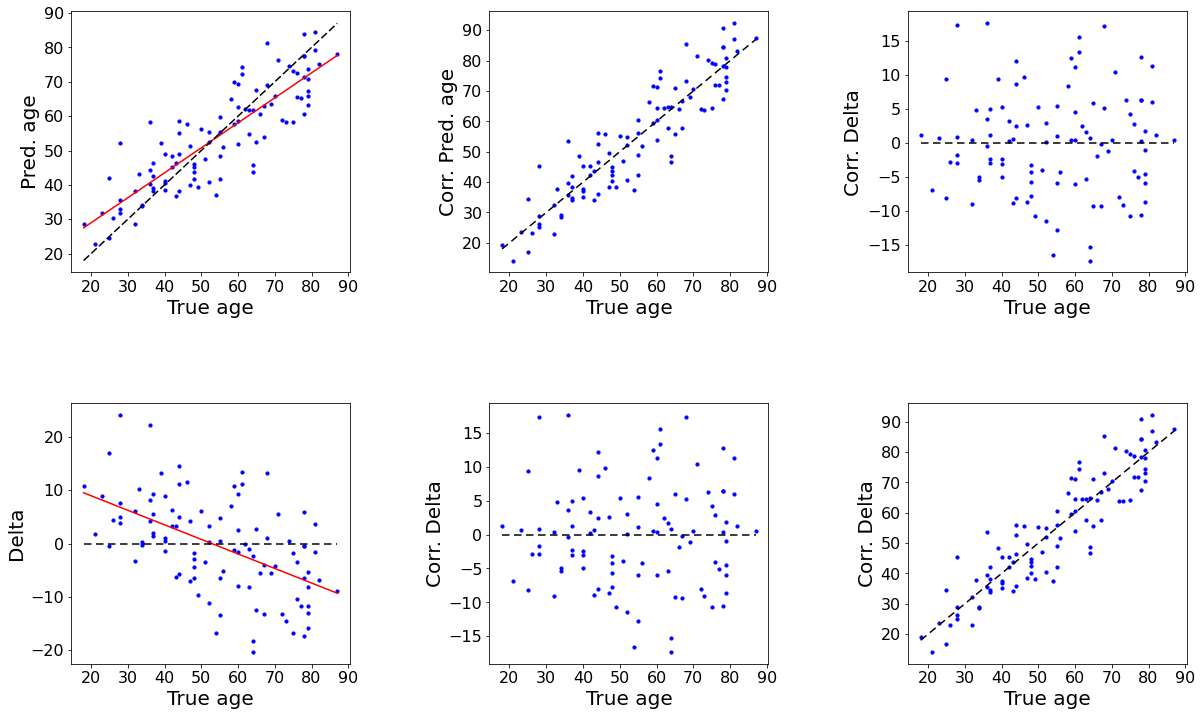

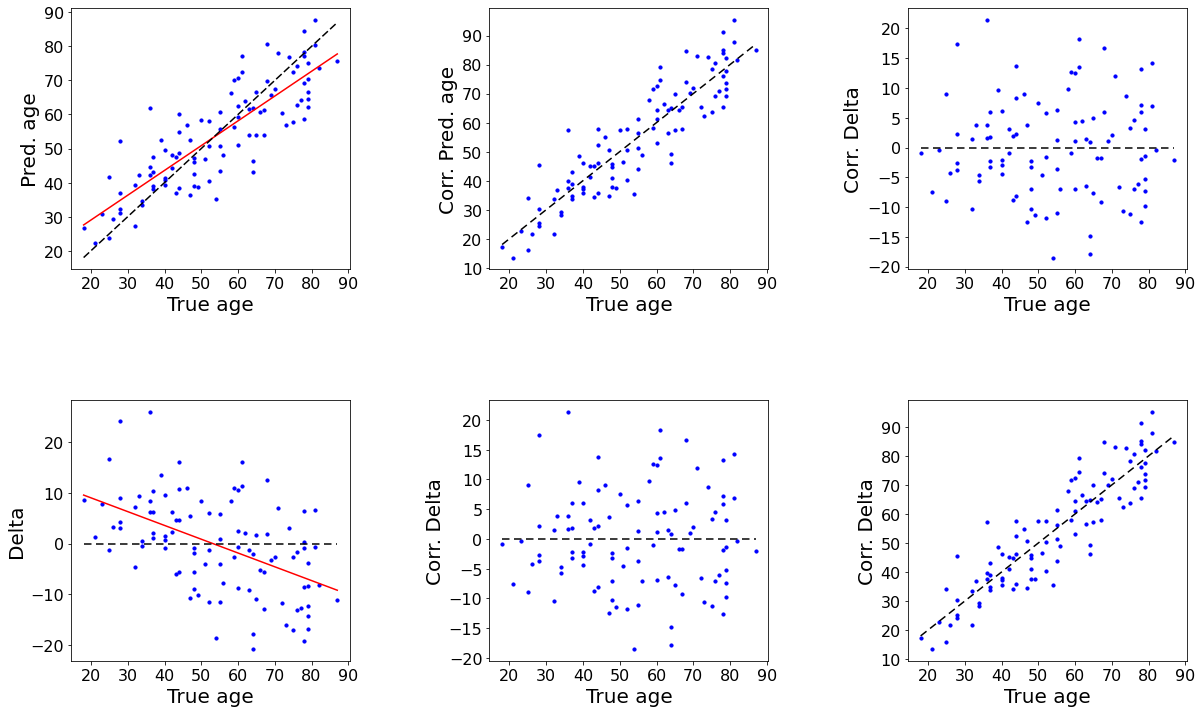

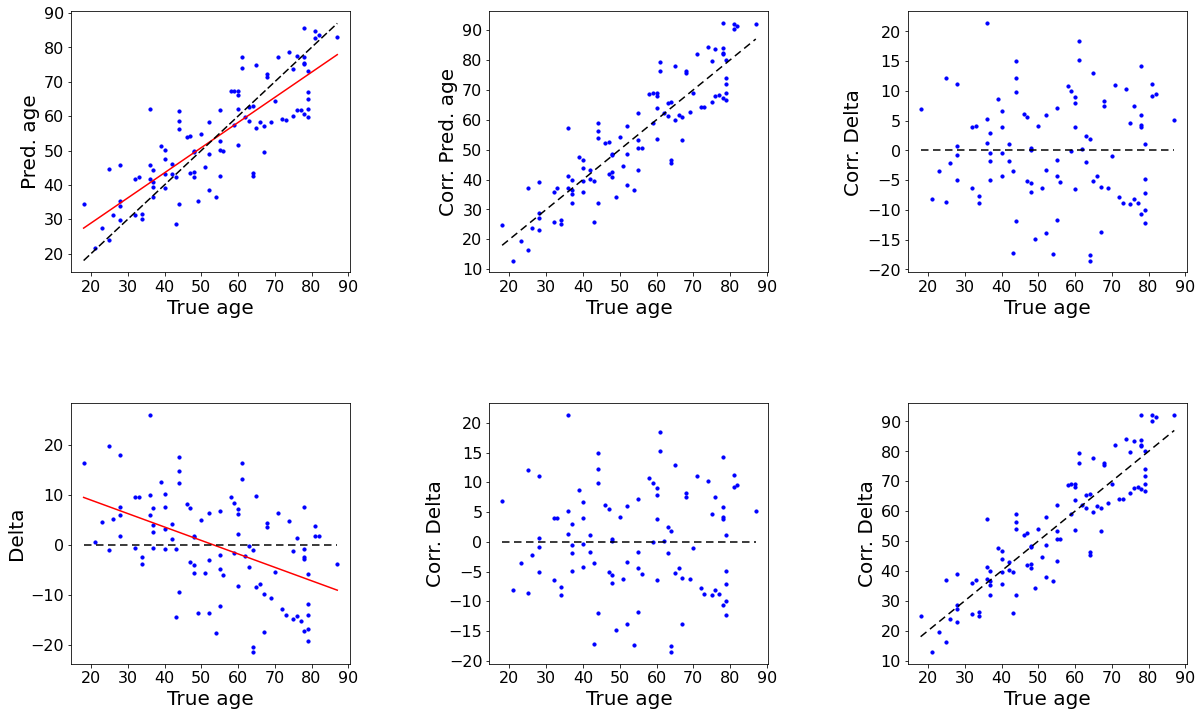

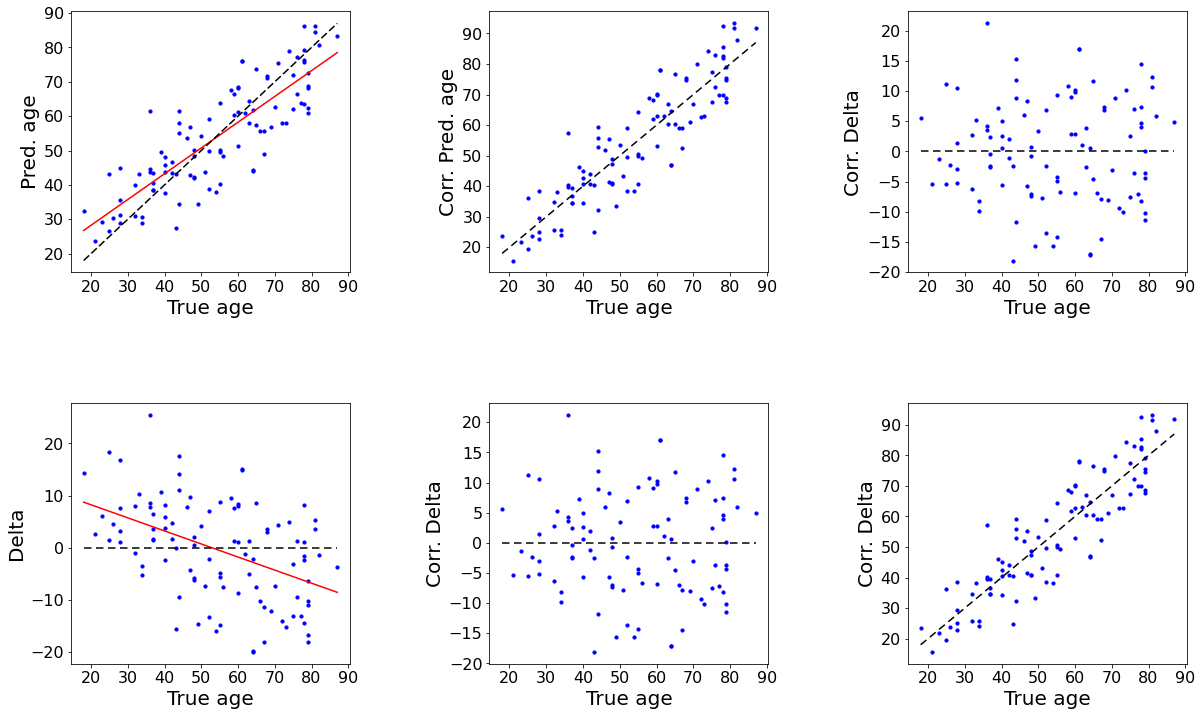

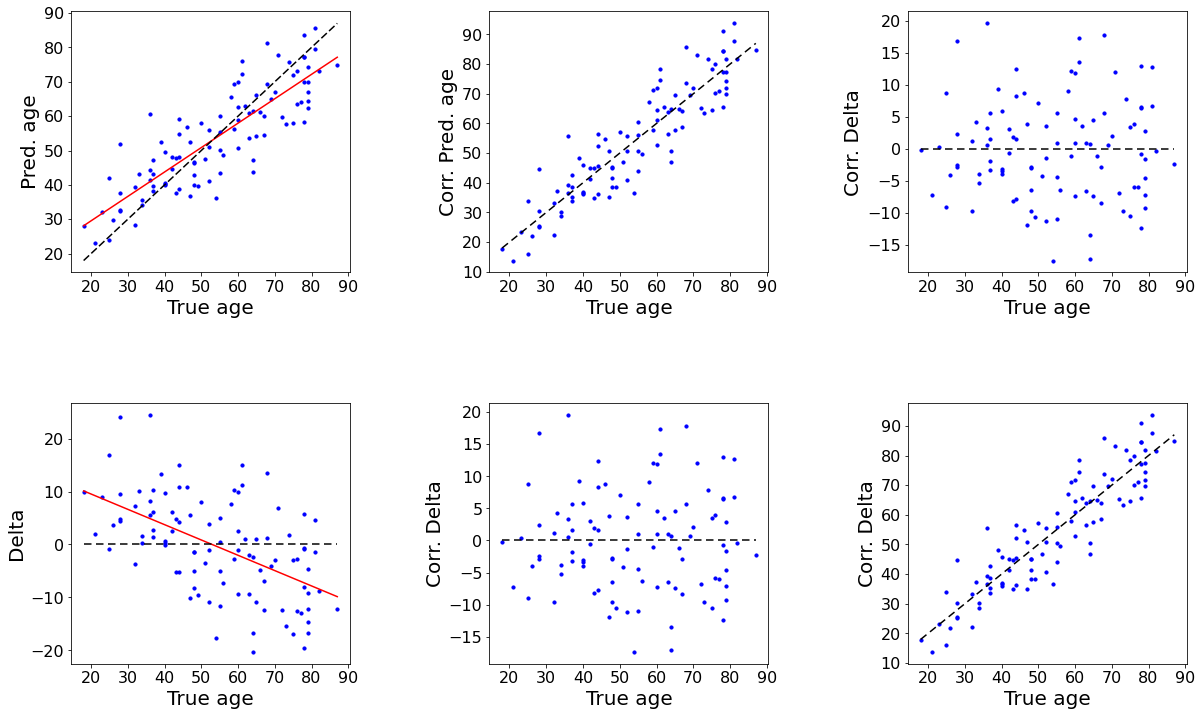

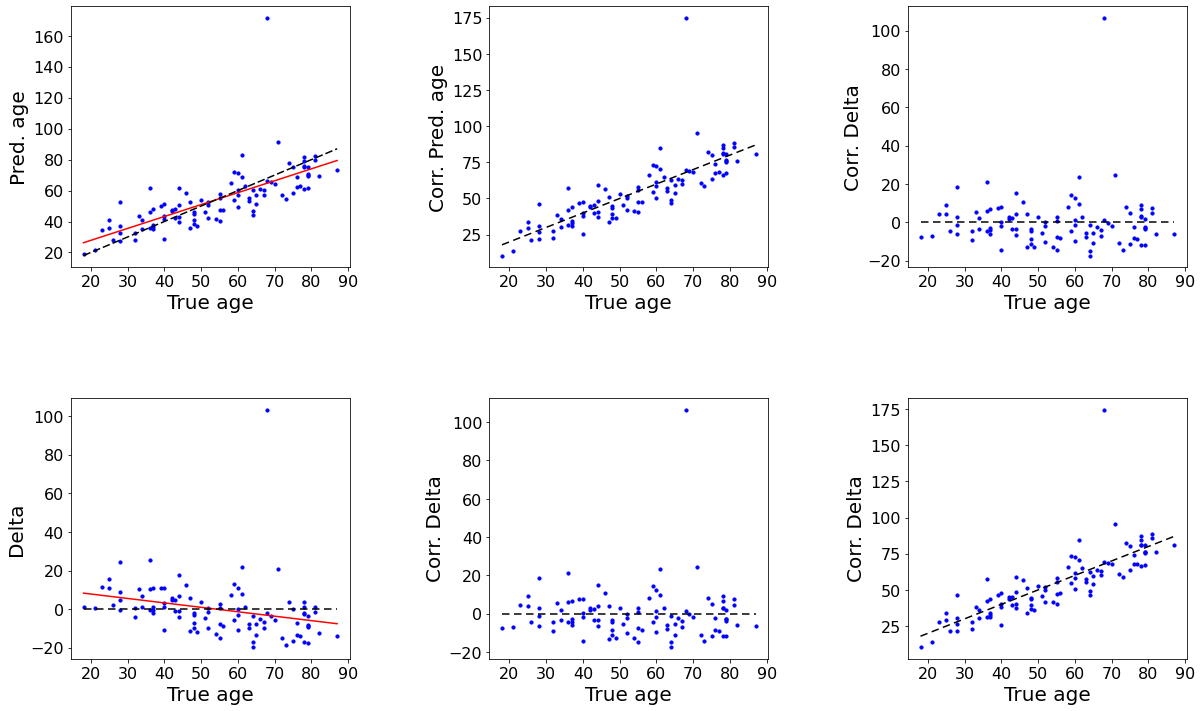

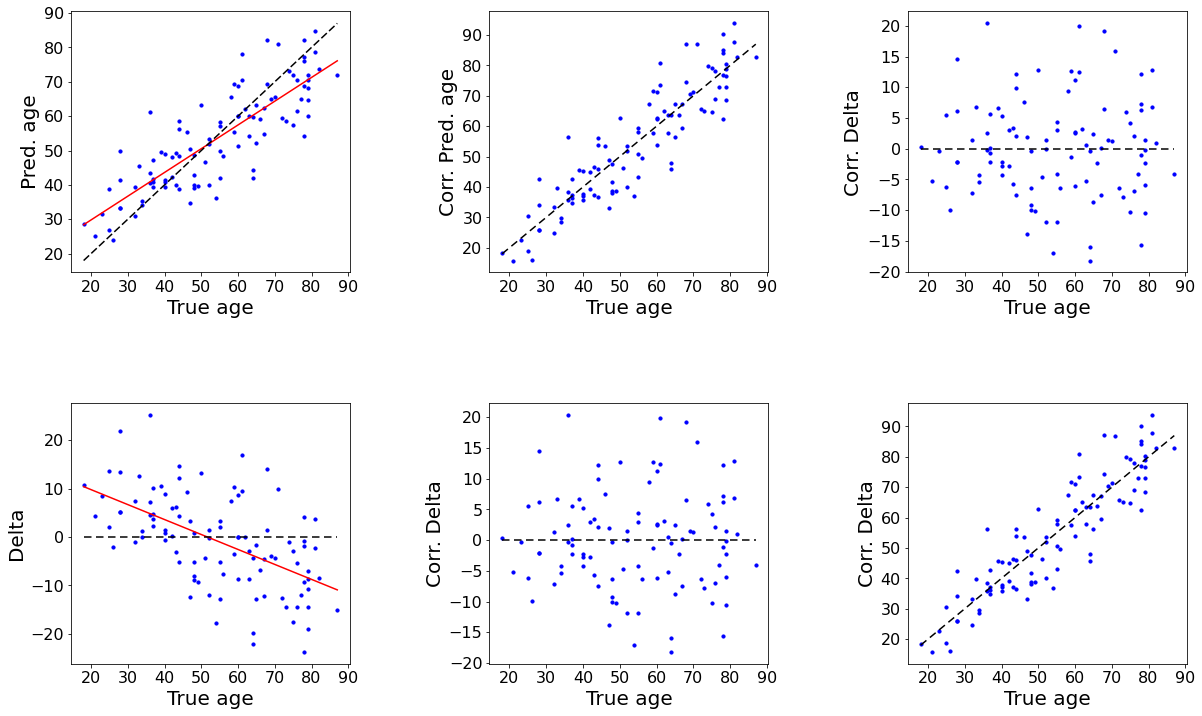

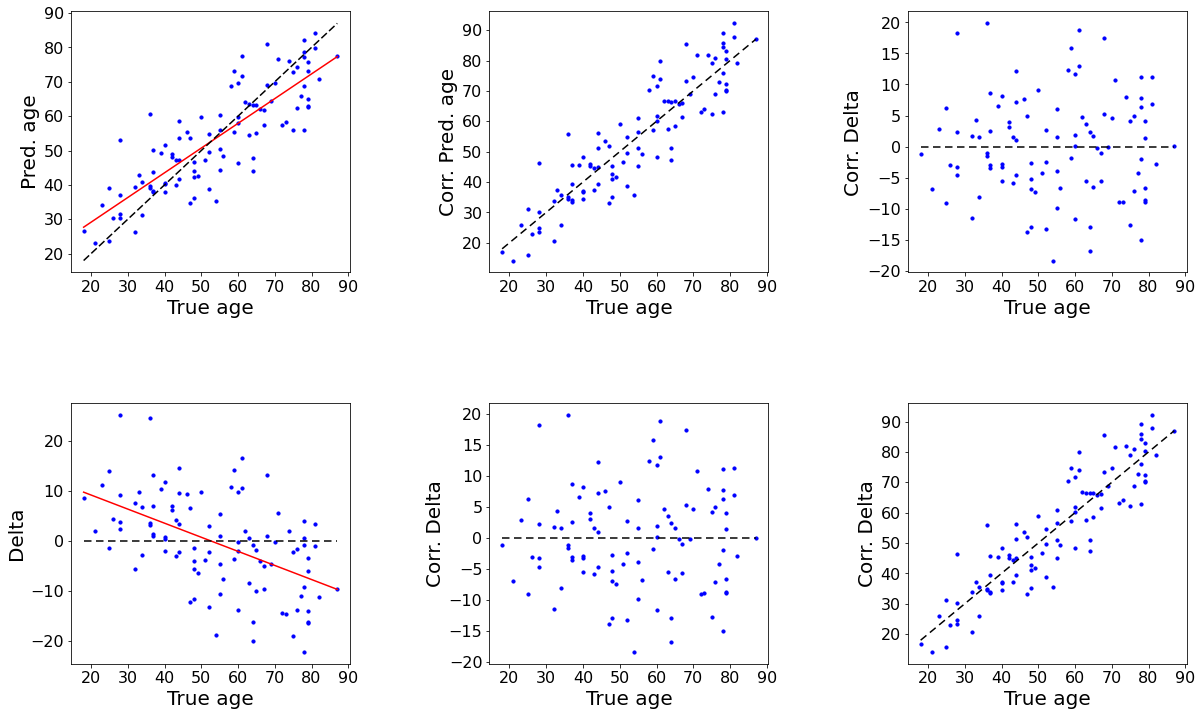

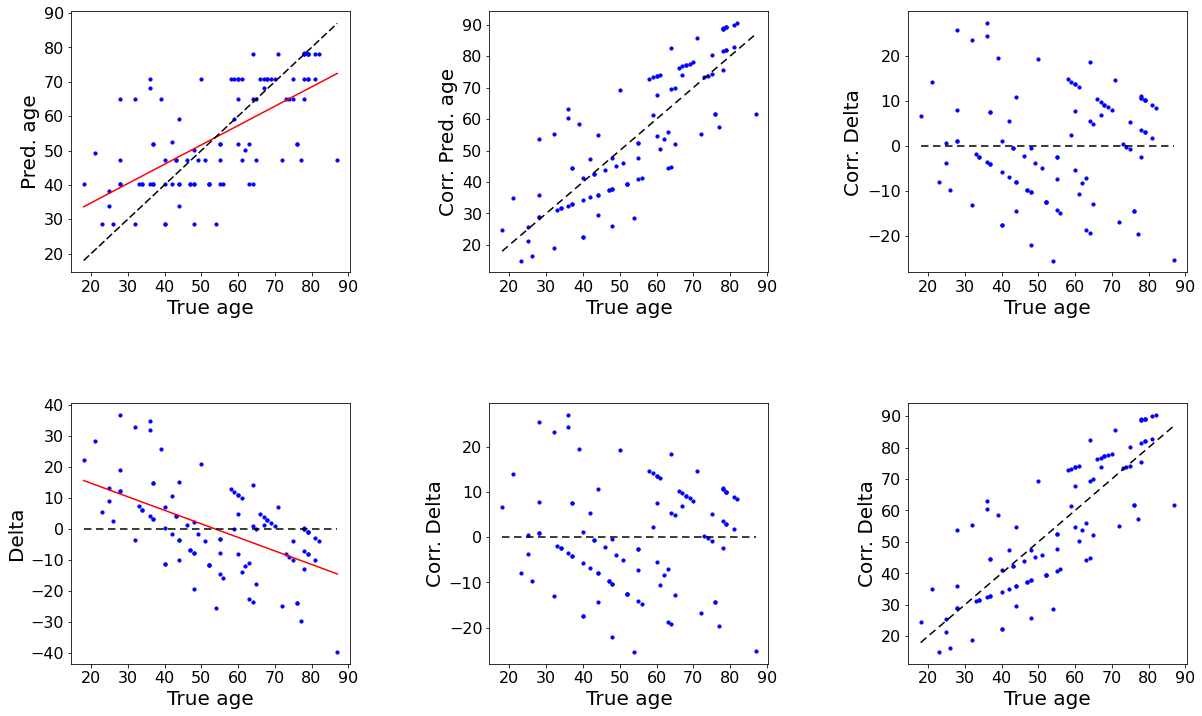

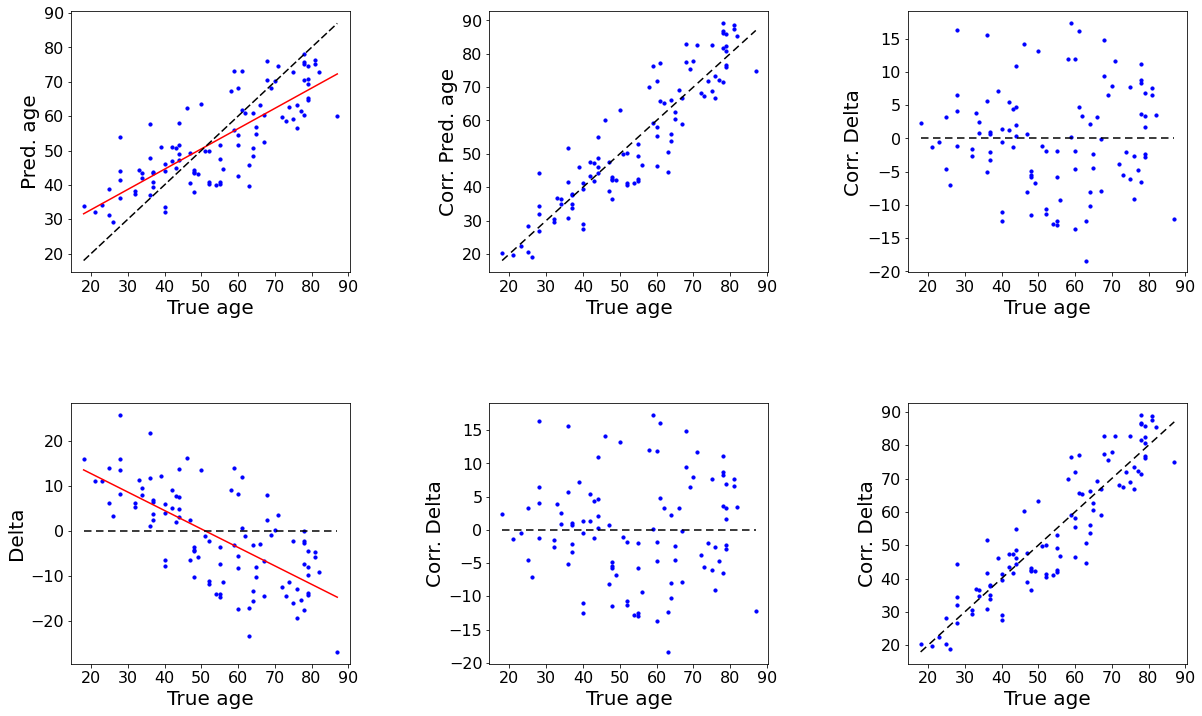

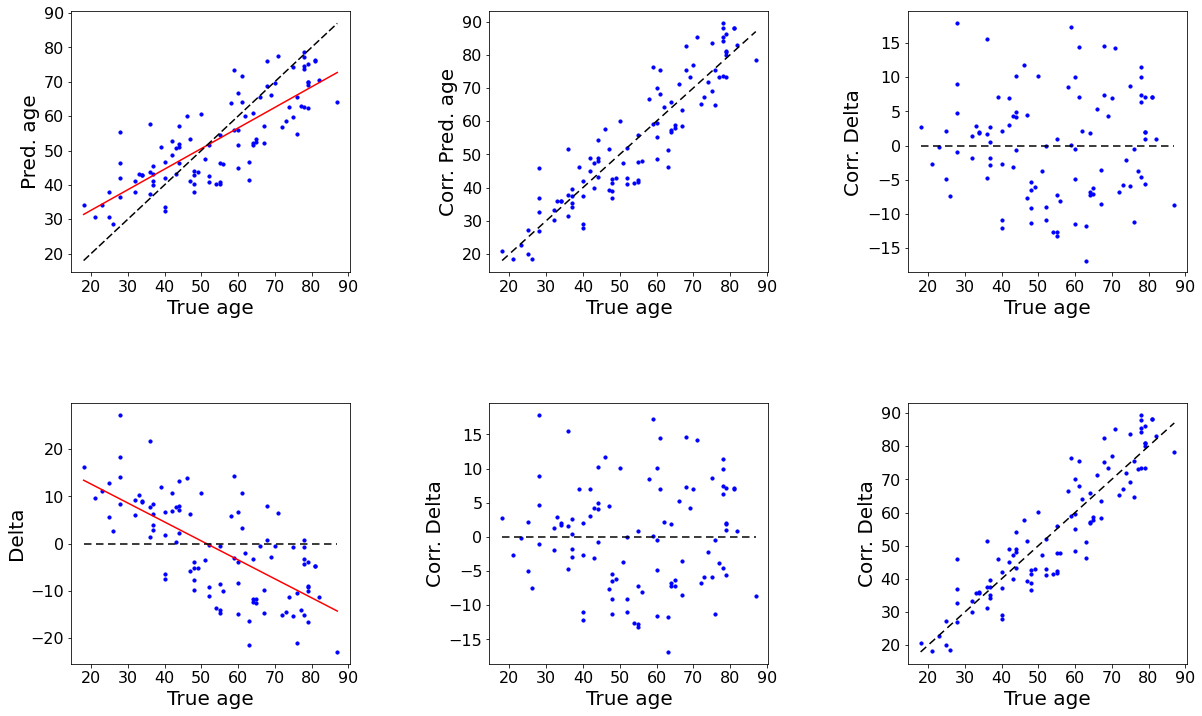

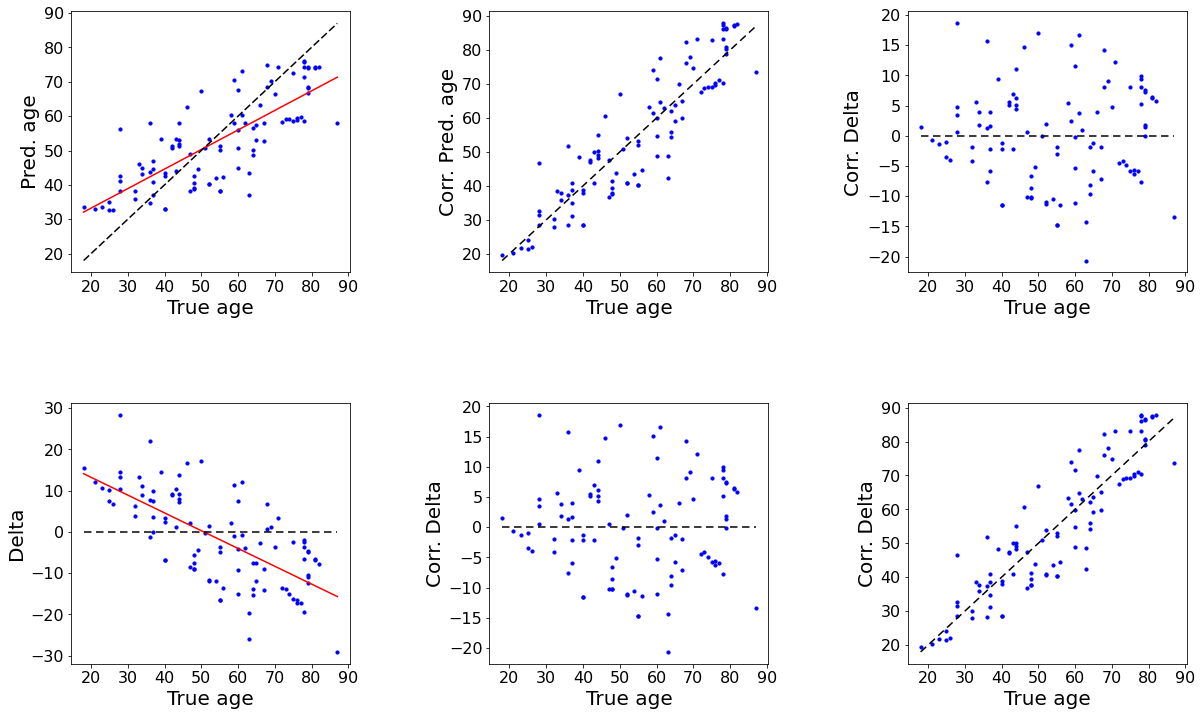

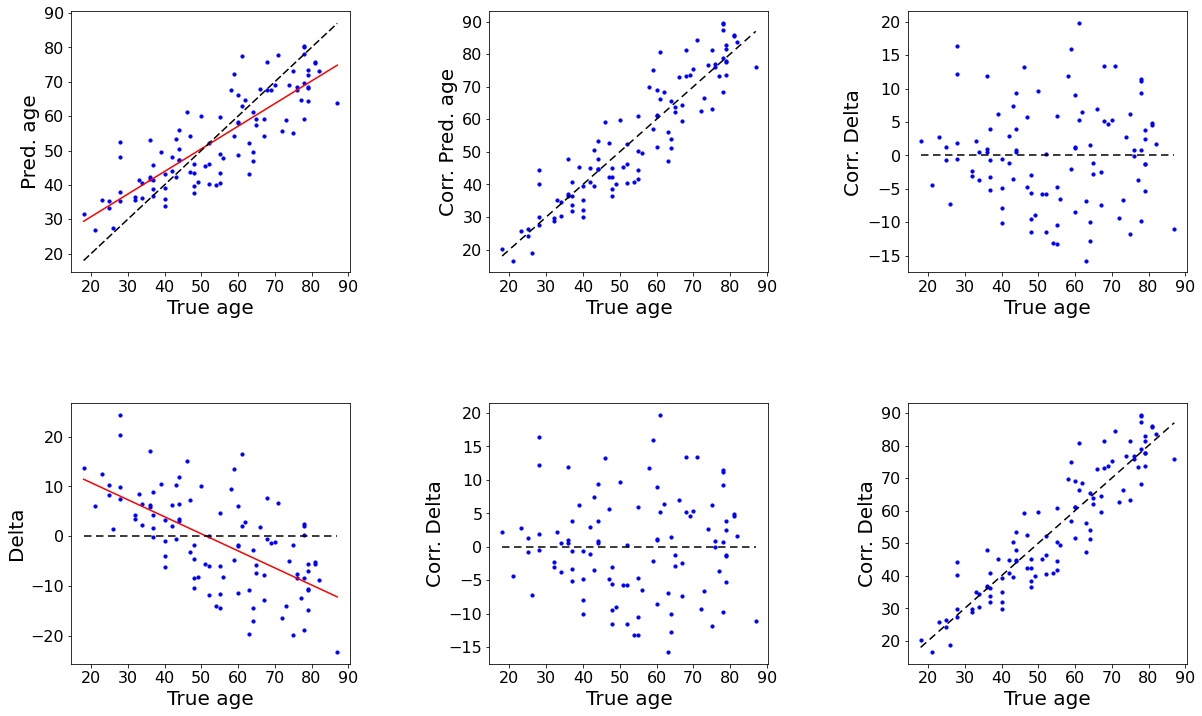

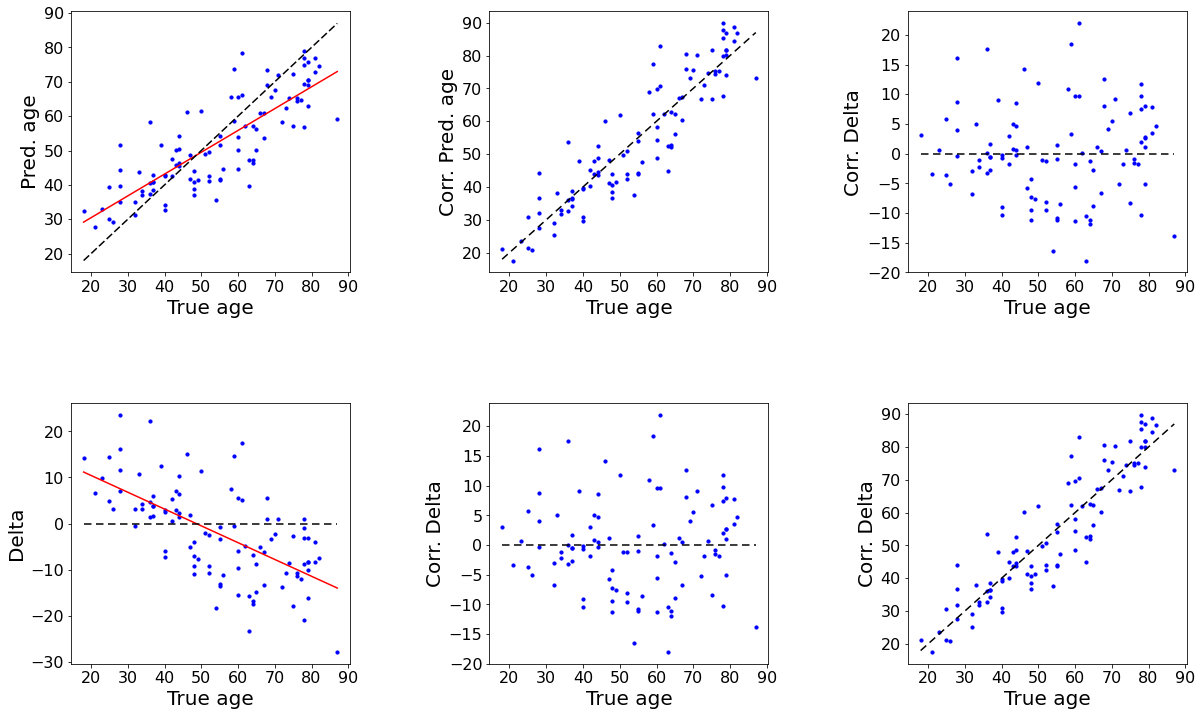

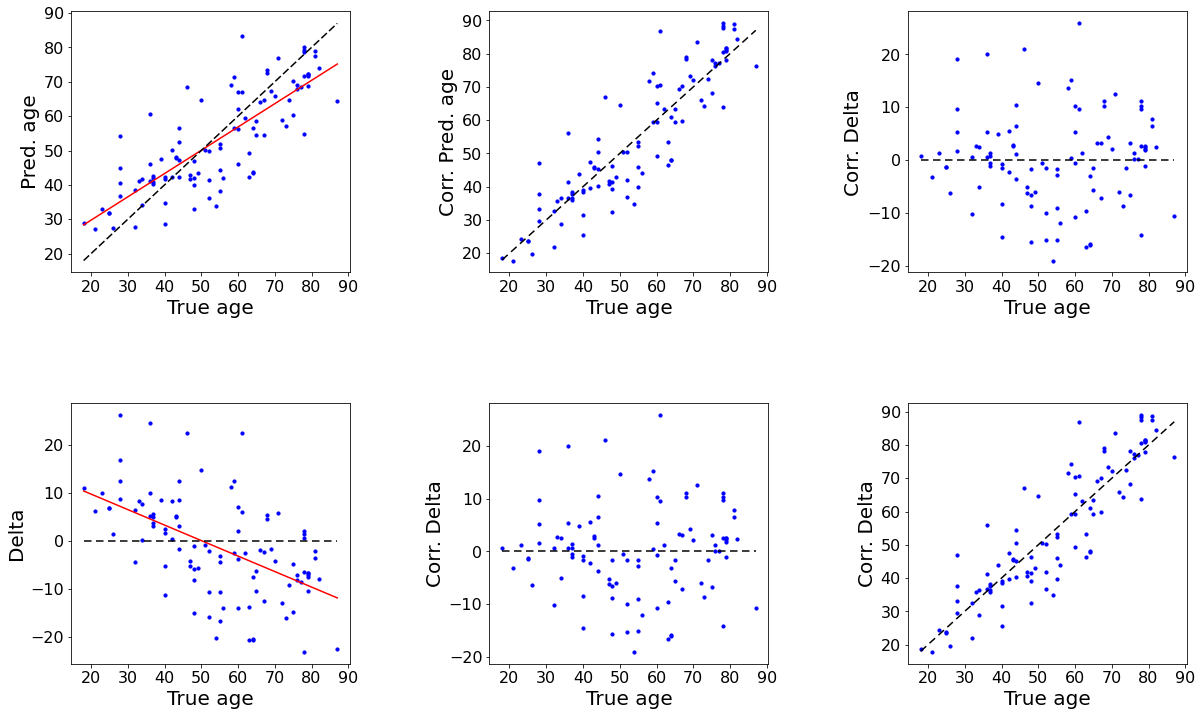

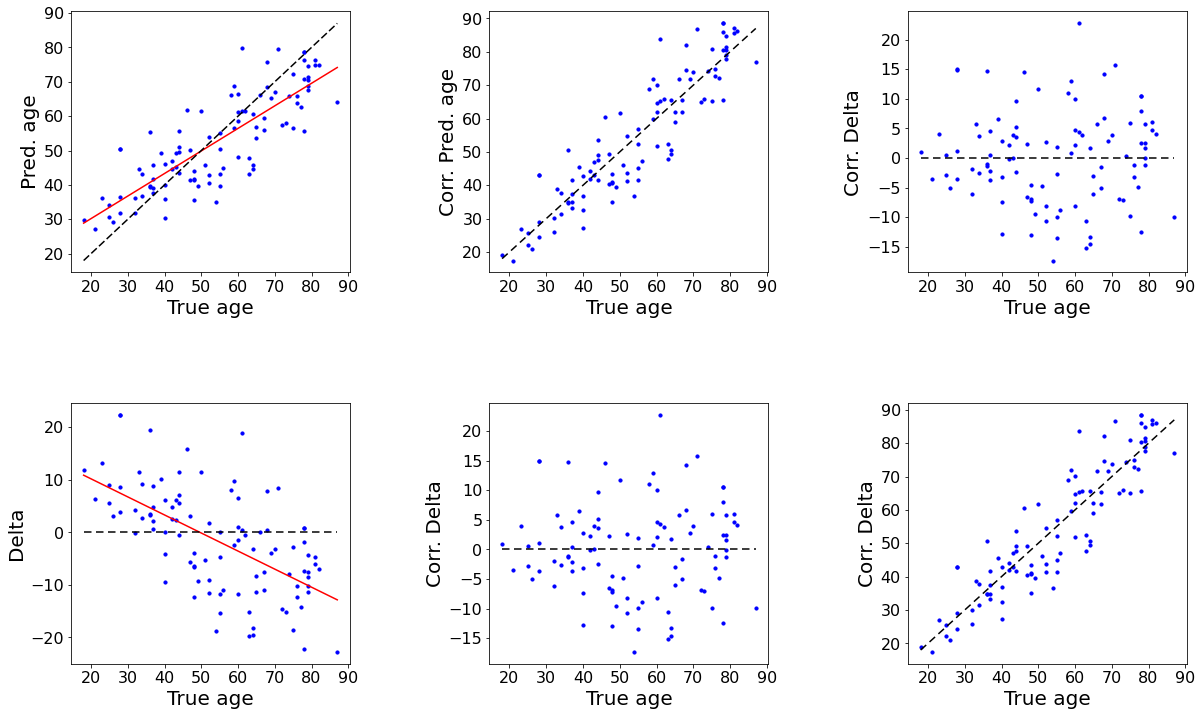

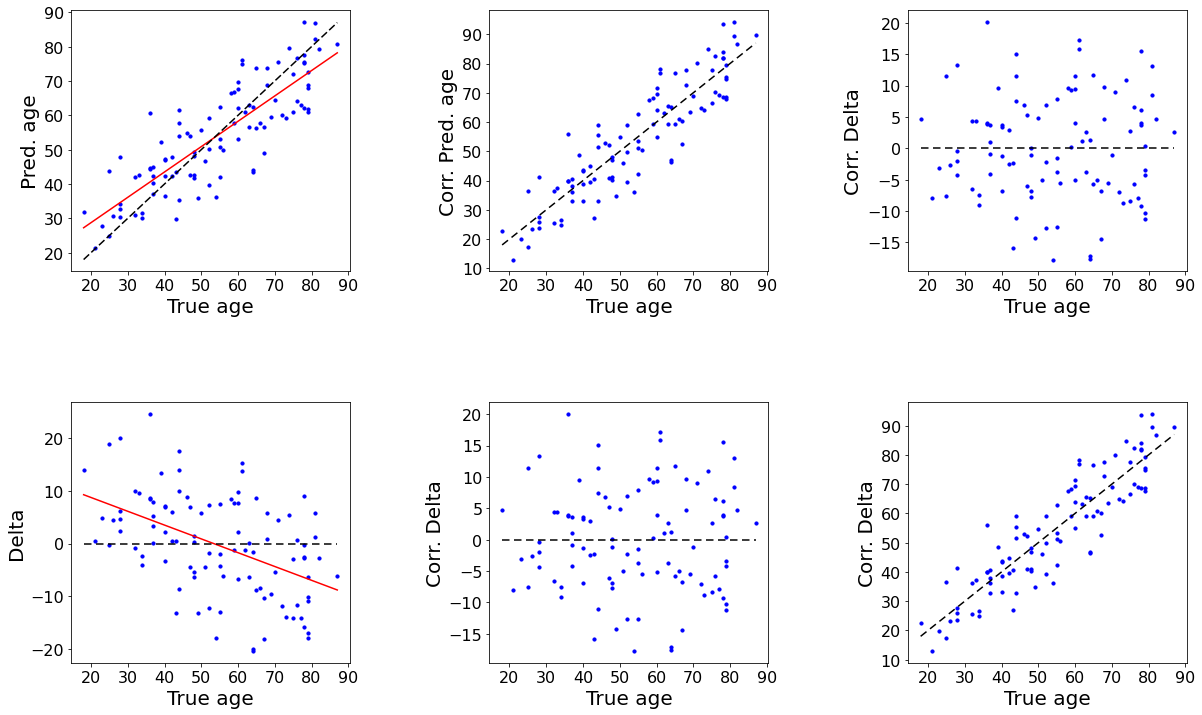

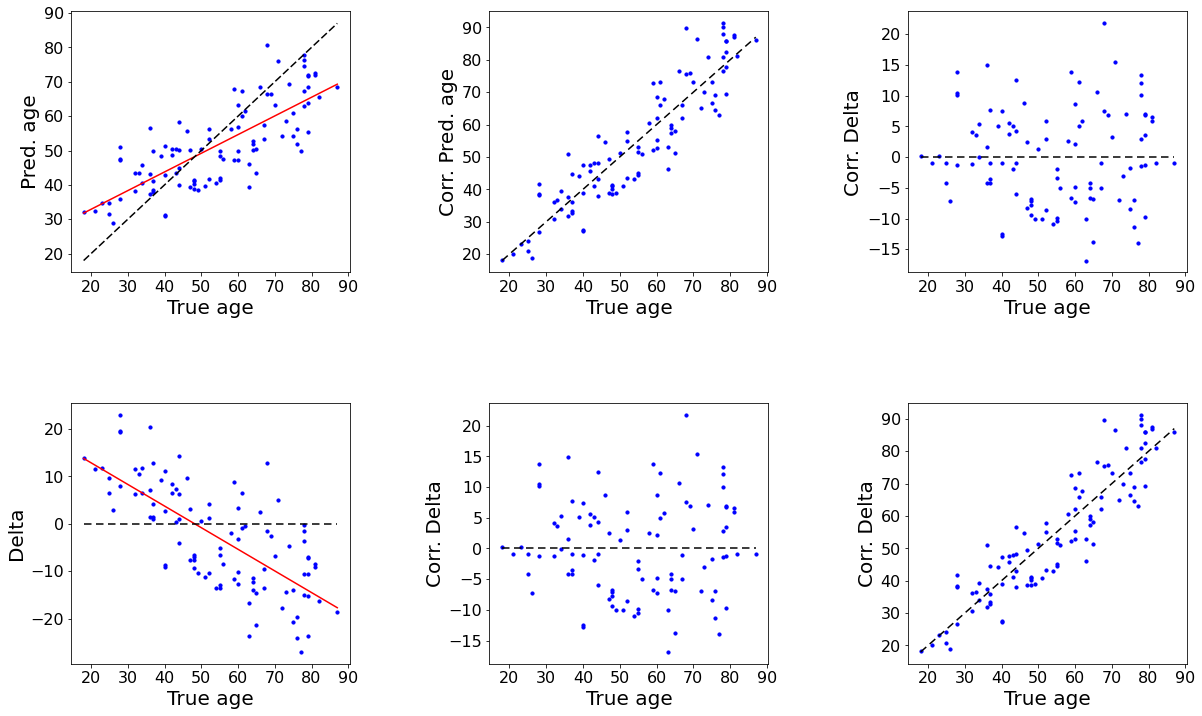

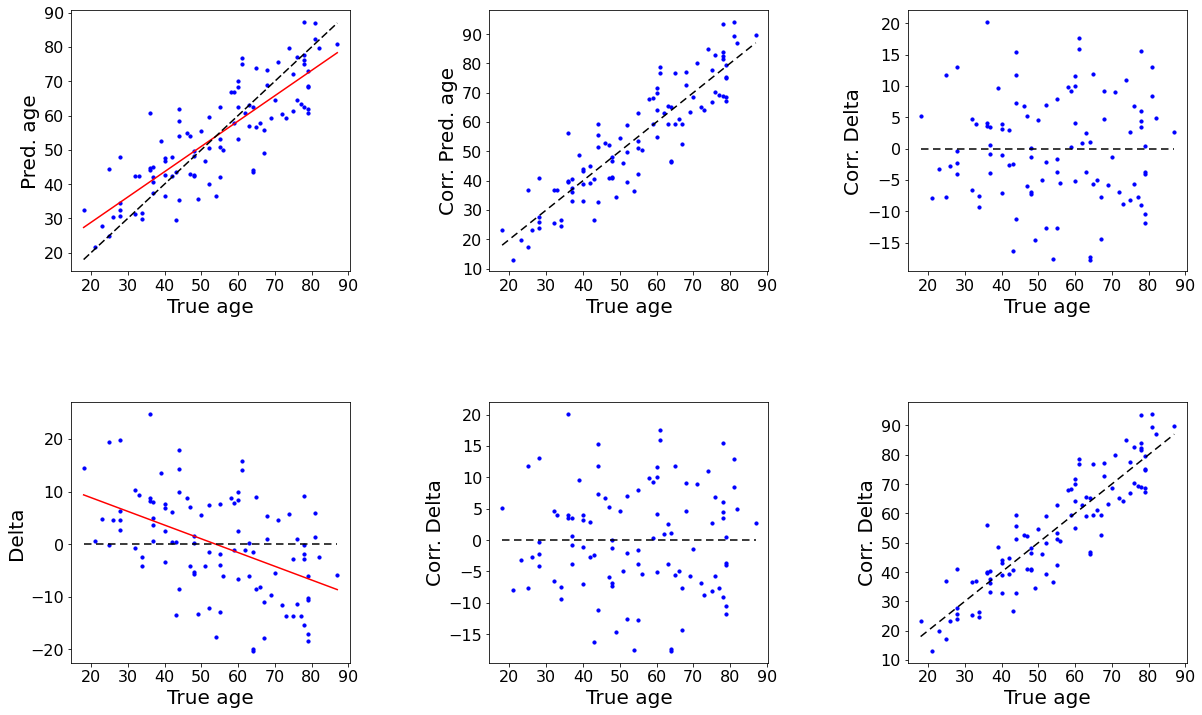

In [148]:
for i in range(cc_pred_age.shape[1]):
    cc_pred_age_plot(cc_test, cc_pred_age, cc_corr_pred_age, cc_corr_delta, cc_delta, i, save=True, file_name=f'{cc_pred_age.columns[i]}')

## Brain Age GAP Violin Plot

**IXI**

In [149]:
ixi_pred_age = pd.read_csv('./dataframe/0804/ixi/ixi_predicted_age.csv', index_col=0)
ixi_train, ixi_test  = load_dataset('ixi')
ixi_test = ixi_test.reset_index(drop=True)
ixi_chro_age = ixi_test['age']

ixi_delta = ixi_pred_age.copy()
for i in range(ixi_delta.shape[1]):
    ixi_delta.iloc[:, i] = ixi_delta.iloc[:, i] - ixi_chro_age

In [164]:
model_convert_name_dict = {}
long_model_name_list = ixi_pred_age.columns.to_list()
short_model_name_list = ['lr','lasso','ridge','en','lar','llar','omp','br','ard','par','ransac','tr','huber','kr','svr','rvr','gp','dt','rf','et','ada','gbm','xgb','lgbm','cat','knn','mlp']
for i in range(len(long_model_name_list)):
    model_convert_name_dict[long_model_name_list[i]] = short_model_name_list[i]
    
def violin_dataframe(predicted_age):
    model_list = predicted_age.columns
    violin_df = pd.DataFrame()
    
    for col in model_list:
        subset = predicted_age.loc[:, [col]]
        subset['Model'] = col 
        subset.columns = ['Predicted_age', 'Model']
        
        violin_df = pd.concat([violin_df, subset], axis=0)
    
    violin_df = violin_df.reset_index(drop=True)
    
    violin_df['Model'] = violin_df['Model'].apply(lambda x : model_convert_name_dict[x])
    
    return violin_df
    

In [192]:
ixi_violin_df = violin_dataframe(ixi_delta)

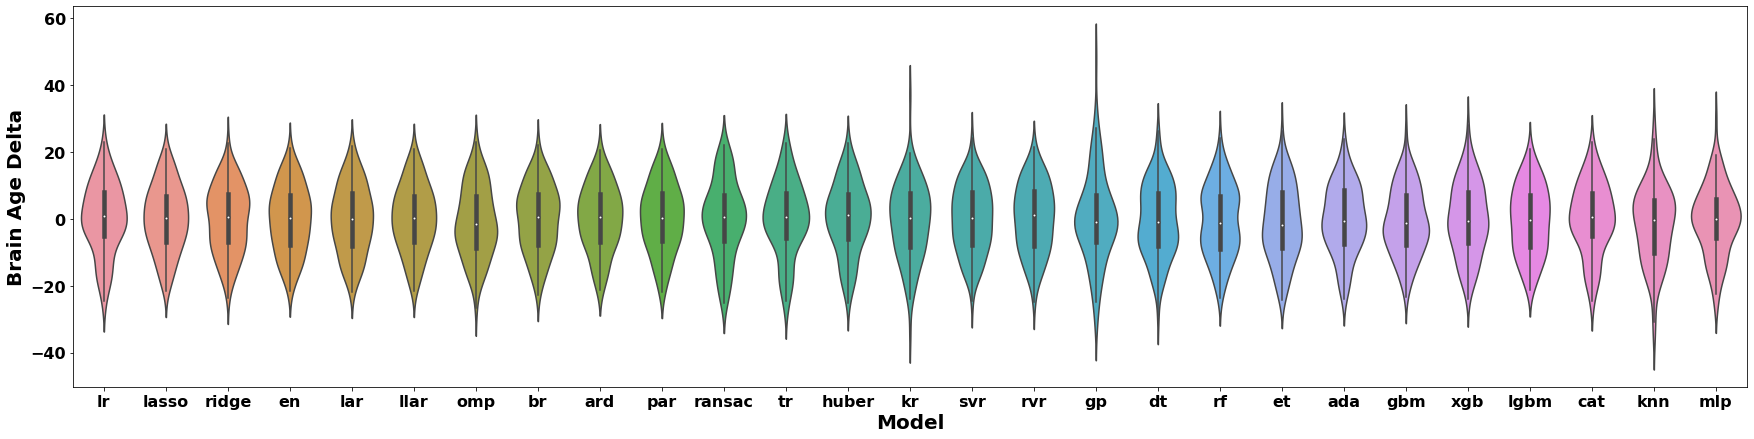

In [216]:
plt.figure(figsize=(30,7))
sns.violinplot(data=ixi_violin_df, x='Model', y='Predicted_age')
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.xlabel('Model', fontsize=20, weight='bold')
plt.ylabel('Brain Age Delta', fontsize=20, weight='bold')

plt.savefig('./visualization/0805/ixi_violinplot.png', dpi=500)
plt.show()

**HCP**

In [169]:
hcp_pred_age = pd.read_csv('./dataframe/0804/hcp/hcp_predicted_age.csv', index_col=0)
hcp_train, hcp_test  = load_dataset('hcp')
hcp_test = hcp_test.reset_index(drop=True)
hcp_chro_age = hcp_test['age']

hcp_delta = hcp_pred_age.copy()
for i in range(hcp_delta.shape[1]):
    hcp_delta.iloc[:, i] = hcp_delta.iloc[:, i] - hcp_chro_age

In [196]:
hcp_violin_df = violin_dataframe(hcp_delta)

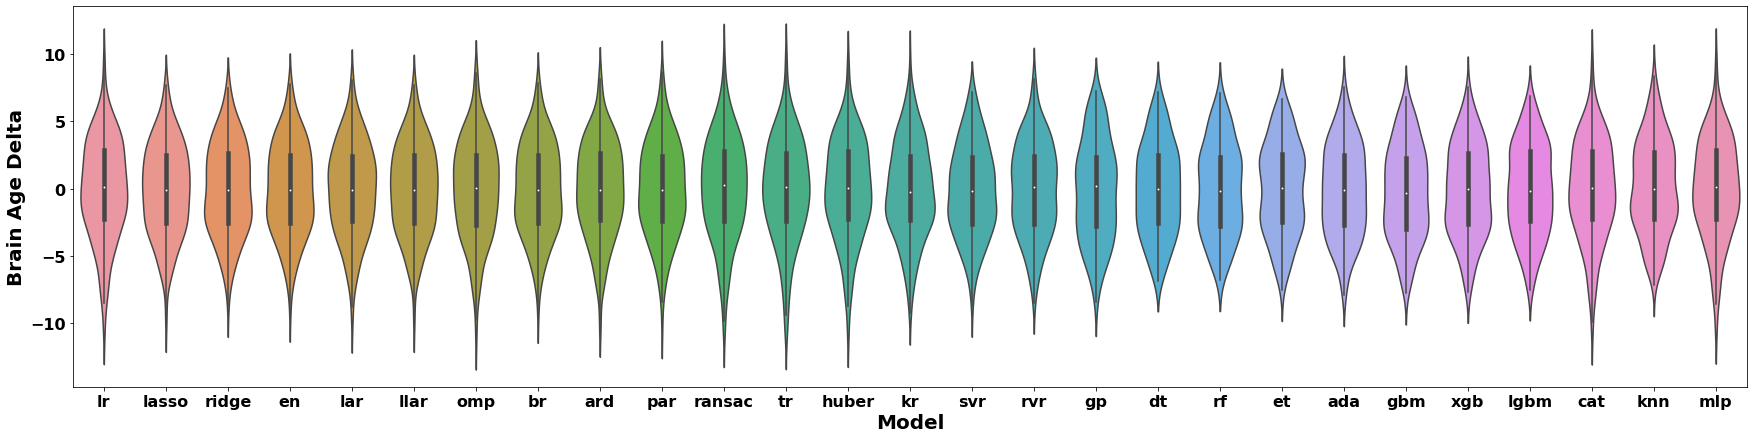

In [217]:
plt.figure(figsize=(30,7))
sns.violinplot(data=hcp_violin_df, x='Model', y='Predicted_age', width=0.8)
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.xlabel('Model', fontsize=20, weight='bold')
plt.ylabel('Brain Age Delta', fontsize=20, weight='bold')

plt.savefig('./visualization/0805/hcp_violinplot.png', dpi=500)
plt.show()

**CAMCAN**

In [213]:
cc_pred_age = pd.read_csv('./dataframe/0804/cc/cc_predicted_age.csv', index_col=0)
cc_train, cc_test  = load_dataset('cc')
cc_test = cc_test.reset_index(drop=True)

cc_pred_age_fix = cc_pred_age.copy()
cc_pred_age_fix.loc[81,'KernelRidge'] = cc_pred_age_fix['KernelRidge'].mean()

cc_chro_age = cc_test['age']

cc_delta = cc_pred_age_fix.copy()
for i in range(cc_delta.shape[1]):
    cc_delta.iloc[:, i] = cc_delta.iloc[:, i] - cc_chro_age


In [214]:
cc_violin_df = violin_dataframe(cc_delta)

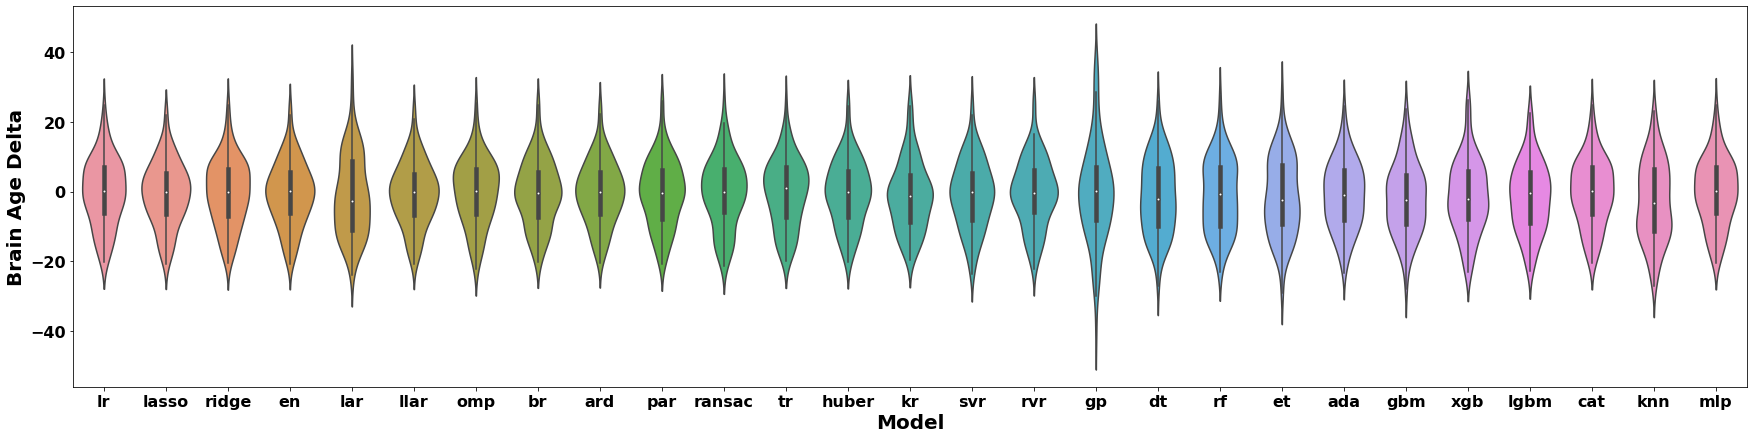

In [218]:
plt.figure(figsize=(30,7))
sns.violinplot(data=cc_violin_df, x='Model', y='Predicted_age')
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.xlabel('Model', fontsize=20, weight='bold')
plt.ylabel('Brain Age Delta', fontsize=20, weight='bold')

plt.savefig('./visualization/0805/cc_violinplot.png', dpi=500)
plt.show()

## HeatMap